In [2]:
import pandas as pd
import numpy as np
import re

# PREMIERS EXEMPLES DANS LE COURS DE DATA CLEANING

In [3]:
###Chargement des fichers
data = pd.read_csv('personnes.csv')
print(data)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samu√´l                  samuel_329@example.com            NaN   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  C√¥te d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  
5             24  3.45m  
6          B√©nin  1.45m  


De fa√ßon g√©n√©rale, on √©vitera d'utiliser la fonction  print()  sur un dataframe. Ici, n'ayant que 7 lignes, cela n'est pas du tout probl√©matique. Mais avec des fichiers de plusieurs milliers, voire millions de lignes, vous admettrez que regarder l'ensemble des lignes n'est pas tr√®s pertinent. On pr√©f√©rera dans ce cas utiliser les m√©thodes  .head()  ou  .tail()  des dataframes qui permettent de voir les 5 premi√®res ou derni√®res lignes d'un dataframe.

In [4]:
## Nombre de valeurs manquantes par variable
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


In [5]:
## Recherche de doublons dans le JDD , 'email' pour chercher en fonction des mails'
data.loc[data['email'].duplicated(keep=False),:]

prenom                   email date_naissance   pays taille
1  Samuel  samuel_329@example.com     20/09/2001    NaN  1.67m
6  samu√´l  samuel_329@example.com            NaN  B√©nin  1.45m

## Traiter les doublons

Cette ligne de code s√©lectionne toutes les lignes d'un DataFrame `data` dont la colonne 'email' contient des valeurs dupliqu√©es. Voici une explication d√©taill√©e :

1. `data['email'].duplicated(keep=False)` : Cette partie du code cr√©e une s√©rie bool√©enne de la m√™me longueur que le DataFrame `data`. Pour chaque ligne, la valeur est `True` si la valeur de la colonne 'email' est dupliqu√©e, sinon elle est `False`. L'argument `keep=False` signifie que toutes les occurrences des doublons seront marqu√©es comme `True`, pas seulement les secondes et suivantes (qui est le comportement par d√©faut de `keep='first'`).

2. `data.loc[...,:]` : La m√©thode `loc` est utilis√©e pour s√©lectionner des lignes et des colonnes par √©tiquette. Ici, `data.loc[...]` s√©lectionne toutes les lignes pour lesquelles l'expression entre crochets est `True`.

3. `, :` : Apr√®s la virgule, les deux-points indiquent que toutes les colonnes doivent √™tre incluses dans la s√©lection.

En r√©sum√©, cette ligne de code extrait toutes les lignes du DataFrame `data` o√π la colonne 'email' contient des valeurs dupliqu√©es, et renvoie toutes les colonnes pour ces lignes.

Que ce soit en Python ou en R, actualiser une colonne d'un dataframe se fait de cette mani√®re :

"data['nom_colonne'] = nouvelle_colonne" 
Ici, on cherche √† remplacer les valeurs de la colonne (ou variable)  nom_colonne. Si le dataframe a 7 lignes, alors la colonne  nom_colonne  contient 7 valeurs. Pour les remplacer,  nouvelle_colonne  doit ainsi √™tre une liste de 7 valeurs.
Il se peut qu'√† certains moments, on ne souhaite pas modifier l'enti√®ret√© de la colonne mais seulement une partie, comme l'ensemble des valeurs satisfaisant une certaine condition. Pour cela, le plus simple reste de stocker la condition dans un mask, qui pourra ensuite √™tre utilis√© :

Il se peut qu'√† certains moments, on ne souhaite pas modifier l'enti√®ret√© de la colonne mais seulement une partie, comme l'ensemble des valeurs satisfaisant une certaine condition. Pour cela, le plus simple reste de stocker la condition dans un mask, qui pourra ensuite √™tre utilis√© 

mask = # condition √† v√©rifier pour cibler sp√©cifiquement certaines lignes // 
-data.loc[mask, 'ma_colonne'] = nouvelles_valeurs

Dans l'exemple ci-dessus, on a stock√© une condition dans la variable  mask(comme par exemple :  data['email'].duplicated(keep=False)  pour reprendre l'exemple ci-dessus). ma_colonne  correspond forc√©ment √† une colonne existante, et seules les lignes satisfaisant la condition stock√©e dans mask au sein de cette colonne verront leurs valeurs modifi√©es. Naturellement et comme pr√©c√©demment, si votre condition ne concerne que 4 valeurs, il faudra √©galement que  nouvelles_valeurs  soit une liste de 4 valeurs.

## Traitez les pays
Pour les pays, nous avions un probl√®me majeur qui √©tait la valeur 24
 , √† la 5e ligne. La premi√®re approche pourrait √™tre de consid√©rer que l'ensemble de mes pays doivent √™tre des cha√Ænes de caract√®res, et donc que toutes les valeurs num√©riques doivent √™tre remplac√©es par des valeurs manquantes. Mais pour faire la chose encore plus "proprement", on pourrait d√©finir une liste de pays valides, et remplacer toutes les valeurs qui ne concordent pas avec la liste par des valeurs manquantes :

In [6]:
VALID_COUNTRIES = ['France', 'C√¥te d\'ivoire', 'Madagascar', 'B√©nin', 'Allemagne' , 'USA']
mask = ~data['pays'].isin(VALID_COUNTRIES)
data.loc[mask, 'pays'] = np.nan

Ici, ma condition utilisant  .isin()  renvoie True si la valeur est dans la liste pass√©e en param√®tre (donc ici  VALID_COUNTRIES  ), False sinon : ainsi, le  .loc()  permet de ne s√©lectionner que les lignes dont le pays est dans la liste d√©finie.
Oui mais attends... ce n'√©tait pas l'inverse que nous voulions faire ? >_<
Tout √† fait ! Et tout se joue dans le petit symbole  ~  plac√© en amont de la condition. Ce dernier permet de prendre l'exact inverse de la condition, donc ici, l'ensemble des lignes dont le pays n'est pas dans la liste d√©finie. On remplace ensuite l'ensemble des valeurs de pays de ces lignes par np.nan  , qui est la valeur utilis√©e par les librairies  Numpy  et  Pandas  pour sp√©cifier qu'une valeur est inconnue. C'est en quelque sorte un √©quivalent de  None  .

Ce code effectue une v√©rification et un nettoyage des donn√©es dans une colonne `pays` d'un DataFrame `data` en suivant ces √©tapes :

1. **D√©finition de la liste des pays valides** :
    ```python
    VALID_COUNTRIES = ['France', 'C√¥te d\'ivoire', 'Madagascar', 'B√©nin', 'Allemagne' , 'USA']
    ```
    Cette ligne cr√©e une liste appel√©e `VALID_COUNTRIES` contenant les noms de pays consid√©r√©s comme valides.

2. **Cr√©ation d'un masque pour les pays non valides** :
    ```python
    mask = ~data['pays'].isin(VALID_COUNTRIES)
    ```
    - `data['pays'].isin(VALID_COUNTRIES)` v√©rifie si chaque √©l√©ment de la colonne `pays` se trouve dans la liste `VALID_COUNTRIES`. Le r√©sultat est une s√©rie bool√©enne o√π chaque √©l√©ment est `True` si le pays est dans la liste et `False` sinon.
    - `~` est l'op√©rateur de n√©gation logique qui inverse les valeurs de la s√©rie bool√©enne, transformant `True` en `False` et vice versa. Donc, `mask` est une s√©rie bool√©enne o√π chaque √©l√©ment est `True` si le pays n'est pas dans la liste `VALID_COUNTRIES` et `False` si le pays est dans la liste.

3. **Remplacement des pays non valides par NaN** :
    ```python
    data.loc[mask, 'pays'] = np.nan
    ```
    - `data.loc[mask, 'pays']` s√©lectionne toutes les lignes du DataFrame `data` o√π le masque `mask` est `True` (c'est-√†-dire, les lignes o√π le pays n'est pas dans la liste `VALID_COUNTRIES`).
    - `data.loc[mask, 'pays'] = np.nan` remplace les valeurs dans la colonne `pays` de ces lignes par `NaN` (Not a Number), indiquant des valeurs manquantes ou invalides.

En r√©sum√©, ce code identifie les entr√©es de la colonne `pays` qui ne sont pas dans la liste `VALID_COUNTRIES` et les remplace par `NaN`. Cela permet de nettoyer les donn√©es en marquant explicitement les valeurs de pays non valides comme manquantes.

In [7]:
print(data)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samu√´l                  samuel_329@example.com            NaN   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  C√¥te d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  
5            NaN  3.45m  
6          B√©nin  1.45m  


## traiter les emails

In [8]:
data['email'] = data['email'].str.split(',', n=1, expand=True)[0]

In [9]:
print(data)

   prenom                     email date_naissance           pays taille
0   Leila         leila@example.com     23/01/1990         France  1.49m
1  Samuel    samuel_329@example.com     20/09/2001            NaN  1.67m
2   Radia  choupipoune@supermail.eu  12 sept. 1984  C√¥te d'ivoire  153cm
3    Marc       marco23@example.com     10/02/1978         France  1.65m
4    Heri   helloworld@supermail.eu     05/03/2008     Madagascar  1.34m
5   Hanna    hanna2019@supermail.eu     01/01/1970            NaN  3.45m
6  samu√´l    samuel_329@example.com            NaN          B√©nin  1.45m


La ligne de code `data['email'] = data['email'].str.split(',', n=1, expand=True)[0]` effectue les op√©rations suivantes :

1. **`data['email'].str.split(',', n=1, expand=True)`** : Cette partie du code prend la colonne 'email' du DataFrame `data` et divise chaque cha√Æne de caract√®res de cette colonne au premier (et uniquement au premier) caract√®re de virgule `,`. 
    - `n=1` sp√©cifie que la division doit se faire une seule fois (au premier caract√®re de virgule).
    - `expand=True` signifie que le r√©sultat sera un DataFrame avec autant de colonnes qu'il y a de segments dans chaque cha√Æne apr√®s la division.

2. **`[0]`** : Apr√®s la division, nous obtenons un DataFrame avec plusieurs colonnes (dans ce cas, deux colonnes puisque nous divisons une seule fois). Le `[0]` s√©lectionne la premi√®re colonne de ce DataFrame r√©sultant.

En r√©sum√©, cette ligne de code remplace la colonne 'email' dans `data` par la premi√®re partie de chaque cha√Æne de la colonne originale, jusqu'√† la premi√®re virgule. Par exemple, si une cellule dans la colonne 'email' contient "john.doe@example.com, secondary@example.com", apr√®s cette op√©ration, elle contiendra seulement "john.doe@example.com".
L'attribut `.str` dans pandas est utilis√© pour acc√©der aux fonctions de manipulation de cha√Ænes de caract√®res disponibles pour les s√©ries contenant des cha√Ænes de caract√®res. Voici ce que fait `.str` dans diff√©rents contextes :

1. **Acc√©der aux m√©thodes de cha√Æne de caract√®res** : `.str` permet d'appliquer des m√©thodes de cha√Æne de caract√®res √† chaque √©l√©ment d'une s√©rie pandas. Par exemple :
   - `data['column_name'].str.lower()` convertit chaque cha√Æne de la colonne 'column_name' en minuscules.
   - `data['column_name'].str.upper()` convertit chaque cha√Æne de la colonne 'column_name' en majuscules.
   - `data['column_name'].str.strip()` supprime les espaces blancs au d√©but et √† la fin de chaque cha√Æne de la colonne 'column_name'.

2. **Manipuler des cha√Ænes** : `.str` permet des manipulations plus complexes comme la division, le remplacement, l'extraction de sous-cha√Ænes, etc.
   - `data['column_name'].str.split(',')` divise chaque cha√Æne de la colonne 'column_name' au caract√®re virgule et retourne une liste de segments.
   - `data['column_name'].str.replace('old', 'new')` remplace toutes les occurrences de 'old' par 'new' dans chaque cha√Æne de la colonne 'column_name'.
   - `data['column_name'].str.contains('pattern')` renvoie une s√©rie bool√©enne indiquant si chaque cha√Æne de la colonne 'column_name' contient le motif sp√©cifi√©.

3. **Acc√©der aux √©l√©ments** : Vous pouvez utiliser `.str` pour acc√©der √† des parties sp√©cifiques des cha√Ænes de caract√®res.
   - `data['column_name'].str[0]` acc√®de au premier caract√®re de chaque cha√Æne dans la colonne 'column_name'.
   - `data['column_name'].str[-1]` acc√®de au dernier caract√®re de chaque cha√Æne dans la colonne 'column_name'.

En r√©sum√©, `.str` est un moyen pratique d'appliquer des op√©rations de cha√Ænes de caract√®res √† chaque √©l√©ment d'une s√©rie pandas contenant des cha√Ænes. Dans votre cas, `data['email'].str.split(',', n=1, expand=True)` utilise `.str` pour diviser chaque cha√Æne de la colonne 'email' en deux parties autour de la premi√®re virgule, et `[0]` s√©lectionne la premi√®re partie de chaque division.

Vous trouverez des choses similaires si vous souhaitez acc√©der aux m√©thodes de datetime, via le .dt

## Traiter les tailles

Nous aurons besoin d'effectuer deux op√©rations :

Convertir les tailles en nombres d√©cimaux. Nous en profiterons pour remplacer l'ensemble des tailles non conformes par des valeurs manquantes.

Remplacer les valeurs manquantes par la moyenne de notre √©chantillon.

Pour la premi√®re √©tape, comme l'ensemble de nos valeurs sont cens√©es avoir pour format X.XXm (avec X correspondant √† un chiffre), on peut par exemple supprimer le dernier caract√®re de la colonne et convertir l'ensemble de la colonne en num√©rique. Ce faisant, les valeurs non valides seront automatiquement remplac√©es par des valeurs manquantes, via l'argument  errors  que nous sp√©cifions :

In [10]:
data['taille'] = data['taille'].str[:-1]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')

Ce code modifie la colonne `taille` d'un DataFrame `data` en suivant ces √©tapes :

1. **Suppression du dernier caract√®re de chaque cha√Æne de caract√®res dans la colonne `taille`** :
    ```python
    data['taille'] = data['taille'].str[:-1]
    ```
    - `data['taille'].str[:-1]` utilise l'attribut `.str` pour appliquer une op√©ration de d√©coupe de cha√Æne sur chaque √©l√©ment de la colonne `taille`.
    - `[:-1]` signifie "tout sauf le dernier caract√®re" pour chaque cha√Æne. Cela √©limine le dernier caract√®re de chaque cha√Æne de la colonne `taille`.
    - Par exemple, si un √©l√©ment de `data['taille']` est "170cm", apr√®s cette op√©ration, il deviendra "170c".

2. **Conversion de la colonne `taille` en valeurs num√©riques** :
    ```python
    data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
    ```
    - `pd.to_numeric(data['taille'], errors='coerce')` tente de convertir chaque √©l√©ment de la colonne `taille` en un nombre.
    - `errors='coerce'` signifie que si la conversion √©choue pour un √©l√©ment (par exemple, si l'√©l√©ment ne peut pas √™tre interpr√©t√© comme un nombre), cet √©l√©ment sera remplac√© par `NaN` (Not a Number).

En r√©sum√©, ce code supprime le dernier caract√®re de chaque cha√Æne de la colonne `taille` (probablement pour enlever des unit√©s comme "cm") et ensuite convertit les valeurs r√©sultantes en nombres, en rempla√ßant les valeurs non convertibles par `NaN`. Cela est utile pour transformer une colonne de cha√Ænes de caract√®res repr√©sentant des tailles (avec unit√©s) en une colonne de valeurs num√©riques exploitables pour des calculs.

In [11]:
print(data)

   prenom                     email date_naissance           pays  taille
0   Leila         leila@example.com     23/01/1990         France    1.49
1  Samuel    samuel_329@example.com     20/09/2001            NaN    1.67
2   Radia  choupipoune@supermail.eu  12 sept. 1984  C√¥te d'ivoire     NaN
3    Marc       marco23@example.com     10/02/1978         France    1.65
4    Heri   helloworld@supermail.eu     05/03/2008     Madagascar    1.34
5   Hanna    hanna2019@supermail.eu     01/01/1970            NaN    3.45
6  samu√´l    samuel_329@example.com            NaN          B√©nin    1.45


La ligne `data['taille'] = pd.to_numeric(data['taille'], errors='coerce')` ne supprime pas les caract√®res "cm" mais convertit les cha√Ænes de caract√®res en valeurs num√©riques, en rempla√ßant les cha√Ænes non convertibles par `NaN`. Pour que les caract√®res "cm" disparaissent, ils doivent avoir √©t√© supprim√©s avant cette conversion. Voici un d√©roulement pr√©cis de ce qui se passe :

### Code initial

```python
data['taille'] = data['taille'].str[:-1]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
```

1. **Suppression du dernier caract√®re** :
   ```python
   data['taille'] = data['taille'].str[:-1]
   ```
   - Cela coupe le dernier caract√®re de chaque cha√Æne dans la colonne `taille`. Par exemple, "170cm" devient "170c".

2. **Conversion en num√©rique** :
   ```python
   data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
   ```
   - Cette ligne tente de convertir les cha√Ænes r√©sultantes ("170c") en nombres.
   - "170c" ne peut pas √™tre converti en nombre, donc `errors='coerce'` remplace ces valeurs par `NaN`.

### Explication du comportement observ√©

Vous voyez que "cm" a disparu car apr√®s la premi√®re ligne, le dernier caract√®re "m" est supprim√©, laissant des cha√Ænes telles que "170c". La seconde ligne essaie de convertir ces valeurs en nombres, et comme "170c" n'est pas convertible, il est remplac√© par `NaN`. 

### Correction pour supprimer "cm"

Pour supprimer "cm" et non seulement "m", utilisez `[:-2]` :

```python
data['taille'] = data['taille'].str[:-2]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
```

Avec cette correction :
1. **Suppression des deux derniers caract√®res** :
   ```python
   data['taille'] = data['taille'].str[:-2]
   ```
   - "170cm" devient "170".

2. **Conversion en num√©rique** :
   ```python
   data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
   ```
   - "170" est directement convertible en nombre sans aucune erreur.

### R√©sum√©

- Utiliser `[:-1]` coupe seulement le dernier caract√®re, ce qui laisse encore des cha√Ænes non convertibles (par exemple, "170c").
- Utiliser `[:-2]` coupe les deux derniers caract√®res, en supprimant effectivement "cm" et laissant des cha√Ænes convertibles en nombres (par exemple, "170").

Pour r√©soudre votre probl√®me et correctement supprimer "cm", assurez-vous d'utiliser `[:-2]` avant la conversion en valeurs num√©riques.

## Outliers
Utiliser le z-score pour rep√©rer les valeurs aberrantes (outliers) dans un jeu de donn√©es est une m√©thode statistique courante. Le z-score mesure le nombre d'√©carts-types qu'une donn√©e est √©loign√©e de la moyenne. Voici un guide √©tape par √©tape pour identifier les valeurs aberrantes √† l'aide du z-score en utilisant Python et pandas :

### √âtapes

1. **Importer les biblioth√®ques n√©cessaires** :
    ```python
    import pandas as pd
    import numpy as np
    from scipy import stats
    ```

2. **Charger les donn√©es dans un DataFrame** :
    ```python
    # Exemple de chargement de donn√©es
    data = pd.read_csv('votre_fichier.csv')
    ```

3. **Calculer le z-score pour chaque valeur d'une colonne sp√©cifique** :
    Supposons que vous souhaitez identifier les valeurs aberrantes dans une colonne nomm√©e `colonne_interet` :
    ```python
    data['z_score'] = np.abs(stats.zscore(data['colonne_interet']))
    ```

4. **D√©finir un seuil pour le z-score** :
    Un seuil commun√©ment utilis√© est 3.0. Les valeurs ayant un z-score sup√©rieur √† ce seuil peuvent √™tre consid√©r√©es comme des valeurs aberrantes.
    ```python
    seuil = 3.0
    ```

5. **Filtrer les valeurs aberrantes** :
    ```python
    valeurs_aberrantes = data[data['z_score'] > seuil]
    ```

6. **Supprimer ou traiter les valeurs aberrantes** :
    Si vous souhaitez supprimer les valeurs aberrantes du DataFrame original :
    ```python
    data_sans_aberrantes = data[data['z_score'] <= seuil]
    ```

### Exemple complet

Voici un exemple complet du processus :

```python
import pandas as pd
import numpy as np
from scipy import stats

# Chargement des donn√©es
data = pd.read_csv('votre_fichier.csv')

# Calcul du z-score
data['z_score'] = np.abs(stats.zscore(data['colonne_interet']))

# D√©finir le seuil pour les valeurs aberrantes
seuil = 3.0

# Filtrer les valeurs aberrantes
valeurs_aberrantes = data[data['z_score'] > seuil]

# Afficher les valeurs aberrantes
print(valeurs_aberrantes)

# Optionnel: Supprimer les valeurs aberrantes
data_sans_aberrantes = data[data['z_score'] <= seuil]

# Afficher le DataFrame sans les valeurs aberrantes
print(data_sans_aberrantes)
```

### Notes

- **np.abs** : Utilis√© pour obtenir la valeur absolue du z-score, car nous nous int√©ressons √† la distance par rapport √† la moyenne, que ce soit en dessous ou au-dessus de celle-ci.
- **stats.zscore** : Calcule le z-score pour une colonne sp√©cifique. Il est possible de l'appliquer √† plusieurs colonnes si n√©cessaire.

En utilisant le z-score de cette mani√®re, vous pouvez facilement rep√©rer et traiter les valeurs aberrantes dans votre jeu de donn√©es, ce qui peut aider √† am√©liorer la qualit√© de vos analyses statistiques et de vos mod√®les pr√©dictifs.

Pour les valeurs extr√™mes, des m√©thodes comme celles de l'√©cart interquartile ou du Z-score permettent assez facilement de mettre en valeur des outliers

Recettes Z Score

La recette du Z Score : Un exemple

Voici l‚Äô√©quation essentielle du score z pour un exemple :

z = (x ‚Äì Œº)/œÉ

Par exemple, supposons que vous ayez un score de 190 √† un test. Le test a une moyenne (Œº) de 150 et un √©cart-type (œÉ) de 25. Dans l‚Äôattente d‚Äôun transport typique, votre score z serait de

z = (x ‚Äì Œº)/œÉ

= 190 ‚Äì 150/25 = 1.6.

Le score z vous indique le nombre d‚Äô√©carts types par rapport √† la moyenne de votre score. Dans ce mod√®le, votre score est de 1,6 √©cart-type par rapport √† la moyenne.

√©changer le z-score, vous pouvez √©galement observer l‚Äô√©quation du z-score apparue d‚Äôun c√¥t√©. C‚Äôest la m√™me recette que z = x ‚Äì Œº/œÉ, mais l√† encore, on utilise en fait xÃÑ (la moyenne de l‚Äôexemple) plut√¥t que Œº (la moyenne de la population) et s (l‚Äô√©cart type de l‚Äôexemple) plut√¥t que œÉ (l‚Äô√©cart type de la population). N√©anmoins, les moyens pour l‚Äôexpliquer sont en fait √©quivalents.

√âquation de score Z : Erreur type de la moyenne

Au moment o√π vous avez de nombreux exemples et o√π vous avez besoin de d√©crire l‚Äô√©cart type de ces exemples (la b√©vue standard), vous utiliserez cette √©quation du score z :

z = (x ‚Äì Œº)/(œÉ/‚àön)

Ce z-score vous r√©v√©lera le nombre de b√©vues standard entre la moyenne de l‚Äôexemple et la moyenne de la population.

Question test : en r√®gle g√©n√©rale, la stature moyenne des femmes est 65‚Ä≥ avec un √©cart type de 3,5‚Ä≥. Quelle est la probabilit√© de trouver un exemple irr√©gulier de 50 femmes ayant une taille moyenne de 70‚Ä≥, en acceptant que les statures soient normalement transmises ?

z = (x ‚Äì Œº)/(œÉ/‚àön)

= (70 ‚Äì 65)/(3.5/‚àö50) = 5/0.495 = 10.1

**Les scores z**

*Une distribution centr√©e r√©duite*

Les scores z sont un type de scores standards, c‚Äôest-√†-dire de scores dont la moyenne et l'√©cart-type de la distribution sont conventionnels et connus de ceux qui les utilisent, ce qui facilite l‚Äôinterpr√©tation de ces scores. Parmi les scores standards les plus connus, on trouve donc les scores z ($\mu = 0$, $\sigma = 1$), les scores T ($\mu = 50$, $\sigma = 10$), les QI ($\mu = 100$, $\sigma = 15$)\footnote{En statistique, on d√©signe par des lettres grecques les param√®tres des populations et par des lettres latines les statistiques des √©chantillons pour bien les distinguer. Pour la population, on note la moyenne ¬´ $\mu$ ¬ª et l‚Äô√©cart-type ¬´ $\sigma$ ¬ª. Pour les √©chantillons issus de cette population, on note les moyennes ¬´ $m$ ¬ª et les √©cart-types ¬´ $s$ ¬ª. Ainsi, la distribution des scores z dans la population a une moyenne $\mu$ et un √©cart-type $\sigma$.}. Il est possible de transformer n‚Äôimporte quelle distribution de notes en scores z en appliquant la formule (1) ci-dessous o√π $x$ est la note brute d‚Äôune personne, $m_x$ la moyenne de la distribution des notes et $s_x$, l‚Äô√©cart-type de la distribution des notes\footnote{Ici, nous utilisons les notations ¬´ $m$ ¬ª et ¬´ $s$ ¬ª puisqu‚Äôen pratique, nous connaissons rarement la moyenne et l‚Äô√©cart-type de notre population d‚Äôint√©r√™t. √Ä d√©faut, nous utilisons la moyenne et l‚Äô√©cart-type de l‚Äô√©chantillon ayant servi √† √©talonner / normer le test. Les notations ¬´ SD ¬ª (pour l‚Äôanglais Standard Deviation) et ¬´ ET ¬ª (pour Ecart-Type) sont √† √©viter (¬´ ET ¬ª √©tant employ√© pour d√©signer l‚Äôerreur-type), de m√™me que l‚Äôanglicisme ¬´ deviation standard ¬ª pour d√©signer les √©cart-types.}\textsuperscript{3} :

\[
z = \frac{x - m_x}{s_x} \tag{1}
\]

Cette simple op√©ration arithm√©tique aura pour effet de centrer la moyenne de la distribution sur 0 et de r√©duire l‚Äô√©cart-type sur 1, quelle que soit la forme de la distribution originelle des notes. On obtient ainsi une distribution des scores dite ¬´ centr√©e r√©duite ¬ª o√π chaque score z exprime directement la ¬´ distance ¬ª du patient √† la moyenne en nombre d‚Äô√©cart-types. Un patient ayant un score z = +2 a une performance se situant au-dessus de la moyenne et plus pr√©cis√©ment, une performance deux fois sup√©rieure √† la variation moyenne autour de la moyenne dans sa population de r√©f√©rence. Cependant, il est tr√®s important de noter que conna√Ætre la distance d‚Äôun individu √† sa moyenne en nombre d‚Äô√©cart-types (que cette information soit ¬´ brute ¬ª ou standardis√©e) n‚Äôapporte aucune information sur la raret√© ou la fr√©quence de son score si on ignore quelle est la forme de la distribution de fr√©quence des scores dans la population de r√©f√©rence. Si on regarde la distribution des scores z de la figure 2, on constate qu‚Äôavoir un score √† -1,8 √©cart-types de la moyenne ($z = -1,8$) est plus fr√©quent qu‚Äôavoir un score $z = -1,2$ ou $z = 1,5$ √©cart-type de la moyenne.


## Exemple
Maintenant que nous avons pu voir tout ces rappels th√©oriques nous allons n√©ttoyer un jeu de donn√©e qui comporte des opr√©ration bancaires

In [12]:
### import des biblioth√®ques dont nous avons besoin :
import pandas as pd
import numpy as np
from scipy import stats


In [13]:
#Pour pr√©server notre jeu de donn√©es original nous allons copier le jeu de donn√©e avant de travailler dessus 
data1=pd.read_csv('operations.csv')
data=data1.copy()
print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
5       2023-04-03                             CARTE XX XX XX XX   -14.39   
6       2023-04-05                          CARTE XX XX XX XX XX   -15.20   
7       2023-04-05                             CARTE XX XX XX XX   -12.00   
8       2023-04-05                PRELEVEMENT XX TELEPHONE XX XX    -7.02   
9       2023-04-05           CARTE XX XX LES ANCIENS ROBINSON XX    -6.80   
10      2023-04-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.84   
11      2023-04-07        VIREMENT XX XX XX XX XX XX XX XX XX XX   992.80   



Il est √† pr√©sent temps de mettre en pratique tout ce que nous avons vu sur notre jeu de donn√©es de transactions bancaires. Plusieurs **erreurs** se sont gliss√©es dans ce jeu de donn√©es. Votre mission, si toutefois vous l'acceptez, va √™tre de les **trouver** et de **proposer des solutions** ad√©quates pour les g√©rer.

### 1. Erreurs de type

Le premier reflexe devrait √™tre de v√©rifier que les variables ont bien √©t√© import√©es dans le bon type :

In [14]:
data.dtypes

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

La seule chose qui semble √™tre probl√©matique est la variable date qui n'est pas consid√©r√©e comme une date. On peut corriger cela facilement via la fonction `to_datetime` de pandas :

In [15]:
data['date_operation'] = pd.to_datetime(data['date_operation'])
data.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

### Valeurs manquantes

In [16]:
## Nombre de valeurs manquantes par variable
print(data.isnull().sum())

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64


Il y a deux classes vides dans la colonne montant que nous pouvons retrouver par d√©duction avec la colonne solde avant op√©ration.
Nous pouvons √©galement remplir la cat√©gorie vide par la valeur carte .Nous chargerons donc le nouveau jeu de donn√©e dans la variable data.

In [17]:
# on stocke le df des valeurs manquantes dans un nouveau df
data_na = data.loc[data['montant'].isnull(),:]


# pour chaque ligne de mon df, on r√©cup√®re les index (qui ne changent pas au travers du .loc)
for index in data_na.index:
    # calcul du montant √† partir des soldes pr√©c√©dents et actuels
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']

Cette ligne de code effectue une op√©ration de filtrage sur un DataFrame `data` en utilisant pandas, en s√©lectionnant uniquement les lignes o√π la valeur dans la colonne 'montant' est nulle (`NaN` ou `None`). Voici ce que fait chaque partie de la ligne de code :

1. `data['montant'].isnull()` : Cette partie cr√©e un masque bool√©en qui indique True pour chaque ligne o√π la valeur dans la colonne 'montant' est nulle (NaN).

2. `data.loc[]` : C'est une m√©thode pour acc√©der √† un groupe de lignes et de colonnes par √©tiquettes ou un masque bool√©en.

3. `data.loc[data['montant'].isnull(), :]` : Cela filtre le DataFrame `data` pour inclure uniquement les lignes o√π le masque `data['montant'].isnull()` est True. Le deuxi√®me argument, `:`, sp√©cifie que toutes les colonnes doivent √™tre incluses dans le r√©sultat.

### Exemple illustratif :

Supposons que vous avez un DataFrame `data` comme ceci :

```python
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'client': ['A', 'B', 'C', 'D'],
    'montant': [100, np.nan, 150, np.nan],
    'produit': ['X', 'Y', 'Z', 'X']
})

# Affichage du DataFrame initial
print("DataFrame initial :")
print(data)

# Filtrer les lignes o√π 'montant' est nul
data_na = data.loc[data['montant'].isnull(), :]

# Affichage des lignes o√π 'montant' est nul
print("\nLignes o√π 'montant' est nul :")
print(data_na)
```

### R√©sultat :

```plaintext
DataFrame initial :
  client  montant produit
0      A    100.0       X
1      B      NaN       Y
2      C    150.0       Z
3      D      NaN       X

Lignes o√π 'montant' est nul :
  client  montant produit
1      B      NaN       Y
3      D      NaN       X
```

Dans cet exemple :

- `data['montant'].isnull()` cr√©e un masque bool√©en `[False, True, False, True]` pour les lignes o√π le 'montant' est nul.
- `data.loc[data['montant'].isnull(), :]` s√©lectionne les lignes o√π ce masque est True, c'est-√†-dire les lignes 1 et 3 o√π 'montant' est nul.

Ainsi, `data_na` contiendra un sous-ensemble de `data` contenant uniquement les lignes o√π le montant est manquant (NaN).

On peut voir que nous n'avons plus de valeurs manquantes.On peut maintenant rechercher les doublons dans divers cat√©gories on peut essater dans les soldes avant op√©ration car il est peu probable que l'on retrouve deux soldes diff√©rents exacts

In [18]:
print(data.isnull().sum())

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             1
dtype: int64


Observons la cat√©gorie contenant un √©l√©ment manquant 

In [19]:
data.loc[data['categ'].isnull(),:]

date_operation                         libelle  montant  solde_avt_ope  \
156     2023-07-06  PRELEVEMENT XX TELEPHONE XX XX   -36.48        3295.68   

    categ  
156   NaN

On observe toutes les op√©rations dont le libelle est similaire 

In [20]:
data.loc[data['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', :]

date_operation                         libelle  montant  solde_avt_ope  \
8       2023-04-05  PRELEVEMENT XX TELEPHONE XX XX    -7.02        2056.02   
62      2023-05-09  PRELEVEMENT XX TELEPHONE XX XX    -7.02        4090.10   
102     2023-06-07  PRELEVEMENT XX TELEPHONE XX XX    -6.38        4688.91   
156     2023-07-06  PRELEVEMENT XX TELEPHONE XX XX   -36.48        3295.68   
204     2023-08-07  PRELEVEMENT XX TELEPHONE XX XX    -7.46        3751.73   
260     2023-09-05  PRELEVEMENT XX TELEPHONE XX XX    -6.38        3453.96   
308     2023-10-06  PRELEVEMENT XX TELEPHONE XX XX   -13.58        2413.58   

                 categ  
8    FACTURE TELEPHONE  
62   FACTURE TELEPHONE  
102  FACTURE TELEPHONE  
156                NaN  
204  FACTURE TELEPHONE  
260  FACTURE TELEPHONE  
308  FACTURE TELEPHONE

On peut donc par cons√©quent d√©duire qu'il s'agit d'une d√©pense de t√©l√©phone 

In [21]:
data.loc[data['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'
print(data.isnull().sum())

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             0
dtype: int64


### Duplicats

In [22]:
data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]

date_operation                              libelle  montant  \
43     2023-04-25  CARTE XX XX LES ANCIENS ROBINSON XX   -32.67   
44     2023-04-25  CARTE XX XX LES ANCIENS ROBINSON XX   -32.67   

    solde_avt_ope    categ  
43        3647.67  COURSES  
44        3647.67  COURSES

On va par cons√©quent supprimer la ligne 43

In [23]:
data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True)
data = data.reset_index(drop=True)
data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]

Empty DataFrame
Columns: [date_operation, libelle, montant, solde_avt_ope, categ]
Index: []

Pour supprimer une colonne sp√©cifique dans un DataFrame pandas en Python, vous pouvez utiliser la m√©thode `.drop()` avec l'argument `axis=1`. Voici comment faire :

### Exemple :

Supposons que vous avez un DataFrame `data` comme celui-ci :

```python
import pandas as pd

# Exemple de DataFrame
data = pd.DataFrame({
    'Nom': ['Alice', 'Bob', 'Charlie', 'David'],
    '√Çge': [25, 30, 35, 40],
    'Ville': ['Paris', 'New York', 'London', 'Berlin']
})

# Afficher le DataFrame initial
print("DataFrame initial :")
print(data)
```

Pour supprimer la colonne '√Çge' dans ce DataFrame, vous pouvez utiliser `.drop()` comme suit :

```python
# Supprimer la colonne '√Çge'
data = data.drop('√Çge', axis=1)

# Afficher le DataFrame apr√®s suppression de la colonne
print("\nDataFrame apr√®s suppression de la colonne '√Çge' :")
print(data)
```

### Explication :

1. **Utilisation de `.drop()`** :
   - `data.drop('√Çge', axis=1)` supprime la colonne avec le nom '√Çge'.
   - L'argument `axis=1` sp√©cifie que nous voulons supprimer une colonne (si vous vouliez supprimer une ligne, vous utiliseriez `axis=0`).

2. **Affectation du r√©sultat** :
   - Nous affectons le r√©sultat de `data.drop('√Çge', axis=1)` √† `data` pour mettre √† jour le DataFrame avec la colonne supprim√©e.

3. **Affichage du r√©sultat** :
   - Nous affichons le DataFrame avant et apr√®s la suppression de la colonne pour voir l'effet de l'op√©ration.

### Remarques :

- Assurez-vous de sp√©cifier le bon nom de la colonne que vous souhaitez supprimer.
- Si vous avez plusieurs colonnes √† supprimer, vous pouvez fournir une liste de noms de colonnes √† la m√©thode `.drop()`.
- Cette m√©thode ne modifie pas le DataFrame d'origine par d√©faut, √† moins que vous ne r√©affectiez explicitement le r√©sultat √† la variable d'origine (`data = data.drop('√Çge', axis=1)` dans cet exemple).

En utilisant cette m√©thode, vous pouvez facilement supprimer une colonne sp√©cifique dans un DataFrame pandas en Python, ce qui est utile pour manipuler et nettoyer vos donn√©es.

On v√©rifie qu'on a bien supprim√© notre case

In [24]:
data.loc[data['solde_avt_ope'].duplicated(keep=False),:]

Empty DataFrame
Columns: [date_operation, libelle, montant, solde_avt_ope, categ]
Index: []

### Outliers

On va maintenant rechercher les outliers en utilisant le zscore sur les montants d'op√©rations

In [25]:
data.describe()

montant  solde_avt_ope
count    308.000000     308.000000
mean     -45.782013    3395.301071
std      872.818105     667.109412
min   -15000.000000    1416.810000
25%      -20.447500    3010.737500
50%       -9.600000    3452.465000
75%       -2.715000    3787.232500
max     1071.600000    4709.310000

In [26]:
i = data.loc[data['montant']==-15000,:].index[0] # r√©cup√©ration de l'index de la transaction √† -15000

data.iloc[i-1:i+2,:] # on regarde la transaction pr√©c√©dente et la suivante

date_operation                                       libelle   montant  \
197     2023-08-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX    676.00   
198     2023-08-03                             CARTE XX XX XX XX -15000.00   
199     2023-08-03           CARTE XX XX L'EPICERIE DEMBAS XX XX    -10.51   

     solde_avt_ope  categ  
197        3121.35  AUTRE  
198        3797.35  AUTRE  
199        3782.96  AUTRE

In [27]:
data.loc[data['montant']==-15000.00, 'montant'] = -14.39
data.describe()

montant  solde_avt_ope
count   308.000000     308.000000
mean      2.872565    3395.301071
std     176.089858     667.109412
min    -602.270000    1416.810000
25%     -20.047500    3010.737500
50%      -9.600000    3452.465000
75%      -2.715000    3787.232500
max    1071.600000    4709.310000

## TEST
On va maintenant effectuer le test du chapitre 2 du cours sur open classroom

In [28]:
#Pour pr√©server notre jeu de donn√©es original nous allons copier le jeu de donn√©e avant de travailler dessus 
d1=pd.read_csv('course+-+Quiz+P2-V2.csv',sep=';')
d=d1.copy()
print(d)

     Position Sexe     Temps  Dept Temps_secondes   Age
0           1    M  00:32:23    76           1943  40.0
1           2    M  00:32:40    27           1960  34.0
2           3    M  00:33:15    76           1995  44.0
3           4    M  00:33:23    76           2003  46.0
4           5    M  00:33:29    76           2009  26.0
5           6    M  00:33:34    76           2014  22.0
6           7    M  00:33:39    76           2019  34.0
7           8    M  00:33:41    27           2021  37.0
8           9    M  00:33:44    76           2024  25.0
9          10    M  00:34:16    76           2056  48.0
10         11    M  00:34:20    14           2060  30.0
11         12    M  00:34:23    76           2063  22.0
12         13    M  00:34:29    76           2069  35.0
13         14    M  00:34:30    76           2070  29.0
14         15    M  00:34:45    76           2085  32.0
15         16    M  00:35:05    76           2105  30.0
16         17    M  00:35:12    27           211

Ici il est utile de sp√©cifier que le s√©parateur est ';' dans l'importation afin que pandas formate correctement le fichier et tienne compte des colonnes .

In [29]:
d.dtypes

Position            int64
Sexe               object
Temps              object
Dept                int64
Temps_secondes     object
Age               float64
dtype: object

In [30]:
print(d.head())


   Position Sexe     Temps  Dept Temps_secondes   Age
0         1    M  00:32:23    76           1943  40.0
1         2    M  00:32:40    27           1960  34.0
2         3    M  00:33:15    76           1995  44.0
3         4    M  00:33:23    76           2003  46.0
4         5    M  00:33:29    76           2009  26.0


In [31]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
Position          340 non-null int64
Sexe              338 non-null object
Temps             340 non-null object
Dept              340 non-null int64
Temps_secondes    340 non-null object
Age               336 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 16.0+ KB
None


In [32]:
print(d.columns)

Index(['Position', 'Sexe', 'Temps', 'Dept', 'Temps_secondes', 'Age'], dtype='object')


## Formatage des colones pour que le nom des colones soit bien propre on enleve les espaces dans les titres de colones et on remplace tout espace par _

In [33]:
d.columns = d.columns.str.strip()  # Supprime les espaces de d√©but et de fin
d.columns = d.columns.str.replace(' ', '_')  # Remplace les espaces par des underscores (optionnel)


## modification du format de la colone

In [34]:
d['Age'] = pd.to_numeric(d['Age'], errors='coerce')
d['Temps'] = pd.to_timedelta(d['Temps'], errors='coerce')
d['Age'] = pd.to_numeric(d['Age'], errors='coerce')
d['Temps_secondes'] = pd.to_numeric(d['Temps_secondes'], errors='coerce')

In [35]:
print(d.isnull().sum())

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    1
Age               4
dtype: int64


In [36]:
d_na = d.loc[d['Temps_secondes'].isnull(),:]
d_na

Position Sexe    Temps  Dept  Temps_secondes   Age
250       251    M 00:54:47    27             NaN  42.0

In [37]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
Position          340 non-null int64
Sexe              338 non-null object
Temps             340 non-null timedelta64[ns]
Dept              340 non-null int64
Temps_secondes    339 non-null float64
Age               336 non-null float64
dtypes: float64(2), int64(2), object(1), timedelta64[ns](1)
memory usage: 16.0+ KB
None


In [38]:
d.describe()

Position                   Temps        Dept  Temps_secondes  \
count   340.000000                     340  340.000000      339.000000   
mean    177.061765  0 days 00:49:13.123529   56.991176     2952.138643   
std     166.584054  0 days 00:08:34.526264   25.059279      514.965773   
min    -100.000000         0 days 00:32:23   14.000000     1943.000000   
25%      85.750000  0 days 00:43:20.500000   27.000000     2600.000000   
50%     170.500000  0 days 00:48:56.500000   76.000000     2936.000000   
75%     255.250000  0 days 00:55:06.500000   76.000000     3307.000000   
max    2640.000000         0 days 01:10:31   78.000000     4231.000000   

              Age  
count  336.000000  
mean    42.145833  
std     13.963690  
min     18.000000  
25%     34.000000  
50%     41.500000  
75%     49.250000  
max    174.000000

In [39]:
print(d)

     Position Sexe    Temps  Dept  Temps_secondes   Age
0           1    M 00:32:23    76          1943.0  40.0
1           2    M 00:32:40    27          1960.0  34.0
2           3    M 00:33:15    76          1995.0  44.0
3           4    M 00:33:23    76          2003.0  46.0
4           5    M 00:33:29    76          2009.0  26.0
5           6    M 00:33:34    76          2014.0  22.0
6           7    M 00:33:39    76          2019.0  34.0
7           8    M 00:33:41    27          2021.0  37.0
8           9    M 00:33:44    76          2024.0  25.0
9          10    M 00:34:16    76          2056.0  48.0
10         11    M 00:34:20    14          2060.0  30.0
11         12    M 00:34:23    76          2063.0  22.0
12         13    M 00:34:29    76          2069.0  35.0
13         14    M 00:34:30    76          2070.0  29.0
14         15    M 00:34:45    76          2085.0  32.0
15         16    M 00:35:05    76          2105.0  30.0
16         17    M 00:35:12    27          2112.

In [40]:
d_na = d.loc[d['Temps_secondes'].isnull(),:]
d_na

Position Sexe    Temps  Dept  Temps_secondes   Age
250       251    M 00:54:47    27             NaN  42.0

In [41]:
for index in data_na.index:
    data.loc[index, 'Temps_secondes'] = 3287

In [42]:
d_na = d.loc[d['Age'].isnull(),:]
d_na

Position Sexe    Temps  Dept  Temps_secondes  Age
73         74    M 00:42:05    14          2525.0  NaN
133       134    M 00:45:46    76          2746.0  NaN
190       191    M 00:49:52    27          2992.0  NaN
231       232    M 00:53:11    76          3191.0  NaN

## Imputation par la moyenne pour la cat√©gorie age

In [43]:
for index in data_na.index:
    d.loc[d['Age'].isnull(),:]=42.145833

In [44]:
d_na = d.loc[d['Age'].isnull(),:]
d_na

Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age]
Index: []

In [45]:
d_na = d.loc[d['Temps_secondes'].isnull(),:]
d_na
for index in data_na.index:
    d.loc[d['Temps_secondes'].isnull(),:]=3287

In [46]:
# S√©lectionner les colonnes d'int√©r√™t
colonnes_interet = ['Position', 'Age', 'Temps_secondes']

# Calculer les Z-Scores
z_scores = np.abs(stats.zscore(d[colonnes_interet]))

# Ajouter les Z-Scores au DataFrame original
df_z_scores = pd.DataFrame(z_scores, columns=[f'z_score_{col}' for col in colonnes_interet])

# Combiner les Z-Scores avec le DataFrame original
d = pd.concat([d, df_z_scores], axis=1)

print(d)

     Position Sexe            Temps  Dept  Temps_secondes   Age  \
0         1.0    M  0 days 00:32:23  76.0          1943.0  40.0   
1         2.0    M  0 days 00:32:40  27.0          1960.0  34.0   
2         3.0    M  0 days 00:33:15  76.0          1995.0  44.0   
3         4.0    M  0 days 00:33:23  76.0          2003.0  46.0   
4         5.0    M  0 days 00:33:29  76.0          2009.0  26.0   
5         6.0    M  0 days 00:33:34  76.0          2014.0  22.0   
6         7.0    M  0 days 00:33:39  76.0          2019.0  34.0   
7         8.0    M  0 days 00:33:41  27.0          2021.0  37.0   
8         9.0    M  0 days 00:33:44  76.0          2024.0  25.0   
9        10.0    M  0 days 00:34:16  76.0          2056.0  48.0   
10       11.0    M  0 days 00:34:20  14.0          2060.0  30.0   
11       12.0    M  0 days 00:34:23  76.0          2063.0  22.0   
12       13.0    M  0 days 00:34:29  76.0          2069.0  35.0   
13       14.0    M  0 days 00:34:30  76.0          2070.0  29.

In [47]:
seuil_zscore = 3
d_outliers = d[(d['z_score_Position'] > seuil_zscore) | (d['z_score_Position'] < -seuil_zscore)]
d_outliers

Position  Sexe            Temps    Dept  Temps_secondes     Age  \
250    3287.0  3287             3287  3287.0          3287.0  3287.0   
264    2640.0     M  0 days 00:56:21    76.0          3381.0    51.0   

     z_score_Position  z_score_Age  z_score_Temps_secondes  
250         13.085450    18.354938                0.610332  
264         10.356475     0.003914                0.766627

In [48]:
d_outliers1 = d[(d['z_score_Age'] > seuil_zscore) | (d['z_score_Age'] < -seuil_zscore)]
d_outliers1

Position  Sexe Temps    Dept  Temps_secondes     Age  z_score_Position  \
250    3287.0  3287  3287  3287.0          3287.0  3287.0          13.08545   

     z_score_Age  z_score_Temps_secondes  
250    18.354938                0.610332

In [49]:
d_outliers2 = d[(d['z_score_Temps_secondes'] > seuil_zscore) | (d['z_score_Temps_secondes'] < -seuil_zscore)]
d_outliers2

Position     Sexe    Temps       Dept  Temps_secondes        Age  \
73   42.145833  42.1458  42.1458  42.145833       42.145833  42.145833   
133  42.145833  42.1458  42.1458  42.145833       42.145833  42.145833   
190  42.145833  42.1458  42.1458  42.145833       42.145833  42.145833   
231  42.145833  42.1458  42.1458  42.145833       42.145833  42.145833   

     z_score_Position  z_score_Age  z_score_Temps_secondes  
73           0.600987     0.054147                4.784942  
133          0.600987     0.054147                4.784942  
190          0.600987     0.054147                4.784942  
231          0.600987     0.054147                4.784942

In [50]:
d.loc[d['Position'].duplicated(keep=False),:]

Position     Sexe    Temps       Dept  Temps_secondes        Age  \
73   42.145833  42.1458  42.1458  42.145833       42.145833  42.145833   
133  42.145833  42.1458  42.1458  42.145833       42.145833  42.145833   
190  42.145833  42.1458  42.1458  42.145833       42.145833  42.145833   
231  42.145833  42.1458  42.1458  42.145833       42.145833  42.145833   

     z_score_Position  z_score_Age  z_score_Temps_secondes  
73           0.600987     0.054147                4.784942  
133          0.600987     0.054147                4.784942  
190          0.600987     0.054147                4.784942  
231          0.600987     0.054147                4.784942

In [51]:
d.drop_duplicates(subset=['Position'], inplace=True)
d.loc[d['Position'].duplicated(keep=False),:]

Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age, z_score_Position, z_score_Age, z_score_Temps_secondes]
Index: []

Ce code modifie une colonne existante appel√©e `status` dans un DataFrame Pandas (`df`). Voici une explication d√©taill√©e de ce qu'il fait:

1. **`df["status"]`**: Cela s√©lectionne la colonne `status` du DataFrame `df`.
2. **`.map(process)`**: Cette m√©thode applique une fonction, appel√©e `process`, √† chaque √©l√©ment de la colonne `status`.

Le r√©sultat de cette op√©ration est que chaque valeur de la colonne `status` est transform√©e par la fonction `process`. La colonne `status` est ensuite mise √† jour avec les nouvelles valeurs transform√©es.

### Exemple

Imaginons un DataFrame `df` comme suit:

```python
import pandas as pd

data = {
    "id": [1, 2, 3],
    "status": ["active", "inactive", "pending"]
}

df = pd.DataFrame(data)
```

Et une fonction `process` qui pourrait ressembler √† ceci:

```python
def process(status):
    if status == "active":
        return "A"
    elif status == "inactive":
        return "I"
    elif status == "pending":
        return "P"
    else:
        return "Unknown"
```

Lorsque vous ex√©cutez le code `df["status"] = df["status"].map(process)`, voici ce qui se passe:

1. La fonction `process` est appliqu√©e √† chaque valeur de la colonne `status`.
2. La colonne `status` est mise √† jour avec les valeurs retourn√©es par la fonction `process`.

Le DataFrame `df` ressemblera alors √† ceci:

```python
   id status
0   1      A
1   2      I
2   3      P
```

En r√©sum√©, ce code transforme les valeurs de la colonne `status` en utilisant la fonction `process` et met √† jour la colonne avec les nouvelles valeurs transform√©es.

# Repr√©sentation de variables (chapitre 2)

In [52]:
print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
5       2023-04-03                             CARTE XX XX XX XX   -14.39   
6       2023-04-05                          CARTE XX XX XX XX XX   -15.20   
7       2023-04-05                             CARTE XX XX XX XX   -12.00   
8       2023-04-05                PRELEVEMENT XX TELEPHONE XX XX    -7.02   
9       2023-04-05           CARTE XX XX LES ANCIENS ROBINSON XX    -6.80   
10      2023-04-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.84   
11      2023-04-07        VIREMENT XX XX XX XX XX XX XX XX XX XX   992.80   

Jusqu'√† maintenant, nous avons vu comment afficher un √©chantillon de transactions bancaires (sous forme de tableau o√π chaque ligne repr√©sente un individu, et chaque colonne une variable). Pour repr√©senter la variable categ par exemple, on pourrait s√©lectionner la colonne categ du tableau, et l'afficher telle quelle :

Mais il faut avouer que c'est assez illisible ! :waw: En plus, il est fr√©quent d'avoir des √©chantillons de 1 000 individus ou plus. Une colonne avec 1 000 valeurs dedans, c'est tr√®s moche et tr√®s difficile √† interpr√©ter. Il y a une solution bien meilleure, qui consiste √† dire :

Il y a 39 fois la valeur COURSES, 212 fois la valeur AUTRE, 21 fois la valeur TRANSPORT, etc.

Cette formulation est appel√©e distribution empirique. C'est cette distribution que l'on se propose de repr√©senter graphiquement ici.



## repr√©senter une distribution empirique

### variable qualitative

Les diff√©rentes "possibilit√©s" que l'on peut observer pour la variable categ sont ses modalit√©s. Les modalit√©s de la variable categ sont : courses, transport, autre, loyer, etc. Pour une variable quantitative cependant, on les appelle les valeurs possibles. On associe √† chaque modalit√© (ou valeur) un effectif. L'effectif de la modalit√© courses est  ncourses=39
  .

En divisant un effectif par le nombre d'individus de l'√©chantillon (not√© n
 ), on obtient une fr√©quence.

La distribution empirique d'une variable, c'est l‚Äôensemble des valeurs (ou modalit√©s) prises par cette variable, ainsi que leurs effectifs associ√©s. On trouve aussi une autre version : l‚Äôensemble des valeurs (ou modalit√©s) prises par cette variable, ainsi que leurs fr√©quences associ√©es. On peut pr√©senter ceci sous forme de tableau. Nous approfondirons cette pr√©sentation dans le chapitre suivant :

La distribution empirique de la variable categ, avec les colonnes modalit√©, effectif et fr√©quence.
La distribution empirique de la variable categ
Passons maintenant aux repr√©sentations graphiques.

√Ä gauche, vous avez le diagramme en secteurs, plus connu sous le nom de diagramme en camembert. Si les francophones y voient un camembert (fleuron de la gastronomie fran√ßaise), les anglophones y voient plut√¥t une tarte, et l'appellent donc pie chart. Ici, l'angle de chaque secteur est proportionnel √† l'effectif de chaque modalit√©.

√Ä droite, c'est le diagramme en tuyaux d'orgue, appel√© en anglais bar chart. La hauteur des tuyaux est √©gale √† l'effectif de chaque modalit√©, ou bien (au choix) √©gale √† la fr√©quence de chaque modalit√©, comme c'est le cas ici.

La hauteur des tuyaux repr√©sente le nombre (ou la fr√©quence) d'op√©rations bancaires d'une cat√©gorie donn√©e, et non pas la somme de leurs montants. Si vous avez 2 op√©rations de cat√©gorie transport, l'une de 20 ‚Ç¨ et l'autre de 300 ‚Ç¨, la hauteur du tuyau sera de 2 (ou de 2n
 ), pas de 320.

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('15112739298466_pie_bar.png')
# Obtenir les dimensions de l'image
height, width, _ = img.shape

# Configurer la taille de la figure pour qu'elle corresponde √† celle de l'image
fig = plt.figure(figsize=(width / 100, height / 100), dpi=100)
imgplot = plt.imshow(img)
plt.show()

<Figure size 794x349 with 1 Axes>

Voici le code ayant men√© √† ces deux figures

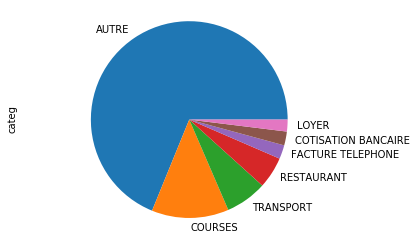

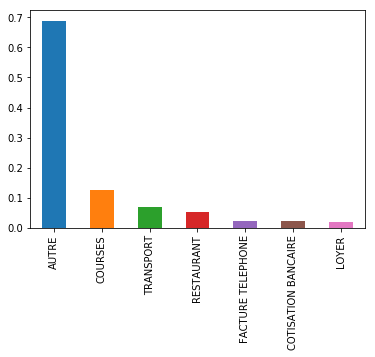

In [54]:
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plut√¥t qu'une √©llipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

Ici, nous reprenons le m√™me raisonnement qu'au d√©but de ce chapitre. On commence par s√©lectionner la colonne souhait√©e  data['categ']  , puis on compte le nombre d'apparitions de chaque modalit√© :  data['categ'].value_counts()  .

Pour obtenir les fr√©quences, on peut √©ventuellement ajouter  normalize=True. On obtient donc la distribution empirique. Pour l'afficher, on fait appel √† la m√©thode  plot, √† laquelle on sp√©cifie le type de graphique souhait√© ( pie  ou  bar  ).

Si la variable est qualitative ordinale, alors il suffit de classer sur le graphique les modalit√©s en ordre croissant.

### Variables quantitatives

Pour les variables discr√®tes, on les repr√©sente par un √©quivalent du diagramme en tuyaux d'orgue : le diagramme en b√¢tons. Cependant, avec les variables qualitatives, on pouvait placer les tuyaux un peu n'importe o√π sur l'axe horizontal. Mais avec une variable quantitative, on est contraint √† placer pr√©cis√©ment les b√¢tons sur l'axe horizontal. Comme on doit √™tre pr√©cis, on pr√©f√®re que les b√¢tons soient tr√®s fins. 

Pour repr√©senter cela, nous allons cr√©er une variable  quart_mois  pouvant prendre les valeurs 1, 2, 3 ou 4, et indiquant l'avanc√©e dans le mois (1 : d√©but, ..., 4 : fin de mois) :

In [55]:
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

La ligne de code que vous avez fournie effectue une op√©ration sp√©cifique sur une colonne d'un DataFrame `data` de pandas. Voici une d√©composition et une explication d√©taill√©e de ce qu'elle fait :

```python
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]
```

#### Explications d√©taill√©es

1. **`data["date_operation"].dt.day`** :
   - `data["date_operation"]` s√©lectionne la colonne `date_operation` du DataFrame `data`.
   - `.dt.day` extrait le jour du mois de chaque date dans cette colonne. Cela produit une s√©rie d'entiers repr√©sentant les jours du mois.

2. **Compr√©hension de liste** :
   - `[ ... for jour in data["date_operation"].dt.day]` cr√©e une nouvelle liste en it√©rant sur chaque jour dans la s√©rie extraite.

3. **Calcul √† l'int√©rieur de la compr√©hension de liste** :
   - `int((jour-1)*4/31)+1` :
     - `jour-1` ajuste le jour pour qu'il commence √† 0 (le 1er jour du mois devient 0, le 2√®me jour devient 1, etc.).
     - `(jour-1)*4/31` divise l'intervalle de jours en quatre parties √©gales. 31 est utilis√© ici comme approximation du nombre de jours dans un mois. Cette op√©ration convertit les jours en quartiles (quart_mois).
     - `int(...)+1` convertit le r√©sultat en entier et ajoute 1 pour que les quartiles commencent √† 1 (plut√¥t qu'√† 0).

#### R√©sultat

- Chaque jour du mois est converti en un quartile :
  - Les jours du 1er au 7/8√®me sont dans le 1er quartile.
  - Les jours du 8/9√®me au 15/16√®me sont dans le 2√®me quartile.
  - Les jours du 16/17√®me au 23/24√®me sont dans le 3√®me quartile.
  - Les jours du 24/25√®me au 31√®me sont dans le 4√®me quartile.

#### Exemples
- Pour le 1er jour du mois : `(1-1)*4/31 + 1` = `0*4/31 + 1` = `1`
- Pour le 15√®me jour du mois : `(15-1)*4/31 + 1` = `14*4/31 + 1` ‚âà `2.8 + 1` ‚âà `3`
- Pour le 31√®me jour du mois : `(31-1)*4/31 + 1` = `30*4/31 + 1` ‚âà `3.87 + 1` ‚âà `4`

#### Utilisation
Cette ligne de code est utile pour diviser un mois en quartiles, ce qui peut √™tre pratique pour l'analyse de donn√©es chronologiques o√π vous voulez voir des tendances ou des comportements au cours des diff√©rentes p√©riodes d'un mois.

In [56]:
print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
5       2023-04-03                             CARTE XX XX XX XX   -14.39   
6       2023-04-05                          CARTE XX XX XX XX XX   -15.20   
7       2023-04-05                             CARTE XX XX XX XX   -12.00   
8       2023-04-05                PRELEVEMENT XX TELEPHONE XX XX    -7.02   
9       2023-04-05           CARTE XX XX LES ANCIENS ROBINSON XX    -6.80   
10      2023-04-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.84   
11      2023-04-07        VIREMENT XX XX XX XX XX XX XX XX XX XX   992.80   

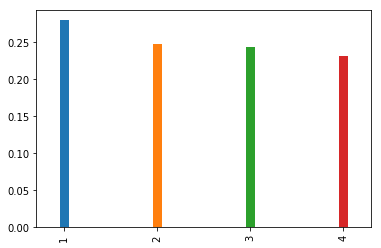

In [57]:
# Diagramme en b√¢tons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

In [58]:
data = data.drop(columns=['Temps_secondes'])
print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
5       2023-04-03                             CARTE XX XX XX XX   -14.39   
6       2023-04-05                          CARTE XX XX XX XX XX   -15.20   
7       2023-04-05                             CARTE XX XX XX XX   -12.00   
8       2023-04-05                PRELEVEMENT XX TELEPHONE XX XX    -7.02   
9       2023-04-05           CARTE XX XX LES ANCIENS ROBINSON XX    -6.80   
10      2023-04-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.84   
11      2023-04-07        VIREMENT XX XX XX XX XX XX XX XX XX XX   992.80   

### Variables quantitatives continues 

Prenons l'exemple de la taille d'une personne : c'est une variable continue. On peut tr√®s bien avoir une personne de taille 1,47801 m et une autre de 1,47802 m. Ces deux tailles sont diff√©rentes : faut-il alors afficher sur notre graphique 2 b√¢tons, un pour chacune des 2 tailles ?

Tu chipotes, 1,47801 m et 1,47802 m, c'est quasiment la m√™me valeur, il faut donc que tu les consid√®res comme √©gales !

Tout √† fait ! Consid√©rer que 1,47801 m et 1,47802 m sont presque √©gales, c'est regrouper ces valeurs. On dit alors que l'on agr√®ge des valeurs en classes. Si on d√©cide d'agr√©ger en classes de taille 0,2 m, alors ces 2 valeurs seront toutes les deux situ√©es dans la classe [1.4m;1.6m[
 

Notez qu'il est possible d'agr√©ger en classes de largeurs in√©gales. Par exemple, on peut avoir des classes de largeur 0,5 m pour les tailles inf√©rieures √† 1 m, puis des classes de largeur 0,2 m pour les tailles sup√©rieures √† 1 m. On aura ceci : [0m;0.5m[
 , [0.5m;1m[
 , [1m;1.2m[
 , [1.2m;1.4m[
 , etc.

Le fait d'agr√©ger une variable s'appelle la discr√©tisation (en anglais : binning, bucketing ou discretization).

Ainsi, pour les variables continues, on utilise l'histogramme, dans lequel les valeurs sont agr√©g√©es. Ici, comme on repr√©sente des classes (ou des intervalles, si vous pr√©f√©rez), on n'utilise plus de fins b√¢tons, mais des rectangles dont la largeur correspond √† la largeur de la classe.

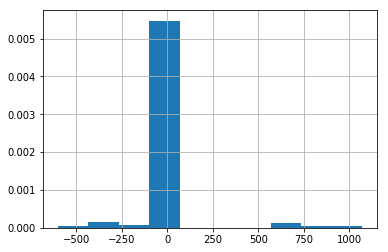

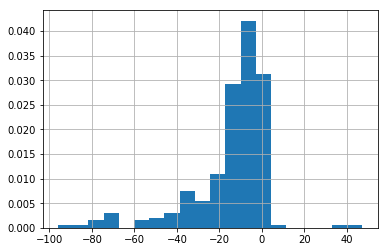

In [59]:
# Histogramme
data["montant"].hist(density=True)
plt.show()

# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

Ce code affiche deux histogrammes bas√©s sur la colonne `montant` d'un DataFrame `data` en utilisant la biblioth√®que `pandas` pour la manipulation des donn√©es et `matplotlib` pour la visualisation. Voici une explication d√©taill√©e de chaque partie du code :

### Premier histogramme

```python
data["montant"].hist(density=True)
plt.show()
```

1. **`data["montant"].hist(density=True)`** :
   - `data["montant"]` s√©lectionne la colonne `montant` du DataFrame `data`.
   - La m√©thode `hist(density=True)` cr√©e un histogramme des valeurs de la colonne `montant`.
   - Le param√®tre `density=True` normalise l'histogramme pour que l'aire sous la courbe soit √©gale √† 1, ce qui permet de visualiser une estimation de la densit√© de probabilit√©.

2. **`plt.show()`** :
   - Affiche l'histogramme g√©n√©r√©.

### Deuxi√®me histogramme

```python
data[data.montant.abs() < 100]["montant"].hist(density=True, bins=20)
plt.show()
```

1. **`data[data.montant.abs() < 100]["montant"]`** :
   - `data.montant.abs()` calcule la valeur absolue de chaque √©l√©ment dans la colonne `montant`.
   - `data[data.montant.abs() < 100]` s√©lectionne uniquement les lignes o√π la valeur absolue de `montant` est inf√©rieure √† 100.
   - `["montant"]` s√©lectionne √† nouveau la colonne `montant` dans ce sous-ensemble filtr√© du DataFrame.

2. **`hist(density=True, bins=20)`** :
   - Cr√©e un histogramme des valeurs de la colonne `montant` pour le sous-ensemble filtr√©.
   - `density=True` normalise l'histogramme pour que l'aire sous la courbe soit √©gale √† 1.
   - `bins=20` d√©finit le nombre de bacs (ou intervalles) pour l'histogramme, augmentant la r√©solution par rapport √† l'histogramme par d√©faut.

3. **`plt.show()`** :
   - Affiche le deuxi√®me histogramme g√©n√©r√©.

### En r√©sum√©

- Le premier histogramme affiche la distribution de toutes les valeurs de la colonne `montant`, normalis√©e pour repr√©senter une densit√© de probabilit√©.
- Le deuxi√®me histogramme affiche la distribution des valeurs de `montant` dont la valeur absolue est inf√©rieure √† 100, avec une r√©solution plus √©lev√©e (20 bacs), √©galement normalis√©e pour repr√©senter une densit√© de probabilit√©.

Ces visualisations permettent de comprendre la distribution des valeurs de `montant` dans l'ensemble de donn√©es, et en particulier, d'observer de plus pr√®s les valeurs dans une plage restreinte dans le deuxi√®me histogramme.

On souhaite regrouper les valeurs en classes. Utiliser  value_counts()  n'aurait donc pas vraiment de sens : on utilise donc la m√©thode  hist(), qui s'occupe elle-m√™me de regrouper les valeurs en classes.

Le premier histogramme g√©n√©r√© est un peu trop √©tal√©, car il y a des montants tr√®s grands et tr√®s petits. On filtre donc ici les montants compris entre -100 ‚Ç¨ et 100 ‚Ç¨ gr√¢ce √†  data[data.montant.abs() < 100]  (on utilise pour cela la valeur absolue). Enfin, on peut aussi sp√©cifier le nombre de classes voulues gr√¢ce au mot cl√©  bins  : ici 20.

Pour l'histogramme, il existe des r√®gles pour d√©terminer le nombre optimal de classes. Par exemple, la r√®gle de Sturges (1926) consid√®re comme nombre optimal de classes :

k=[1+log2(n)]

o√π n
 est la taille de l'√©chantillon.

Si cependant, vous ne souhaitez pas agr√©ger les valeurs, il existe une autre solution : repr√©senter la fonction de r√©partition empirique. Il faut vous la repr√©senter comme un escalier. Pour la repr√©senter, on parcourt l'axe horizontal, des petites valeurs vers les grandes valeurs. √Ä chaque fois que l'on rencontre une valeur qui est pr√©sente dans notre √©chantillon, on monte d'une marche. Il y aura donc autant de marches que de valeurs, et d'ailleurs autant que d'individus. Toutes les marches ont la m√™me hauteur.

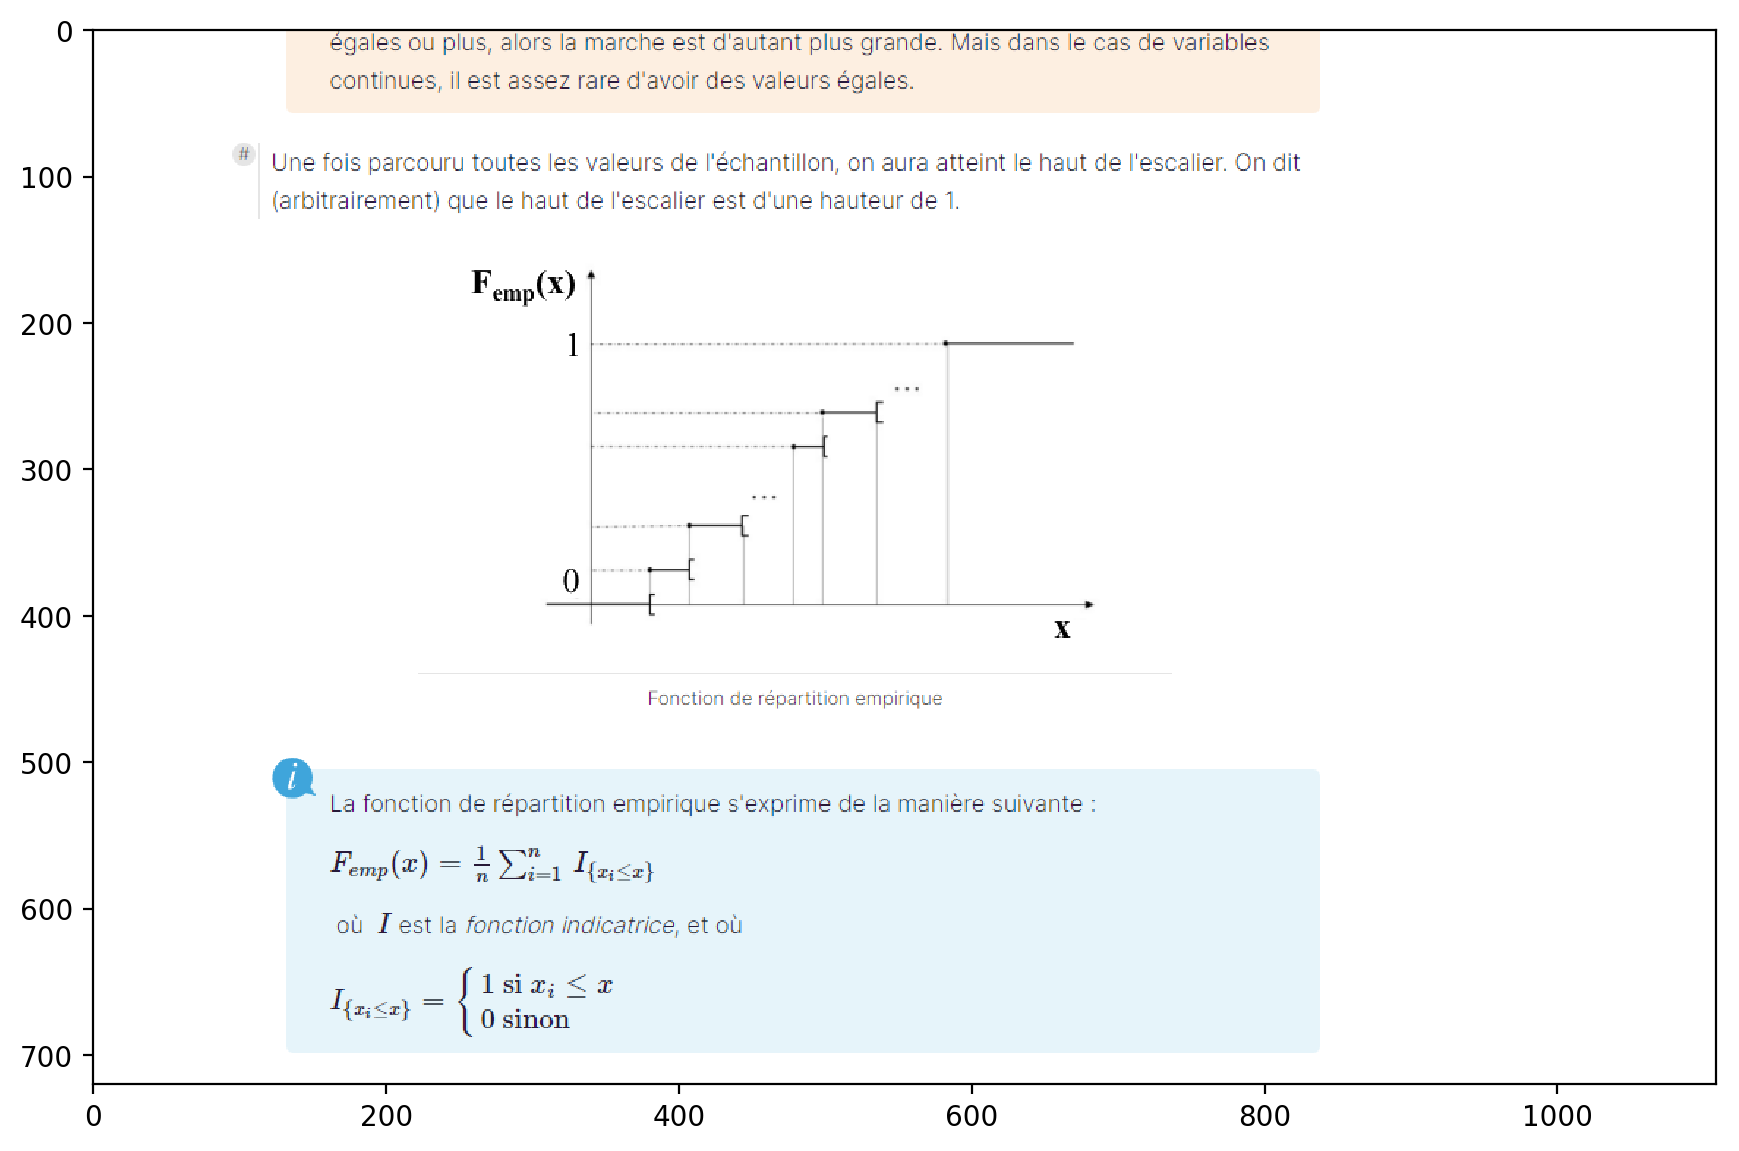

In [60]:
img1 = mpimg.imread('rep.png')
# Obtenir les dimensions de l'image
height, width, _ = img.shape

# Configurer la taille de la figure pour qu'elle corresponde √† celle de l'image
fig = plt.figure(figsize=(width/30, height/50), dpi=200)
imgplot = plt.imshow(img1)
plt.show()

## Distribution en effectif/frequences

Comptage des effectifs par modalit√©s

In [61]:
effqmois=data['quart_mois'].value_counts()
effqmois

1    86
2    76
3    75
4    71
Name: quart_mois, dtype: int64

R√©ccup√©ration de l'index

In [62]:
modqmois=effqmois.index ##L'index nous donne donc les diff√©rentes modalit√©s contenues dans notre variablet
modqmois

Int64Index([1, 2, 3, 4], dtype='int64')

Creation d'un tableau contenant les modalit√©s de quart_mois

In [63]:
tabqmois= pd.DataFrame(modqmois, columns=["quart_mois"])
tabqmois

quart_mois
0           1
1           2
2           3
3           4

Cr√©ation d'une nouvelle colonne contenant les valeurs de effqmois

In [64]:
tabqmois["n"]=effqmois.values

In [65]:
tabqmois

quart_mois   n
0           1  86
1           2  76
2           3  75
3           4  71

Cr√©ation de la colonne des fr√©quences

In [66]:
tabqmois['f']=tabqmois["n"]/len(data)
tabqmois

quart_mois   n         f
0           1  86  0.279221
1           2  76  0.246753
2           3  75  0.243506
3           4  71  0.230519

In [67]:
###trier le tableau selon les modalit√©s de la variable
tabqmois.sort_values("quart_mois")

quart_mois   n         f
0           1  86  0.279221
1           2  76  0.246753
2           3  75  0.243506
3           4  71  0.230519

In [68]:
##tableaux en frequences cumul√©s
tabqmois["F"]=tabqmois["f"].cumsum()
tabqmois

quart_mois   n         f         F
0           1  86  0.279221  0.279221
1           2  76  0.246753  0.525974
2           3  75  0.243506  0.769481
3           4  71  0.230519  1.000000

La repr√©sentation sous forme de tableau est une bonne alternative √† une repr√©sentation graphique. 

Pour une variable qualitative, nous pouvons reprendre la distribution empirique repr√©sentant pour chaque modalit√©, l'effectif et la fr√©quence.

Pour une variable quantitative discr√®te, la repr√©sentation est tr√®s similaire √† celle d'une qualitative, en y ajoutant la fr√©quence cumul√©e.

Dans le cas d'une quantitative continue, on regroupera au pr√©alable les diff√©rentes valeurs en classe (discr√©tisation), ce qui nous renvoie directement dans la repr√©sentation d'une quantitative discr√®te.

### Analyse univari√©e

Dans cette partie, nous allons effectuer des analyses univari√©es. Une analyse univari√©e est une analyse effectu√©e sur une variable √† la fois. Voici quelques exemples d'analyse univari√©e :

Faire une √©tude sur r√©partition d'√¢ge de la population chinoise en 2010. Nous pourrions pour cela repr√©senter cette derni√®re comme vu lors des chapitres pr√©c√©dents, ou encore calculer la moyenne d'√¢ge de cette population.

OpenClassrooms souhaite √©valuer les performances des √©tudiants au quiz de la fin de la partie 1 de ce cours, on pourrait commencer par calculer le taux de r√©ussite global.

Vous cherchez √† √©valuer l'√©volution de l'√©rosion des sols de la r√©gion des Hauts-de France. On pourrait pour cela regarder l'indice d'√©rosion des sols.

Quel est le point commun entre la moyenne d'√¢ge de la population chinoise en 2010, le taux de r√©ussite au quiz de fin de la partie 1 de ce cours, et l'indice d'√©rosion des sols de la r√©gion des Hauts-de-France ? o_O

R√©ponse : ce sont tous des statistiques !

Formellement, une statistique, c'est un indicateur num√©rique calcul√© √† partir d'un √©chantillon. La moyenne d'√¢ge est calcul√©e √† partir des habitants d'un pays, le taux de r√©ussite √† un quiz est calcul√© √† partir des r√©ponses donn√©es par les √©tudiants, et l'indice d'√©rosion des sols est calcul√© √† partir de relev√©s effectu√©s sur des parcelles de terrain.

Autrement dit, d√®s que l'on calcule un nombre √† partir d'un √©chantillon, on calcule une statistique !

Une statistique est utile car elle nous permet de r√©sumer un grand √©chantillon en un seul nombre ! Certes, vous vous doutez bien qu'il y a une grande perte d'information quand on calcule une statistique : on peut calculer le taux de r√©ussite √† partir des r√©ponses des √©tudiants, mais on ne peut pas retrouver les r√©ponses des √©tudiants uniquement avec le taux de r√©ussite !

Ainsi, une statistique est un indicateur, plus ou moins efficace, d'une certaine propri√©t√© d'un √©chantillon.

On trouve √©galement le terme d'indice statistique. Un indice statistique, c'est une statistique construite √† partir d'une certaine vision, √† partir de connaissances d'un domaine (par ex. : l'√©conomie). En quelque sorte, un indice est une statistique "entour√©e" d'une certaine philosophie. √Ä la diff√©rence d'un indice, un indicateur est quant √† lui tr√®s neutre, comme une moyenne, par exemple.

Sur une m√™me population, on peut bien s√ªr calculer plusieurs indicateurs. Chacun d'entre eux nous donnera une indication sur une caract√©ristique diff√©rente de la population. Par exemple, la moyenne d'une classe √† un examen nous indiquera si l'examen a √©t√© bien r√©ussi ou pas. Mais sur cette m√™me population, l'√©cart-type des notes (nous verrons cette notion prochainement) nous indiquera s'il y a de grandes disparit√©s de notes parmi les √©tudiants.

Il ne faut jamais faire confiance √† 100 % √† un indicateur. Vous vous imaginez bien que r√©sumer une r√©alit√© complexe en un seul nombre, c'est forc√©ment faire l'impasse sur certains aspects importants de cette r√©alit√©. Ainsi, quand on utilise un indicateur, il faut toujours savoir ce qu'il mesure, et ce qu'il ne mesure pas !

### Mesures de tendance centrale 

#### Le mode
La plupart du temps, je mets entre 40 et 45 min.

Quand votre ami vous dit cela, il vous donne une mesure de tendance centrale qui s'appelle le mode.

Pour les variables qualitatives, ou pour les variables quantitatives discr√®tes, le mode est la modalit√© ou la valeur la plus fr√©quente. Dans notre relev√© bancaire, le mode de la variable categ est "Autre", car la modalit√© "Autre" est pr√©sente 212 fois dans l'√©chantillon, et toutes les autres modalit√©s ("loyer", "courses", etc.) sont pr√©sentes moins de fois.

Pour les variables quantitatives continues, on travaille dans le cas agr√©g√©, en regroupant les valeurs par classes. La classe modale est la classe la plus fr√©quente. Votre ami a d√©coup√© sa variable en tranches de 5 minutes, et a d√©termin√© que la tranche la plus fr√©quente √©tait [40min;45min[
 .

En Python, le calcul du mode tient en une ligne. Voici un exemple avec la variable montant :

In [69]:
data['montant'].mode()

0   -1.6
dtype: float64

#### moyenne
Vous r√©pondez donc √† votre ami : Oui, mais je ne peux pas me contenter de la dur√©e la plus fr√©quente : car si la deuxi√®me dur√©e la plus fr√©quente est de 65 √† 70 minutes, il faut que je parte beaucoup plus t√¥t ! Il r√©pond alors :

Oui, tu as raison. En fait je mets en moyenne 60 minutes par trajet, car il y a souvent des embouteillages.

Cela change tout : heureusement que vous lui avez demand√© de pr√©ciser, vous seriez arriv√© en retard ! Ici, votre ami vous a r√©pondu en termes de moyenne.

La moyenne, vous la connaissez tous. Pour calculer la moyenne de valeurs, on additionne celles-ci, puis on divise le r√©sultat par le nombre de valeurs.

Il est courant d'associer la notion de moyenne √† la notion d'√©quilibre et de centre de gravit√©. Pourquoi ? Imaginez que vous ayez 10 valeurs num√©riques. Vous prenez un b√¢ton, que vous graduez. Sur cette graduation, vous marquez au feutre l'emplacement de vos 10 valeurs, puis vous fixez au b√¢ton une balle sur chacune des 10 marques. Apr√®s avoir calcul√© la moyenne des 10 valeurs, vous l'inscrivez √©galement sur votre b√¢ton. Si vous souhaitez faire tenir votre b√¢ton en √©quilibre, √† l'horizontale, il vous faudra trouver son centre de gravit√©. Vous me voyez venir : le centre de gravit√© sera pile-poil l√† o√π vous aurez plac√© la moyenne des 10 valeurs !

In [70]:
data['montant'].mean()

2.8725649350649354

#### M√©diane 
Derri√®re le probl√®me de b√¢ton d√©s√©quilibr√©, vous aurez reconnu le concept d'outlier. Comme nous venons de le voir, la moyenne est une mesure peu robuste aux outliers.

Alors, √† propos de votre trajet √† parcourir, vous demandez √† votre ami : Quand tu me dis que tu mets en moyenne 60 min, j'imagine que tu consid√®res dans ton calcul les rares fois durant lesquelles il y avait de la neige, et que tu as mis 4 h √† faire la route ? Ce sont des outliers, autant ne pas les prendre en compte car c'est l'√©t√©, et il n'y aura pas de neige ! Ce √† quoi il vous r√©pond :

Oui effectivement. Je vais alors formuler la chose autrement : disons que la moiti√© des trajets que j'ai effectu√©s ont pris plus de 55 min, et ceux l'autre moiti√© ont pris moins de 55 min.

 Ici, votre ami vous parle en termes de m√©diane.

La m√©diane, (not√©e Med), est la valeur telle que le nombre d‚Äôobservations sup√©rieures √† cette valeur est √©gal au nombre d‚Äôobservations inf√©rieures √† cette valeur.

En gros, pour trouver la m√©diane de vos n
 valeurs, il faut commencer par les trier. Une fois tri√©es, on appelle x(1)
 la premi√®re valeur, x(2)
 la deuxi√®me valeur, ... , et x(n)
 la derni√®re valeur. La m√©diane, c'est la valeur qui sera exactement au milieu du classement, soit :

Med=x(n+12)

Ainsi, sur n=999
 trajets, la m√©diane est x(500)
 = 55 min.

Votre calcul marche bien car 999 est impair. Mais s'il y a 1 000 trajets, la m√©diane est-elle la 500e valeur ou la 501e valeur ? Si on choisit la 500e, alors il y a 499 valeurs en dessous et 500 valeurs au-dessus. Mais si on choisit la 501e, alors il y a 500 valeurs en dessous et 499 valeurs au-dessus : dans les 2 cas, c'est d√©s√©quilibr√© !

Effectivement. Dans ce cas, on coupe la poire en deux : on place la m√©diane au centre de la 500e et de la 501e valeur. Ainsi, s'il y a eu 1 000 trajets, et que la 500e valeur vaut x(500)
 = 54 min 30 sec, et que la 501e vaut x(501)
  = 55 min 30 sec, alors on coupe en deux et on prend 55 min.

Plus formellement, si n
 est pair, la m√©diane vaut :

Med=12(x(n2)+x(n2+1))

Voil√† comment calculer la m√©diane des montants :

In [71]:
data['montant'].median()

-9.5999999999999996

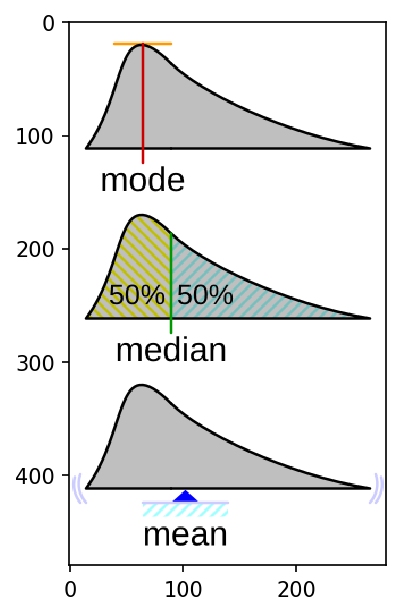

In [72]:
img = mpimg.imread('visu.png')
# Obtenir les dimensions de l'image
height, width, _ = img.shape

# Configurer la taille de la figure pour qu'elle corresponde √† celle de l'image
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img)
plt.show()

In [73]:
### On va maintenant calculer tout cela pour les diff√©rentes types d'op√©rations bancaires 
effopp=data['categ'].value_counts()
effopp

AUTRE                  212
COURSES                 39
TRANSPORT               21
RESTAURANT              16
FACTURE TELEPHONE        7
COTISATION BANCAIRE      7
LOYER                    6
Name: categ, dtype: int64

In [74]:
moda=effopp.index

In [75]:
# Initialisation des listes pour stocker les r√©sultats
mean_values = []
mode_values = []
median_values = []

In [76]:
for category, count in effopp.items():
    # Filtrage des donn√©es pour la cat√©gorie actuelle
    filtered_data = data[data['categ'] == category]['montant']
       # Calcul de la moyenne, du mode et de la m√©diane
    mean = np.mean(filtered_data)
    mode = filtered_data.mode().values[0]  # Prend le premier mode si plusieurs existent
    median = np.median(filtered_data)
    
    # Ajout des r√©sultats √† leurs listes respectives
    mean_values.append(mean)
    mode_values.append(mode)
    median_values.append(median)

# Cr√©ation d'un DataFrame pour afficher les r√©sultats
results_df = pd.DataFrame({
    'categ': effopp.index,
    'mean': mean_values,
    'mode': mode_values,
    'median': median_values
})

# Affichage des r√©sultats
print(results_df)

                 categ        mean    mode  median
0                AUTRE   23.433208   -1.60   -8.31
1              COURSES  -16.341282  -60.16  -12.24
2            TRANSPORT  -52.997143  -73.00  -53.10
3           RESTAURANT  -10.332500   -9.20  -10.10
4    FACTURE TELEPHONE  -12.045714   -7.02   -7.02
5  COTISATION BANCAIRE   -1.885714   -1.92   -1.92
6                LOYER -345.000000 -345.00 -345.00


### Indicateurs de dispersion

au chapitre pr√©c√©dent, votre ami vous a donn√© une estimation de la dur√©e du trajet. Mais il vous a donn√© des mesures de tendance centrale, comme par exemple la moyenne, qui est de 60 minutes par trajet.

Ce qui vous manque maintenant, c'est de savoir si les dur√©es des trajets que votre ami a effectu√©s sont tr√®s "resserr√©es" autour de 60 min (exemple :  [58, 60, 62, 59, 57...] ), ou bien si elles s'en √©cartent beaucoup (exemple :  [40, 70, 78, 43...] ).

Quel int√©r√™t ?

Si les valeurs sont tr√®s resserr√©es autour de 60 minutes, alors pr√©voyez de partir 75 minutes √† l'avance. Ainsi, il est probable que vous arriverez 5 ou 10 minutes avant votre entretien. Mais si les valeurs sont tr√®s √©cart√©es, alors pr√©voyez plut√¥t de partir 100 minutes √† l'avance, car il est tout √† fait possible que le trajet dure 80 minutes !

J'ai compris ! Mesurer l'espacement des valeurs... j'imagine qu'il y a une mesure statistique pour cela, non ?

Tout √† fait ! :D Il y en a m√™me plusieurs. On les appelle les mesures de dispersion.

Essayons de construire notre propre indicateur de dispersion, pas √† pas. Pour illustrer, prenons les valeurs suivantes (70, 60, 50, 55, 55, 65, 65), et donnons-leur √† chacune un nom : xi , avec i allant de 1 √† 7. Ainsi, nos valeurs portent les noms de x1 √† x7

 .

Formellement, on √©crit  (x1,...,xn)=(70,60,50,55,55,65,65)
 avec n=7

 .

Remarquons que la moyenne de ces valeurs vaut 60, on la note x¬Ø¬Ø¬Ø=60

, et on prononce "x barre".

Facile de faire une mesure de dispersion ! Prenons toutes nos valeurs, et calculons pour chacune d'entre elles l'√©cart qu'elles ont avec la moyenne. Puis additionnons tous ces √©carts !

C'est un bon d√©but. Comme notre moyenne est de 60, les √©carts des xi
 √† la moyenne sont : (x1‚àíx¬Ø¬Ø¬Ø,...,x7‚àíx¬Ø¬Ø¬Ø)=(10,0,‚àí10,‚àí5,‚àí5,5,5). Sauf que... si nous faisons la somme de ceux-ci, on obtient 0 ! On peut m√™me le d√©montrer math√©matiquement : quelle que soit la dispersion de vos valeurs, la somme des √©carts √† la moyenne vaudra toujours 0. Pas tr√®s efficace donc...

Si √ßa vaut 0, c'est parce qu‚Äôil y a des nombres positifs et des nombres n√©gatifs. √âvitons cela, et mettons-les tous au carr√©. Un nombre mis au carr√©, c'est toujours positif, n'est-ce pas ?

Ici, on a fait la somme de tous les $$((x_i - \bar{x})^2)$$, avec $$(i)$$ allant de 1 √† 7. Math√©matiquement, on note cette somme comme ceci :

$$
\sum_{i=1}^{7} (x_i - \bar{x})^2
$$


Bon. Il y a encore un probl√®me. Ici, on a 7 valeurs, tout simplement parce que nous sommes un peu paresseux, et nous n'en avons relev√© que 7. Mais en statistiques, plus on fait de relev√©s, plus on a une id√©e pr√©cise de ce que l'on d√©crit. Ainsi, on aurait d√ª retenir 10, 100 ou m√™me 1 000 valeurs !

Mais avec 1 000 valeurs, notre mesure exploserait ! Il passerait de 300 avec 7 valeurs √† peut-√™tre 40 000 000 000 avec 1 000 valeurs. C'est probl√©matique.

Alors, plut√¥t que de calculer la somme, et avoir un indicateur qui explose, prenons plut√¥t la moyenne. Ainsi, qu'il y ait 7 valeurs ou 1 000 valeurs, la moyenne n'explosera pas.

Bonne id√©e. La moyenne de (100,0,100,25,25,25,25) est 42,86.

Maht√©matiquement on diras que l'on prends la moyenne des ecarts quadratiques

### Variance empirique.

 $$ (1/n) \sum_{i=1}^{7} (x_i - \bar{x})^2
$$

Que l'on peut r√©ecrire   $$ (1/n) \sum_{i=1}^{n} (x_i )^2 -\bar{x}
$$

Pour calculer la variance en Python, cela se fait tr√®s facilement ! Il suffit d'utiliser la m√©thode .var() sur la variable consid√©r√©e. Par exemple avec la variable montant de notre jeu de donn√©es de transactions bancaires :

In [77]:
data['montant'].var()

31007.638040630954

Pour la variance empirique biais√©e.

Aussi, vous trouverez souvent une version "corrig√©e" de la variance empirique, que l'on qualifie de non biais√©e. En effet, quand on se plonge dans les calculs, on s'aper√ßoit que la variance empirique donne des valeurs qui (en moyenne) sont inf√©rieures √† la variance de la variable al√©atoire. Il s'agit de la notion de biais d'un estimateur. Un estimateur sans biais est meilleur qu'un estimateur biais√©.

Pour corriger ce biais, on a cr√©√© la variance empirique corrig√©e, ou variance empirique sans biais. Elle est souvent not√©e s‚Ä≤2
 , et est √©gale √† s‚Ä≤2=nn‚àí1v
 , o√π v
 est la variance empirique, et n
 la taille de l'√©chantillon. Quand la taille de l'√©chantillon est grande, la variance empirique et la variance empirique corrig√©e sont presque √©gales.

Voici comment calculer la variance empirique corrig√©e en Python 

In [78]:
data['montant'].var(ddof=0)

30906.963891148385

Pour corriger ce biais, on a cr√©√© la variance empirique corrig√©e, ou variance empirique sans biais. Elle est souvent not√©e $$( s'^2 )$$, et est √©gale √† :

$$[ s'^2 = \frac{n}{n-1}v ]$$

o√π $$( v )$$ est la variance empirique, et $$( n )$$ la taille de l'√©chantillon. Quand la taille de l'√©chantillon est grande, la variance empirique et la variance empirique corrig√©e sont presque √©gales.

L'√©cart-type empirique, c'est juste la racine carr√©e de la variance empirique. On l'appelle en anglais *standard deviation*, souvent abr√©g√© *std*. En fait, quand on calcule la variance empirique des temps de trajet, le r√©sultat a pour unit√© la minute¬≤, ce qui n'est pas tr√®s intelligible. En prenant la racine carr√©e, l'unit√© redevient la minute. Ici, notre √©cart-type vaut 6,55 minutes. On le note $$ s$$.

$$s = \sqrt{v} $$

Voil√† comment calculer l'√©cart-type de la variable montant :

In [79]:
data['montant'].std()

176.08985785851198

Mais lorsque vous faites un trajet, un √©cart-type de 6,55 minutes sur un trajet de 1 heure (1h en moyenne), ce n'est pas la m√™me chose qu'un √©cart-type de 6,55 minutes sur un trajet de 24 heures (24h en moyenne) ! Pour rem√©dier √† cela, on a donc cr√©√© le coefficient de variation qui est l'√©cart-type empirique divis√© par la moyenne :

$$CV=ùë†/ùë•$$
Le calcul de ce dernier en Python est tout aussi simple :

In [80]:
data['montant'].std()/data['montant'].mean()

61.300566510790262

### L'√©cart interquartile

Vous vous souvenez de la m√©diane ? C'est la valeur au-dessous de laquelle se trouvent la moiti√© des valeurs.
Un quartile, c'est la m√™me chose, mais avec la proportion d'un quart. Il existe 3 quartiles, not√©s $( Q_1 )$ (premier quartile), $ Q_2$ (deuxi√®me quartile) et $Q_3$ (troisi√®me quartile). Ainsi :
$ \frac{1}{4} $ des valeurs se trouvent en dessous de $ Q_1 $ et $ \frac{3}{4}$ au-dessus ;
$ \frac{2}{4}$ se trouvent en dessous de $Q_2$, et $ \frac{2}{4} $ au-dessus $Q_2$ est la m√©diane !) ;
$\frac{3}{4}$ se trouvent en dessous de $Q_3$, et $\frac{1}{4}$ au-dessus.

La g√©n√©ralisation de ce concept s'appelle le quantile d'ordre Œ±
. Ainsi, la m√©diane est le quantile d'ordre 0,5, Q1 le quantile d'ordre 0,25, Q3 le quantile d'ordre 0,75. Il y a √©galement les d√©ciles (quantiles d'ordre 0.1, 0.2, etc.), ou les centiles, aussi appel√©s percentiles (quantiles d'ordre 0,01, 0.02, etc.).

### La bo√Æte √† moustaches (boxplot)

Bo√Æte √† moustaches, quel nom rigolo ! :lol: Les anglophones l'appellent boxplot.

Elle permet de repr√©senter sch√©matiquement une distribution, en incluant sa dispersion. La bo√Æte est d√©limit√©e par Q1
 et Q3
 , et on repr√©sente souvent la m√©diane √† l‚Äôint√©rieur de la bo√Æte. On dessine ensuite des moustaches √† cette bo√Æte, qui vont de la valeur minimale √† la valeur maximale... √† condition que la moustache (d'un c√¥t√© ou de l'autre) ne mesure pas plus de 1,5 fois l'√©cart inter-quartiles. Si certaines valeurs sont au-dessous de  Q1‚àí1.5IQ
 ou au-dessus de Q3+1.5IQ
 , alors on les consid√®re comme des outliers, et on ne les inclut pas dans la moustache :

Les bo√Ætes √† moustaches et les histogrammes ont la m√™me vocation : donner un aper√ßu d'une distribution empirique. La bo√Æte √† moustaches est plus grossi√®re que l'histogramme, mais elle permet de comparer plus facilement la distribution de plusieurs variables (deux bo√Ætes √† moustaches sont plus simples √† comparer que 2 hisogrammes

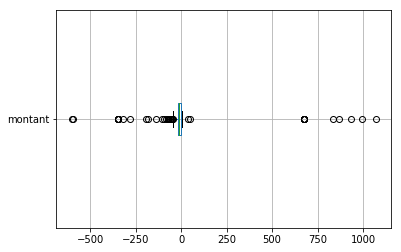

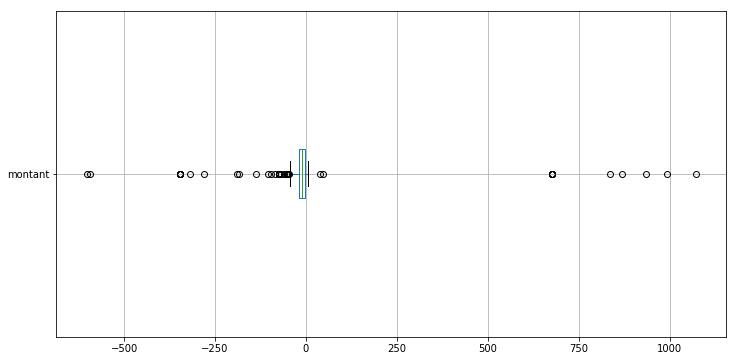

In [83]:
data.boxplot(column="montant", vert=False)
plt.figure(figsize=(12, 6)) 
data.boxplot(column="montant", vert=False)
plt.show()

### Ecart moyen absolu

Quand au d√©but du chapitre, nous avons dit :

> Mettons-les tous au carr√©. Un nombre mis au carr√©, c'est toujours positif, n'est-ce pas ?

... peut-√™tre vous √™tes-vous dit :

> On peut prendre la valeur absolue aussi plut√¥t que le carr√©, non ?

Tout √† fait. Quand on fait cela, on calcule l'√©cart moyen absolu.

Il y a deux versions : l'une o√π on mesure les √©carts √† la moyenne, l'autre o√π on mesure les √©carts √† la m√©diane.

Voici la version avec la m√©diane :

$\text{EMA} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \text{Med}| $

Si on souhaite une mesure plus robuste, on d√©finit √©galement le MAD qui est la m√©diane des √©carts absolus par rapport √† la m√©diane.

Les mesures de dispersion permettent de compl√©ter les mesures de tendance centrales, en pr√©cisant la fa√ßon dont les valeurs se r√©partissent autour de ces derni√®res.

La variance est la somme des diff√©rences √† la moyenne au carr√©, divis√©e par l'effectif total.

L'√©cart-type correspond √† la racine carr√©e de la variance.

L'√©cart moyen absolu est similaire √† la variance, √† la diff√©rence que le calcul fait intervenir la valeur absolue plut√¥t que le passage au carr√©.

Une repr√©sentation graphique int√©ressante pour repr√©senter la dispersion d'une variable quantitative est la bo√Æte √† moustaches, ou boxplot. Cette derni√®re se construit √† partir des diff√©rents quartiles.

## Mesures de forme


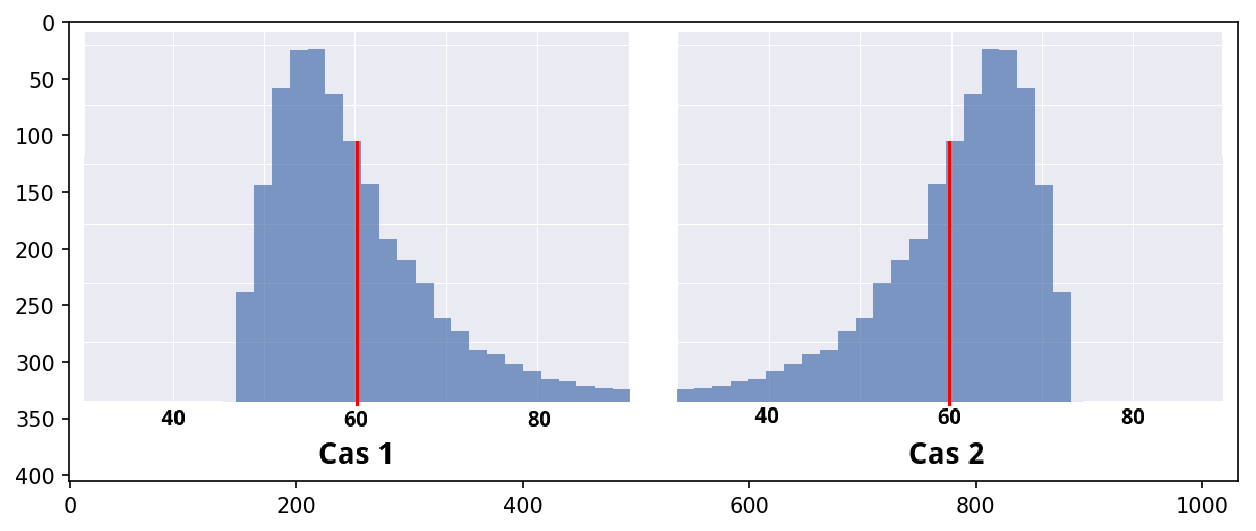

In [89]:
img4 = mpimg.imread('dis.png')
height, width, _ = img4.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img4)
plt.show()

Bon, votre ami vous a donn√© la moyenne des temps de trajet, ainsi que l‚Äô√©cart-type. Vous √™tes d√©j√† plus serein. Mais... il y a quelque chose que vous n'avez pas pr√©vu. Regardez ces 2 distributions :

Elles ont la m√™me moyenne empirique (60 minutes), et le m√™me √©cart-type. Cependant, le cas 1 est plus "risqu√©" que le cas 2. En effet, dans le cas 2, il est tr√®s peu probable que votre trajet dure plus de 75 minutes : pas de risque d'√™tre en retard ! Par contre, dans le cas 1, il est tout √† fait possible que votre trajet dure 80 minutes, ou m√™me beaucoup plus.

Vous remarquez donc que conna√Ætre la moyenne et l‚Äô√©cart-type ne suffit pas ici. Ce qu'il vous faut conna√Ætre, c'est la forme de la distribution : est-ce qu'elle s'√©tale plut√¥t vers la gauche ou plut√¥t vers la droite ?

Construisons notre propre indicateur de forme ! Nous souhaitons savoir si la distribution s'√©tale plut√¥t √† gauche ou √† droite de la moyenne.

Ceci est √©quivalent √† savoir si la majorit√© des valeurs est plus petite ou plus grande que la moyenne.

Je vous propose de reprendre celui que nous avons construit au chapitre pr√©c√©dent. Au d√©part, nous avions eu cette id√©e :

> Prenons toutes nos valeurs, et calculons pour chacune d'entre elles l'√©cart qu'elles ont avec la moyenne. Puis additionnons tous ces √©carts !

L'√©cart entre une valeur et la moyenne, nous l'avons √©crit $(x_i - \bar{x})$. Si cet √©cart est positif, cela signifie que $ x_i $ est sup√©rieur √† la moyenne ; s'il est n√©gatif, $x_i $ est inf√©rieur √† la moyenne.

En additionnant tous ces √©carts, nous nous sommes aper√ßus que la somme valait toujours 0. Nous avons donc mis cette quantit√© au carr√© : $ x_i - \bar{x})^2 $. Avec le carr√©, cette grandeur est toujours positive. Si elle est toujours positive, on perd l'information qui nous dit si $x_i$ est sup√©rieur ou inf√©rieur √† la moyenne. Or ici, nous voulons garder cette information !

Bon, si le carr√© ne convient pas, mettons-la au cube pour voir !

Bien vu ! Quand on met l'√©cart au cube, on obtient $x_i - \bar{x})^3$. Contrairement au carr√©, le cube conserve le signe de $x_i - \bar{x}$. Ensuite, prenons la moyenne de tous ces √©carts au cube, on obtient :

$\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3 $

Nous avons atteint notre objectif : cette grandeur sera n√©gative si la majorit√© des valeurs est plus petite que la moyenne, et positive sinon !

Mais nous pouvons faire encore mieux. Regardez ces deux distributions :

![La distribution dans le cas A est plus √©tendue que celle dans le cas B](dis2.png)

Elles ont la m√™me forme, mais pas le m√™me √©cart-type (la distribution A est plus √©tendue que B, A a un √©cart-type 2 fois sup√©rieur √† B). Comme elles ont la m√™me forme, on voudrait que notre indicateur donne la m√™me valeur pour ces deux distributions.

Mais actuellement, ce n'est pas le cas. Dans le cas A, les √©carts √† la moyenne sont 2 fois plus importants que dans le cas B. Comme on met ces √©carts au cube, notre indicateur sera donc \( 2^3 \) fois plus grand pour A que pour B. Or nous les souhaitons √©gaux. Pour corriger cela, il faut annuler l'effet de l'√©cart-type. On va donc diviser notre indicateur par l'√©cart-type mis au cube :

$\frac{1}{n} \sum_{i=1}^{n} \frac{(x_i - \bar{x})^3}{s^3}$

### Le skewness de forme

Devinez quoi ! L'indicateur que nous venons de cr√©er est utilis√© par les statisticiens et s'appelle le skewness empirique. En g√©n√©ral, on a l'habitude de nommer le skewness $\gamma_1$ et son num√©rateur $\mu_3$ :

$\gamma_1 = \frac{\mu_3}{s^3}$

avec 

$\mu_3 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3 $

Le skewness est une mesure d'asym√©trie. L‚Äôasym√©trie d‚Äôune distribution traduit la r√©gularit√© (ou non) avec laquelle les observations se r√©partissent autour de la valeur centrale. On interpr√®te cette mesure de cette mani√®re :

- Si $\gamma_1 = 0$, alors la distribution est sym√©trique.
- Si $\gamma_1 > 0$, alors la distribution est √©tal√©e √† droite.
- Si $\gamma_1 < 0$, alors la distribution est √©tal√©e √† gauche.

![Relation entre la forme de la distribution et le skewness](dis2.png)

L'√©tude de l'asym√©trie d'une distribution, c'est chercher qui de la m√©diane ou de la moyenne est la plus grande. Une distribution est dite sym√©trique si elle pr√©sente la m√™me forme de part et d‚Äôautre du centre de la distribution. Dans ce cas : $\text{Mode} = \text{Med} = \bar{x}$.

Une distribution est √©tal√©e √† droite (ou oblique √† gauche, ou pr√©sentant une asym√©trie positive) si : $ \text{Mode} < \text{Med} < \bar{x} $.

De m√™me, elle est √©tal√©e √† gauche (ou oblique √† droite) si $\text{Mode} > \text{Med} > \bar{x} $.

Le calcul du skewness se fait tr√®s facilement en Python. Voici un exemple avec la variable montant de notre jeu de donn√©es de transactions bancaires :


In [90]:
data['montant'].skew()

3.3618450105098843

### Le Kurtosis empirique

Le kurtosis empirique n'est pas une mesure d'asym√©trie, mais c'est une mesure d'aplatissement. L‚Äôaplatissement peut s‚Äôinterpr√©ter √† la condition que la distribution soit sym√©trique. En fait, on compare l'aplatissement par rapport √† la distribution la plus c√©l√®bre, appel√©e distribution normale (parfois "courbe de Gauss" ou "Gaussienne"). Vous l'avez probablement d√©j√† vue, elle ressemble √† cela

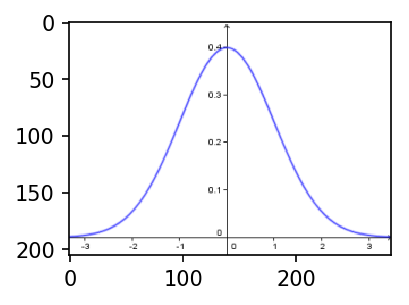

In [91]:
img5=mpimg.imread('norm.png')
height, width, _ = img5.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img5)
plt.show()

Bien s√ªr ! Les termes $\mu_3$ et $\mu_4$ sont effectivement des moments d'ordre 3 et 4 respectivement. Voici une explication d√©taill√©e :

### Moments d'ordre 3 et 4

1. **Moment d'ordre 3 $\mu_3$ :**
   Le moment d'ordre 3 est d√©fini comme suit pour une s√©rie de donn√©es $x_1, x_2, \ldots, x_n$ avec une moyenne $ \bar{x} $ :
   $\mu_3 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3$
   
   Il mesure l'asym√©trie de la distribution des donn√©es autour de leur moyenne. Si \( \mu_3 > 0 \), cela indique que la distribution est √©tal√©e √† droite (skewness positif) ; si \( \mu_3 < 0 \), la distribution est √©tal√©e √† gauche (skewness n√©gatif).

2. **Moment d'ordre 4 (\( \mu_4 \)) :**
   Le moment d'ordre 4 est d√©fini comme suit :
   $\mu_4 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4$
   
   Il mesure la concentration des valeurs autour de la moyenne et est utilis√© pour calculer le kurtosis, qui indique √† quel point une distribution est ¬´ lourde ¬ª ou ¬´ l√©g√®re ¬ª par rapport √† la distribution normale. La formule du kurtosis est donn√©e par :
   $\gamma_2 = \frac{\mu_4}{s^4} - 3$
   o√π $s$ est l'√©cart-type.

### Interpr√©tation

-$\mu_3$ et $\mu_4$ sont des mesures num√©riques qui fournissent des informations sur la forme de la distribution des donn√©es.
- $\mu_3$ est utilis√© pour calculer le skewness $\gamma_1$, qui indique l'asym√©trie de la distribution.
- $\mu_4 $ est utilis√© pour calculer le kurtosis $\gamma_2 $, qui mesure la ¬´ queue ¬ª de la distribution par rapport √† une distribution normale.

Ces moments sont des outils essentiels en statistique pour caract√©riser et comprendre la nature des distributions de donn√©es observ√©es.

En statistique, lorsque l'on parle de la "queue" d'une distribution, cela fait r√©f√©rence √† la partie de la distribution o√π se trouvent les valeurs extr√™mes par rapport √† la moyenne. Plus pr√©cis√©ment :

1. **Queue de distribution longue (ou √©paisse) :**
   - Une distribution avec une queue longue pr√©sente un nombre significatif de valeurs qui s'√©loignent consid√©rablement de la moyenne, souvent plus que ce que l'on pourrait attendre d'une distribution normale.
   - Cela peut indiquer la pr√©sence de valeurs aberrantes (outliers) ou une variabilit√© plus importante dans les donn√©es.
   - Un kurtosis √©lev√© (positif) indique une queue de distribution longue.

2. **Queue de distribution courte (ou fine) :**
   - Une distribution avec une queue courte signifie que les valeurs sont g√©n√©ralement plus proches de la moyenne et qu'il y a moins de valeurs extr√™mes.
   - Cela peut indiquer une distribution plus concentr√©e autour de la moyenne et moins sujette aux valeurs aberrantes.
   - Un kurtosis faible (n√©gatif) indique une queue de distribution courte.

En r√©sum√©, la "queue" d'une distribution se r√©f√®re √† la r√©gion o√π se situent les valeurs extr√™mes par rapport √† la moyenne, et le kurtosis est une mesure qui quantifie la forme de cette queue par rapport √† une distribution normale. Un kurtosis √©lev√© (positif) indique une distribution avec des queues plus √©paisses, tandis qu'un kurtosis faible (n√©gatif) indique des queues plus fines.

In [96]:
data['montant'].kurtosis()

17.271904828267701

Il s‚Äôinterpr√®te comme ceci :

Si Œ≥2=0
 , alors la distribution a le m√™me aplatissement que la distribution normale.

Si Œ≥2>0
 , alors elle est moins aplatie que la distribution normale : les observations sont plus concentr√©es.

Si Œ≥2<0
 , alors les observations sont moins concentr√©es : la distribution est plus aplatie.

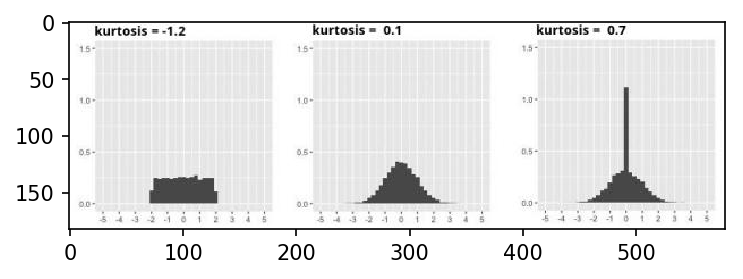

In [98]:
img6=mpimg.imread('kurtosis.jpeg')
height, width, _ = img6.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img6)
plt.show()

In [101]:
data['solde_avt_ope'].kurtosis()

0.12914086318246509

In [102]:
data['quart_mois'].kurtosis()

-1.372438561844638

ce qui confirme l'id√©e que l'on d√©pense plus en d√©but de mois.

Les mesures de forme sont des mesures permettant de d√©terminer si la majeure partie des valeurs est plus petite ou plus grande que la moyenne.

Le skewness est une mesure d'asym√©trie, qui correspond √† l'√©tude de la r√©gularit√© (ou non) avec laquelle les observations se r√©partissent autour de la valeur centrale.

Le kurtosis empirique est une mesure d'aplatissement de la distribution, comparativement √† l'aplatissement d'une distribution normale.

### Mesures de concentration

Bonne nouvelle, nous en avons fini avec cette histoire d‚Äôentretien d'embauche et de cet ami qui, au lieu de vous dire clairement combien de temps il faut pr√©voir pour que vous arriviez √† l'heure, vous parle en termes de m√©diane, moyenne, variance, skewness et tout le tralala !

Revenons sur nos relev√©s bancaires, et √©tudions nos d√©penses.

Une d√©pense, c'est une somme d'argent. Cela tombe bien, car les mesures de concentration sont le plus souvent utilis√©es pour des sommes d'argent ! √âtudier la concentration d'argent, c'est regarder si l'argent est r√©parti de mani√®re √©galitaire ou pas.

Ce que l'on va regarder, c'est si tout l'argent que vous d√©pensez se concentre en quelques op√©rations bancaires, ou si au contraire, il est bien r√©parti parmi les op√©rations. Dire que votre argent se concentre sur quelques op√©rations signifie que g√©n√©ralement, vous faites de tr√®s nombreuses petites d√©penses, et que parfois, il vous arrive de faire quelques d√©penses √©normes.

Au contraire, l'argent que vous d√©pensez est bien r√©parti si toutes vos op√©rations bancaires (sortantes) ont √† peu pr√®s le m√™me montant.

Pour visualiser cela, nous utilisons la courbe de Lorenz.

#### Courbes de lorrentz

La hauteur de l'escalier est la somme des hauteurs des marches. La somme des hauteurs des marches correspond √† la somme de tous les revenus des individus. Par exemple, si 10.000 ‚Ç¨ ont √©t√© distribu√©s parmi la population, la hauteur de l'escalier sera de 10 m (si on consid√®re que 1 m correspond √† 1.000 ‚Ç¨).

La courbe de Lorenz repr√©sente tout simplement cet escalier, √† cela pr√®s que la hauteur de l'escalier est ramen√©e √† 1, et que la longueur de l'escalier (projet√©e au sol) est aussi ramen√©e √†

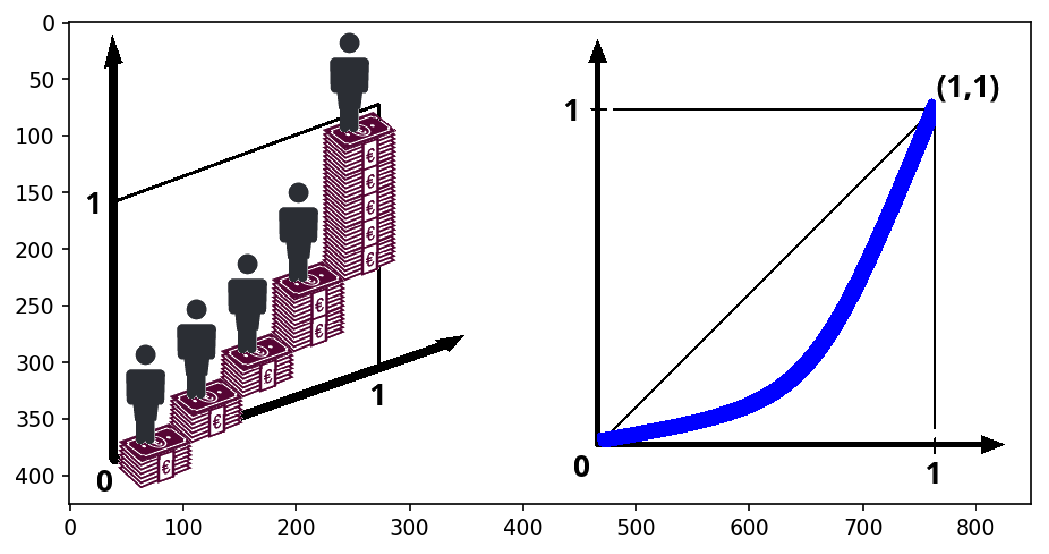

In [104]:
img7=mpimg.imread('lorenz.png')
height, width, _ = img7.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img7)
plt.show()

Que se passe-t-il si tous les gens re√ßoivent la m√™me somme d'argent ?

Dans ce cas, la r√©partition est la plus √©galitaire possible. L'escalier se pr√©sente comme ceci (√† gauche) :

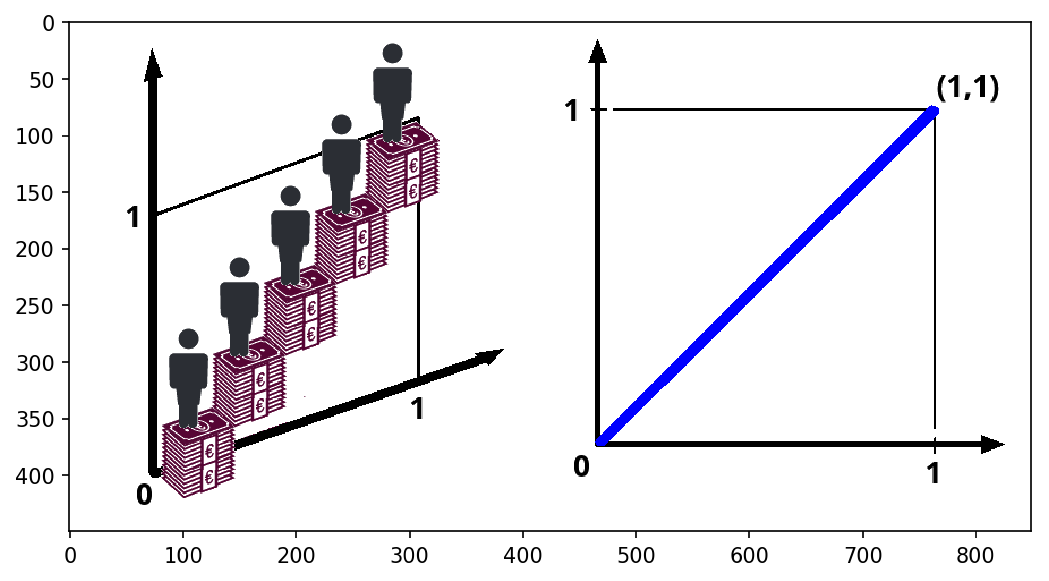

In [106]:
img8=mpimg.imread('lorenz1.png')
height, width, _ = img8.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img8)
plt.show()

On voit que les marches sont r√©guli√®res, et que toutes les personnes sont align√©es sur une droite appel√©e premi√®re bissectrice, c'est-√†-dire qu'elle passe par les points (0,0) et (1,1). Elle est repr√©sent√©e en bleu sur le graphique de droite.

Et si une seule personne concentre en sa possession l'ensemble de la richesse ?

Nous sommes dans l‚Äôextr√™me inverse du cas pr√©c√©dent. Ici, la r√©partition est la plus in√©galitaire possible :

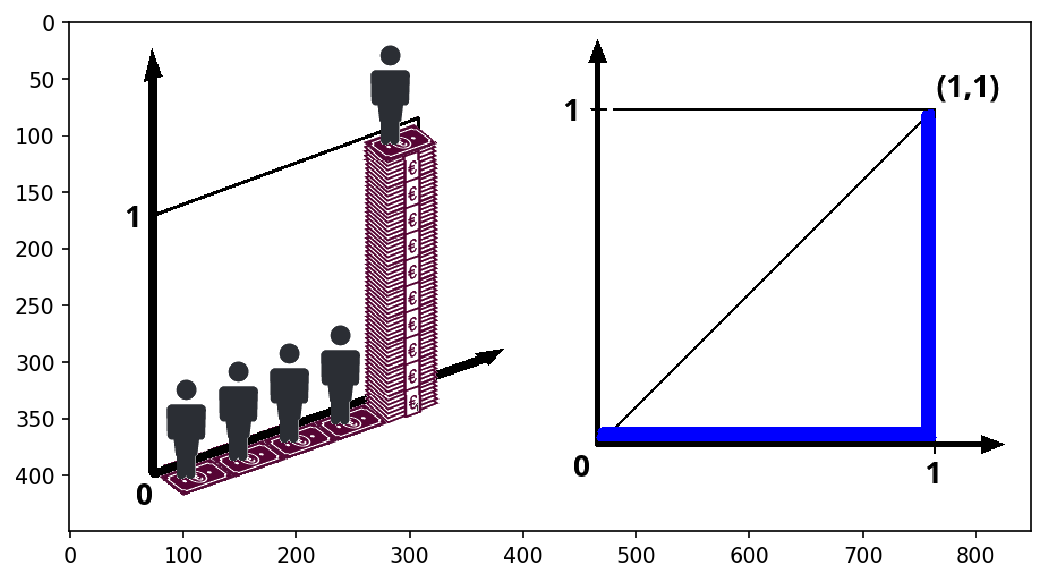

In [107]:
img9=mpimg.imread('lorenz2.png')
height, width, _ = img9.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img9)
plt.show()

Ici, la courbe de Lorenz ne suit plus du tout la premi√®re bissectrice, mais elle s'en √©loigne au maximum !

En r√©sum√©, plus la courbe de Lorenz est proche de la premi√®re bissectrice, plus la r√©partition est √©galitaire.

Voici le code permettant d'afficher la courbe de Lorenz :

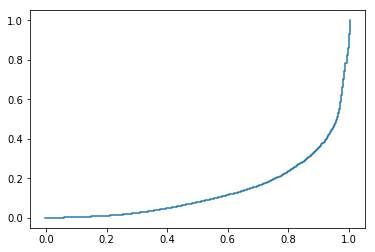

In [108]:
depenses = data[data['montant'] < 0]#On s√©lectionne les d√©penses dans un nouveau fichier
dep = -depenses['montant'].values#on les transforme en valeurs positives dans dep
n = len(dep)#taille
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence √† 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment suppl√©mentaire d'ordonn√©e 0. Le premier segment commence √† 0-1/n, et le dernier termine √† 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

On y s√©lectionne tout d'abord le sous-√©chantillon de travail que l'on appelle  depenses  . Comme √©voqu√© plus haut, il faut trier les individus dans l'ordre croissant des valeurs de la variable ; nous le faisons ici gr√¢ce √†  np.sort(dep)  , car  dep  contient les observations de la variable montant.

Ensuite, nous calculons la somme cumul√©e gr√¢ce √†  np.cumsum()  . Pour normaliser et faire en sorte que le haut de la courbe soit √† 1, on divise le tout par  dep.sum()  . La variable  lorenz  contient les ordonn√©es des points, mais il nous faut maintenant leurs abscisses : celles-ci s'√©tendent de 0 √† 1 (comme √©voqu√© pr√©c√©demment) √† intervalle r√©guliers. C'est ce que produit  np.linspace(0-1/n,1+1/n,len(lorenz)) 

Ce code Python permet de g√©n√©rer une courbe de Lorenz pour les d√©penses, ce qui est utilis√© en √©conomie pour visualiser la r√©partition relative d'une quantit√© entre les individus ou les cat√©gories. Voici une explication d√©taill√©e ligne par ligne :

```python
depenses = data[data['montant'] < 0]  # S√©lectionne les d√©penses dans un nouveau dataframe 'depenses'
dep = -depenses['montant'].values  # Transforme les montants des d√©penses en valeurs positives dans 'dep'
n = len(dep)  # Nombre total d'observations (taille de 'dep')

# Calcul de la courbe de Lorenz
lorenz = np.cumsum(np.sort(dep)) / dep.sum()  # Calcule la somme cumul√©e des d√©penses tri√©es, normalis√©e par la somme totale des d√©penses
lorenz = np.append([0], lorenz)  # Ajoute 0 au d√©but de la courbe de Lorenz pour commencer √† l'origine

# Cr√©ation des axes pour la courbe de Lorenz
xaxis = np.linspace(0 - 1/n, 1 + 1/n, n + 1)
# Il y a un segment de taille n pour chaque individu, plus 1 segment suppl√©mentaire d'ordonn√©e 0.
# Le premier segment commence √† 0 - 1/n, et le dernier termine √† 1 + 1/n.

# Affichage de la courbe de Lorenz
plt.plot(xaxis, lorenz, drawstyle='steps-post')
plt.show()
```

### Explication d√©taill√©e :

1. **S√©lection des d√©penses :**
   ```python
   depenses = data[data['montant'] < 0]
   ```
   - `data` est un DataFrame contenant les donn√©es.
   - `data['montant'] < 0` cr√©e un masque bool√©en pour s√©lectionner les lignes o√π la colonne 'montant' est n√©gative, donc les d√©penses.
   - `depenses` contient uniquement les lignes o√π les montants sont n√©gatifs.

2. **Transformation des montants en valeurs positives :**
   ```python
   dep = -depenses['montant'].values
   ```
   - `depenses['montant'].values` r√©cup√®re les valeurs de la colonne 'montant' des d√©penses s√©lectionn√©es.
   - `-` avant `depenses['montant'].values` transforme chaque valeur en son oppos√© pour obtenir des valeurs positives.
   - `dep` contient maintenant les d√©penses transform√©es en valeurs positives.

3. **Calcul de la courbe de Lorenz :**
   ```python
   lorenz = np.cumsum(np.sort(dep)) / dep.sum()
   ```
   - `np.sort(dep)` trie les valeurs positives des d√©penses.
   - `np.cumsum(...)` calcule la somme cumul√©e des valeurs tri√©es.
   - `dep.sum()` donne la somme totale des d√©penses.
   - `lorenz` est un tableau des valeurs normalis√©es de la somme cumul√©e des d√©penses tri√©es, repr√©sentant la courbe de Lorenz.

4. **Pr√©paration des axes pour la courbe de Lorenz :**
   ```python
   xaxis = np.linspace(0 - 1/n, 1 + 1/n, n + 1)
   ```
   - `np.linspace(start, stop, num)` g√©n√®re `num` valeurs uniform√©ment espac√©es entre `start` et `stop`.
   - `start = 0 - 1/n` et `stop = 1 + 1/n` pour couvrir l'intervalle complet de la courbe de Lorenz.
   - `n + 1` segments pour repr√©senter chaque individu et un segment suppl√©mentaire pour l'origine.

5. **Affichage de la courbe de Lorenz :**
   ```python
   plt.plot(xaxis, lorenz, drawstyle='steps-post')
   plt.show()
   ```
   - `plt.plot(xaxis, lorenz, drawstyle='steps-post')` trace la courbe de Lorenz avec un style d'affichage escalier post√©rieur.
   - `plt.show()` affiche le graphique.

### Interpr√©tation :
La courbe de Lorenz montre la distribution cumulative des d√©penses. Si la courbe de Lorenz est une ligne droite diagonale parfaite de l'angle inf√©rieur gauche au coin sup√©rieur droit, cela signifie que la r√©partition des d√©penses est parfaitement √©gale entre les individus. Plus la courbe de Lorenz est √©loign√©e de cette ligne diagonale, plus il y a d'in√©galit√© dans la r√©partition des d√©penses.

#### M√©diale

Nous avons dit que la courbe de Lorenz est un escalier de hauteur 1. Le salaire m√©dial, c'est simplement le salaire de la personne qui se trouve √† la moiti√© de la hauteur : 0,5.

La valeur du salaire m√©dial n'est pas directement visible sur la courbe de Lorenz, mais on peut y voir la personne qui a le salaire m√©dial. De m√™me, la personne qui a le salaire m√©dian est situ√©e exactement √† 0,5 sur l'axe horizontal. 

On savait que 50 % des salaires sont inf√©rieurs au salaire m√©dian, et 50 % sont sup√©rieurs. Maintenant on sait que la somme des salaires inf√©rieurs au salaire m√©dial vaut 50 % de la somme de tous les salaires, et √©videmment, la somme des salaires sup√©rieurs au salaire m√©dial vaut 50 % de la somme de tous les salaires.

#### Indice de gini

Bien s√ªr ! Voici comment mettre cette formule en markdown :

Le **coefficient de Gini** r√©sume la disparit√© √©conomique repr√©sent√©e par la courbe de Lorenz. Il mesure l'aire entre la premi√®re bissectrice (qui repr√©sente une r√©partition √©quitable) et la courbe de Lorenz elle-m√™me. Si $S $ repr√©sente cette aire, alors le coefficient de Gini $\text{gini}$ est calcul√© comme suit :

$\text{gini} = 2 \times S$

Dans cette formule :

$S$ est l'aire entre la premi√®re bissectrice et la courbe de Lorenz.
$\text{gini}$ donne une mesure de l'in√©galit√© √©conomique : plus il est proche de 0, plus la distribution est √©quitable, tandis que plus il est proche de 1, plus la distribution est in√©quitable.

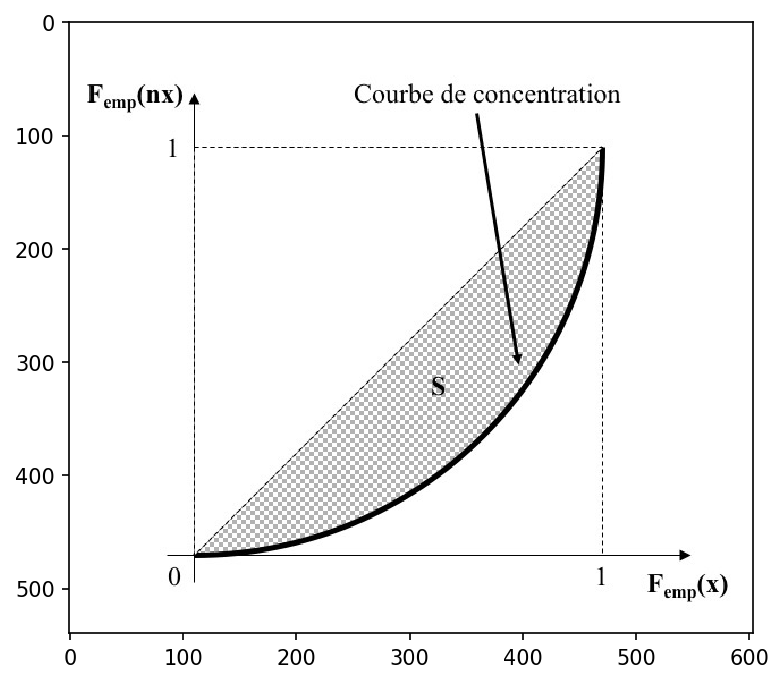

In [109]:
img10=mpimg.imread('gini.jpeg')
height, width, _ = img10.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img10)
plt.show()

Plus la distribution du revenu est concentr√©e, plus la fraction la plus riche de la population re√ßoit une grande partie des revenus, et plus la fraction la plus pauvre re√ßoit une petite partie des revenus. √Ä l'inverse, dans une distribution du revenu parfaitement √©galitaire, 10 % de la population re√ßoit exactement 10 % des revenus totaux.

In [110]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est √† moiti√© en dessous de 0, on le coupe donc en 2, on fait de m√™me pour le dernier segment lorenz[-1] qui est √† moiti√© au dessus de 1.
S = 0.5 - AUC # surface entre la premi√®re bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.72043868137391853

Les mesures de concentration permettent d'√©valuer si une variable est √©galement r√©partie (ou non) entre diff√©rents individus.

La courbe de Lorenz permet de repr√©senter la r√©partition d'une variable au sein d'une population, notamment si elle est √©galitaire ou non.

Le coefficient de GINI permet d'√©valuer de fa√ßon chiffr√©e cette r√©partition. Il correspond √† deux fois l'aire sous la courbe de Lorenz.

On arrive √† la fin de cette partie sur l'analyse univari√©e ! Avant de commencer la prochaine partie, n'oubliez pas de valider vos acquis avec le quiz. ;)

Vous √™tes maintenant capable d‚Äô√©tudier toutes les variables l‚Äôune apr√®s l‚Äôautre. Bravo, vous √™tes donc un pro de l‚Äôanalyse univari√©e.

J‚Äôai √©tudi√© toutes les variables, c'est tout bon ! Mais alors pourquoi il reste des chapitres √† ce cours ? :o

Eh bien non, ce n‚Äôest pas fini. Dans cette troisi√®me partie, nous allons √©tudier les relations entre deux variables. C‚Äôest l‚Äôanalyse bivari√©e. Pour certains chapitres, il faudra vous accrocher. Mais si vous √™tes arriv√© jusqu'ici, vous ne devriez normalement pas avoir trop de soucis. De plus, c'est √† partir d'ici que l'analyse des relev√©s de comptes devient int√©ressante !

### Analyse bivari√©e

Pourquoi √©tudier les relations entre variables ?

Petit exemple. Vous travaillez pour un site web de e-commerce. Vous avez acc√®s √† la base de donn√©es des clients du site, ainsi qu'aux donn√©es de navigation sur le site. Gr√¢ce aux donn√©es de navigation, vous pouvez savoir quel client a consult√© quelle page sur le site, combien de temps il a pass√© sur chaque page, etc. Dans le but de cr√©er un algorithme de recommandation (qui proposera de nouveaux produits aux clients), vous d√©cidez de faire une petite √©tude pr√©liminaire.

Gr√¢ce aux donn√©es de navigation, vous pouvez s√©lectionner un √©chantillon de clients qui consultent souvent les derniers albums musicaux de vari√©t√© fran√ßaise. Vous d√©cidez alors de d√©terminer l'int√©r√™t qu'ils portent au nouvel album d'un chanteur populaire, en mod√©lisant cet int√©r√™t par un score allant de 0 √† 10 sur une √©chelle continue :

Si un client donn√© n'a jamais visit√© la page qui pr√©sente ce nouvel album, vous lui attribuez le score interm√©diaire de 5.

S'il a souvent visit√© la page de cet album, qu'il y est rest√© longtemps, et qu'il a finalement achet√© l'album, vous lui attribuez le score de 10. 

Au contraire, s'il a consult√© la page, qu'il n'y est pas rest√© longtemps, et qu'il n'a pas achet√© l'album lors de sa derni√®re commande sur le site, alors c'est qu'il semble ne pas aimer ce nouvel album. Vous lui attribuez donc le score de 0. 

Vous connaissez l'√¢ge de chaque client. Vous obtenez donc un √©chantillon de clients caract√©ris√©s par 2 variables : l'√¢ge et le niveau d'int√©r√™t.

Vous d√©cidez donc d'√©tudier ces 2 variables s√©par√©ment, avec des histogrammes :

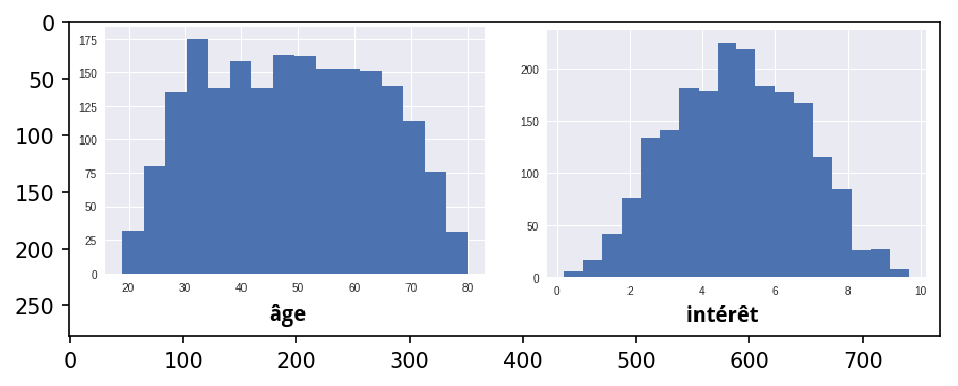

In [111]:
img11=mpimg.imread('age.png')
height, width, _ = img11.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img11)
plt.show()

Ces histogrammes montent que les √¢ges sont assez bien r√©partis sur cet √©chantillon : il y a √† peu pr√®s autant de personnes jeunes que de personnes plus √¢g√©es. Quant au niveau d'int√©r√™t, il y a √©galement autant de personnes qui s'int√©ressent au nouvel album que de personnes qui n'y portent pas d'int√©r√™t.

Bon. C‚Äôest d√©j√† bien de savoir cela, mais nous allons voir que nous pouvons faire beaucoup mieux !

Maintenant, pla√ßons sur un graphique en 2 dimensions les individus de notre √©chantillon. Chaque point de ce graphique repr√©sente une personne. La position de chaque point peut √™tre rep√©r√©e selon 2 axes : l‚Äôaxe des abscisses (horizontal), et l‚Äôaxe des ordonn√©es (vertical). L‚Äôabscisse d‚Äôun point, c‚Äôest un nombre. Si ce nombre est grand, alors ce point sera tr√®s √† droite du graphique, mais s‚Äôil est proche de 0, alors il sera tr√®s √† gauche. C‚Äôest pareil pour l‚Äôordonn√©e du point : si elle est √©lev√©e, le point sera tr√®s haut, mais si elle est proche de 0, le point sera tr√®s bas.

Ici, on place la variable √¢ge en abscisse et celle du niveau d'int√©r√™t en ordonn√©e. Un point qui sera en haut √† droite repr√©sentera donc une personne plut√¥t √¢g√©e tr√®s int√©ress√©e par le nouvel album. Au contraire, un point qui sera en bas √† gauche repr√©sentera une personne jeune n'aimant pas l'album.

En fait, plusieurs cas sont possibles. Voici 2 exemples un peu extr√™mes :

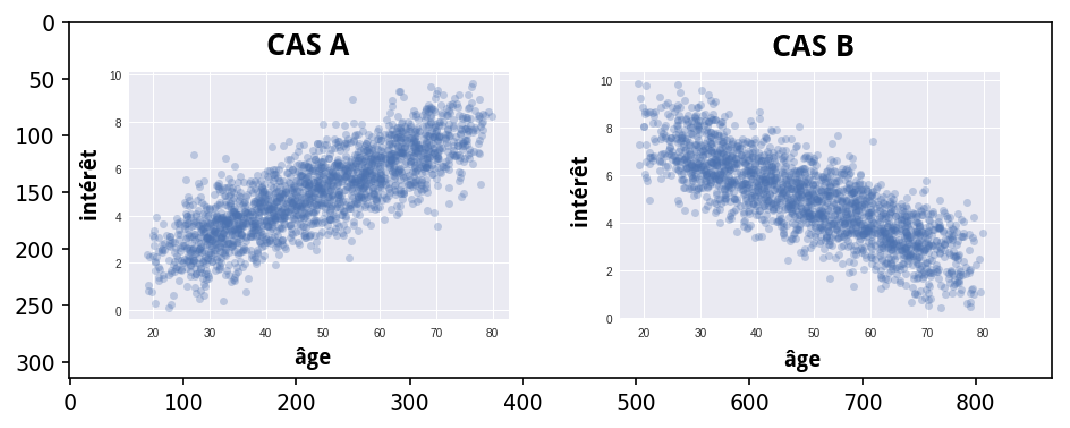

In [112]:
img12=mpimg.imread('age2.png')
height, width, _ = img12.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img12)
plt.show()

Dans le cas A, beaucoup de personnes √¢g√©es aiment ce nouvel album, et beaucoup de personnes jeunes ne l'aiment pas. Ainsi, votre algorithme de recommandation devra conseiller ce nouvel album aux personnes plut√¥t √¢g√©es, et ne pas le recommander aux personnes jeunes (mieux vaudra leur proposer des produits qu'elles sont plus susceptibles d'aimer).

Dans le cas B, c‚Äôest l‚Äôinverse. Il faut conseiller cet album aux personnes jeunes et ne pas le faire pour les personnes √¢g√©es.

Chacun de ces 2 graphiques est appel√© diagramme de dispersion ou scatterplot, en anglais.

Vous l‚Äôaurez compris, on obtient en g√©n√©ral beaucoup plus d‚Äôinformations en √©tudiant les relations entre 2 variables qu‚Äôen √©tudiant s√©par√©ment 2 variables ! Sans l‚Äôanalyse bivari√©e, vous auriez √©t√© incapable de savoir √† qui recommander (ou non) l'album !

Ici, √©tudier la relation entre les 2 variables, c‚Äôest se poser la question suivante : "Sachant qu‚Äôune personne est plut√¥t jeune (ou plut√¥t √¢g√©e), a-t-elle plus de chances d‚Äôaimer ce nouvel album ?"

#### Autre exemple

Un autre exemple : un c√©l√®bre site de formations en ligne publie des cours, dans lesquels les √©tudiants doivent r√©pondre √† des quiz. Pour r√©ussir un quiz, il faut 70 % de r√©ponses correctes. Pour un quiz de 8 questions, il faut donc r√©pondre correctement √† au moins 6 questions pour r√©ussir.

L‚Äô√©chantillon des √©tudiants ayant r√©pondu au quiz est un √©chantillon √† 8 variables. Elles sont toutes binaires (r√©ponse bonne/r√©ponse fausse). Pour l‚Äôun des quiz du cours intitul√© Initiez-vous √† l‚Äôalg√®bre relationnelle avec SQL, voici ces 8 variables repr√©sent√©es :

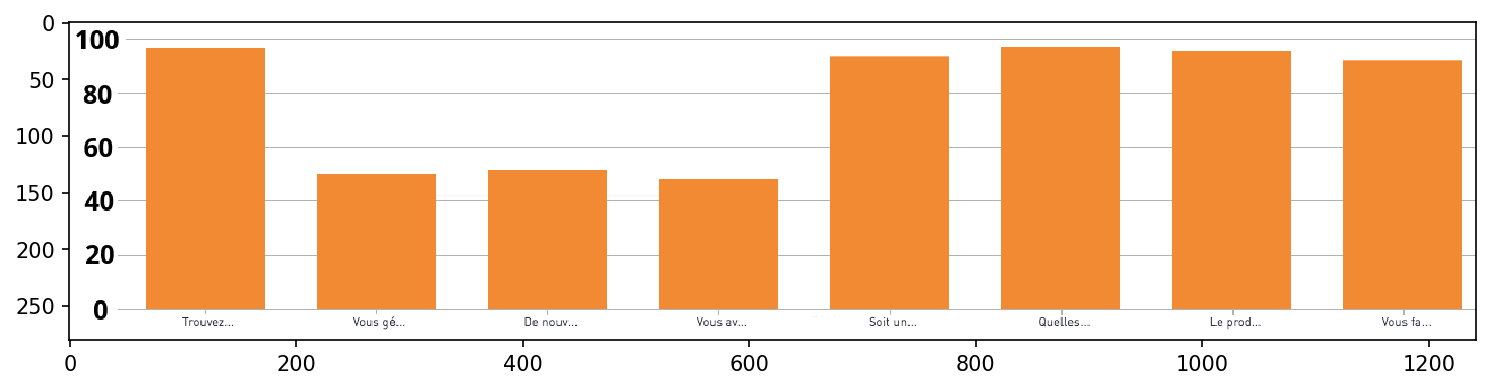

In [113]:
img13=mpimg.imread('questions.png')
height, width, _ = img13.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img13)
plt.show()

Consid√©rons que ces 8 questions sont num√©rot√©es de 1 √† 8, de gauche √† droite.

5 questions sur 8 ont un taux de r√©ussite proche de 100 %. Les 3 autres questions ont un taux de r√©ussite proche de 50 %. Ce graphique montre 8 analyses univari√©es. Mais ici, il nous faudrait √©tudier les relations entre ces variables. En effet, parmi les 50 % d‚Äô√©tudiants qui ont rat√© la question 2, je ne sais pas combien ont r√©ussi la question 3, et c‚Äôest probl√©matique car :

Si les 50 % qui ont rat√© la question 2, les 50 % qui ont rat√© la 3, et les 50 % qui ont rat√© la 4 sont les m√™mes √©tudiants, alors cela signifie que 50 % d‚Äô√©tudiants au total ont rat√© le test (avec chacun 3 r√©ponses fausses). Le taux de r√©ussite globale au test est donc de 50 %, et il faudrait alors simplifier l‚Äô√©nonc√© du quiz.

Si cependant les 50 % qui ont rat√© la question 2 sont tous parmi les 50 % qui ont r√©ussi la question 3, alors ceux-ci auront probablement tous r√©ussi le quiz (quel que soit leur r√©sultat √† la question 4, ils auront presque tous un score global de 6/8 ou 7/8). Ainsi, le taux de r√©ussite globale du quiz sera proche de 100 %, ce qui est un bon taux !

Ici, √©tudier les relations entre les variables, c‚Äôest se demander par exemple : "Sachant qu‚Äôun individu a eu faux √† la question 2, a-t-il de grandes chances d‚Äôavoir r√©pondu faux, ou vrai, √† la question 3 ?"

En r√©sum√©
L'analyse bivari√©e est une analyse men√©e entre deux variables.

Elle permet d'√©tablir des recommandations m√©tier pertinentes sur les individus √† partir de la compr√©hension du comportement d'une variable par rapport √† une autre.

 Commen√ßons l'analyse bivari√©e par la recherche des corr√©lations dans le chapitre suivant ! Vous √™tes pr√™t ?

### Correlation

Vous l‚Äôaurez compris, √©tudier les relations entre les variables, c‚Äôest important.

Pour √™tre plus formel, la notion de relation entre variables est appel√©e corr√©lation. Dire que deux variables sont corr√©l√©es signifie que si on conna√Æt la valeur d‚Äôune variable, alors il est possible d‚Äôavoir une indication (plus ou moins pr√©cise) sur la valeur d‚Äôune autre variable.

Dans le chapitre pr√©c√©dent, on √©tudiait d√©j√† des corr√©lations, en se posant la question : connaissant l'√¢ge d'un individu, peut-on avoir une indication plus pr√©cise de la valeur de la variable "int√©r√™t pour un album donn√©" ?

#### Causalit√©

D√®s que l‚Äôon parle de corr√©lation, il y a une erreur, tr√®s fr√©quente, √† ne JAMAIS commettre : celle de dire qu‚Äôil y a un lien de cause √† effet d‚Äôune variable sur l‚Äôautre.

S‚Äôil y a corr√©lation entre une variable A
 et une variable B
 , est-ce A
 qui est la cause de B
 , ou B
 qui est la cause de A
 ? Il est souvent impossible de le savoir sans effectuer une exp√©rimentation. Le plus souvent, c‚Äôest un troisi√®me (ou plusieurs) facteur C
 (qui n‚Äôest d‚Äôailleurs pas toujours observ√©) qui est la cause de A
 et de B .

Il est aussi possible que 2 variables soient corr√©l√©es sans qu‚Äôil n‚Äôy ait aucun lien entre elles. On les appelle les corr√©lations fallacieuses (spurious correlations, en anglais).

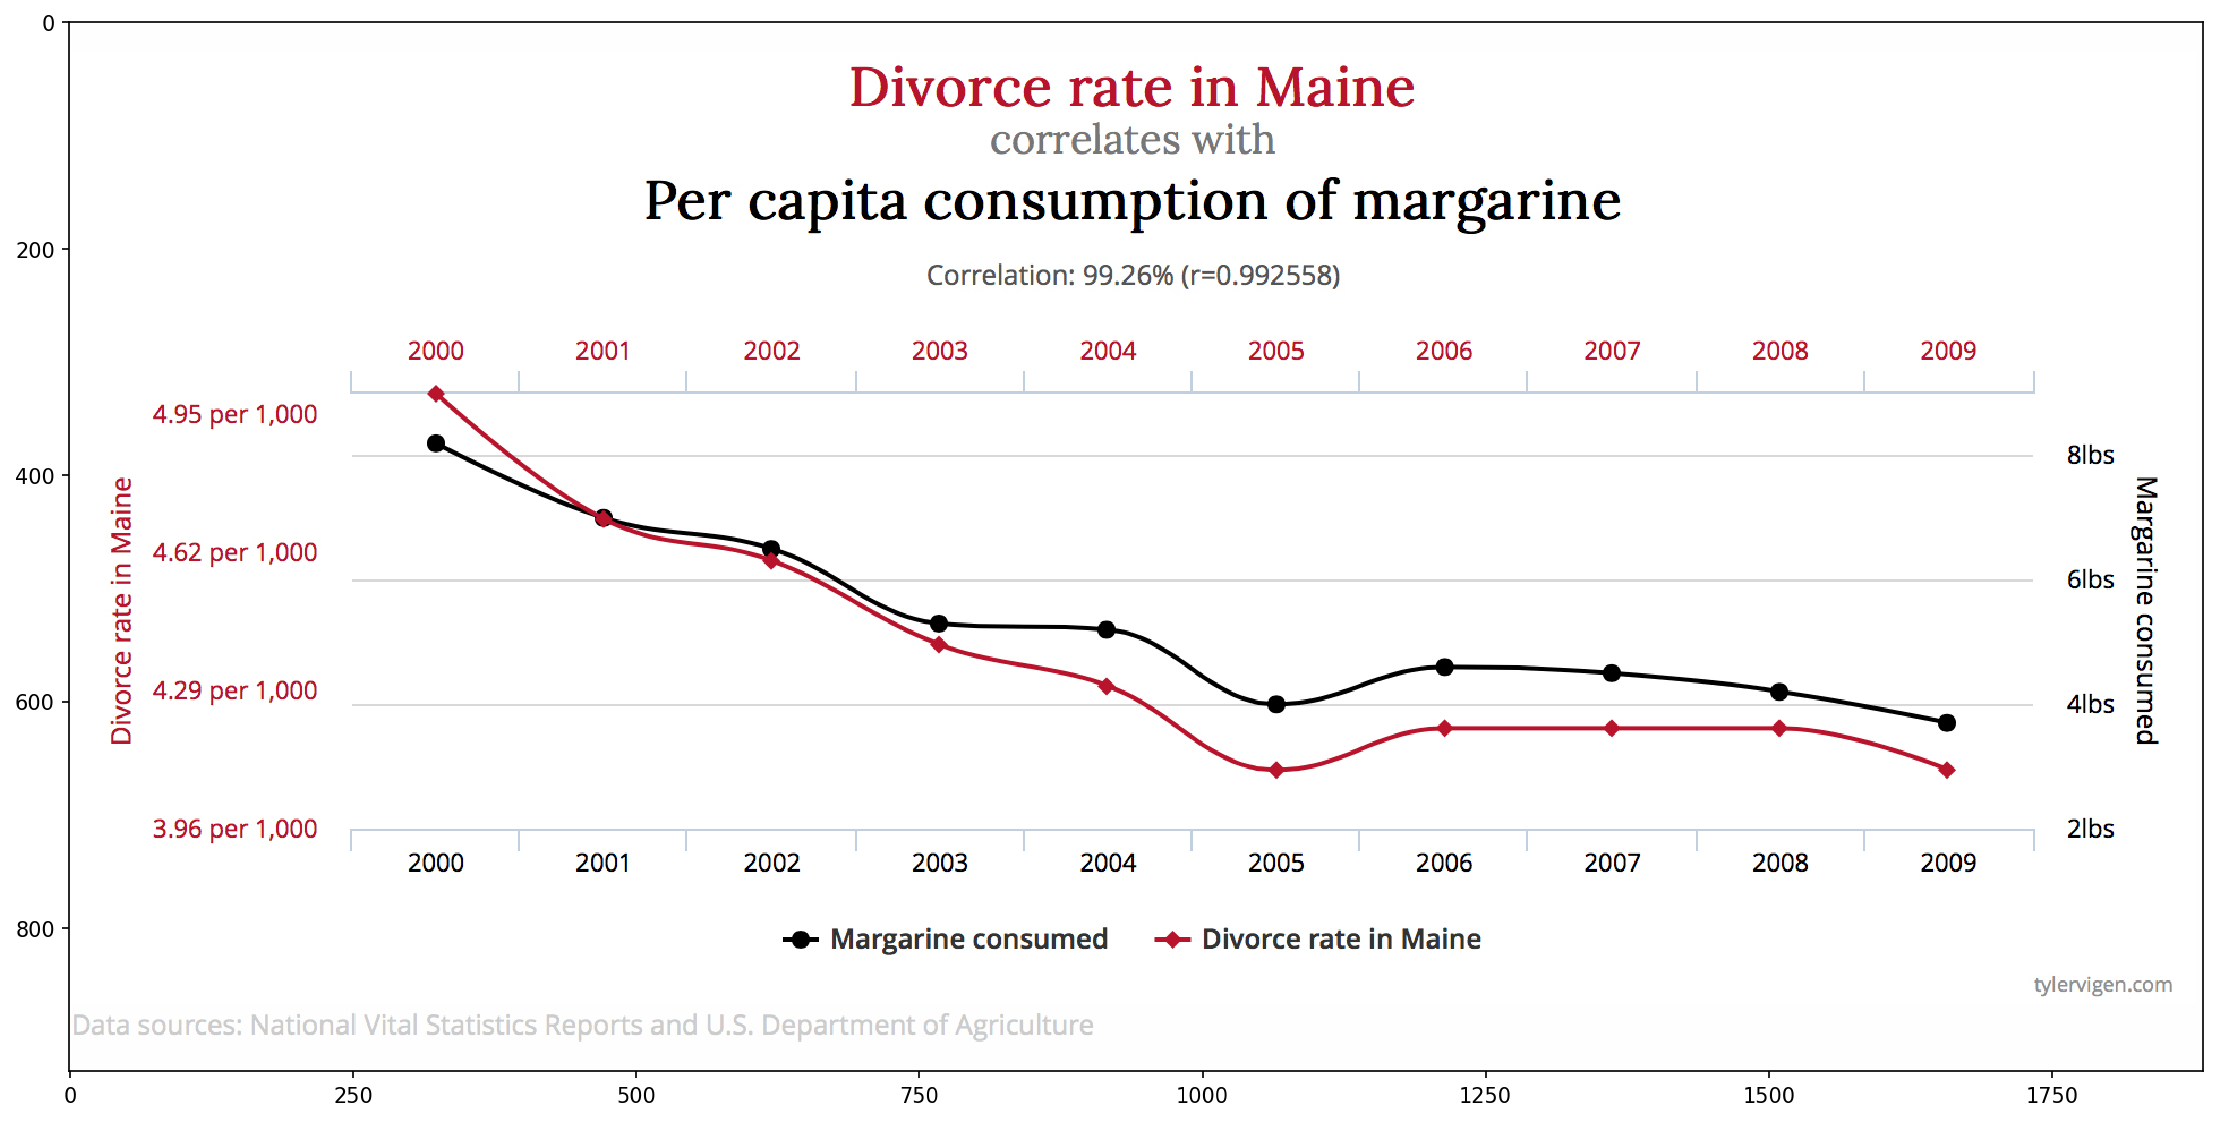

In [114]:
img14=mpimg.imread('corr.jpeg')
height, width, _ = img14.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img14)
plt.show()

Pour en voir d‚Äôautres, rendez-vous sur ce site (en anglais). Certaines sont amusantes !

En fait, pour avoir le droit d‚Äô√©tablir un lien de cause √† effet entre des variables, il faut construire une exp√©rimentation qui respecte certaines conditions. Ces conditions ne sont en g√©n√©ral pas v√©rifi√©es lorsque votre √©chantillon ne provient pas de cette exp√©rimentation con√ßue sp√©cialement.

Si vous aimez les paradoxes math√©matiques, il y en a un qui traite du lien de cause √† effet, c‚Äôest le paradoxe de Simpson. Tout bon Data Analyst devrait √™tre conscient de ce paradoxe. Une vid√©o tr√®s bien expliqu√©e et tr√®s compr√©hensible a √©t√© r√©alis√©e par la superbe cha√Æne YouTube Science √âtonnante.

√Ä la minute 7:58 de cette vid√©o, vous apprendrez par exemple que si 2 variables sont corr√©l√©es, agir sur la valeur de l'une des variables ne fait pas forc√©ment changer la seconde. ;)

Vous verrez, ce paradoxe vous bluffera !

Comme souvent dans ce cours, je vais une fois de plus faire appel √† votre imagination. Il est toujours bon d‚Äôavoir de l‚Äôimagination.

Aujourd‚Äôhui, il vous prend la soudaine envie de faire des statistiques sur les habitants de votre ville. Vous souhaitez conna√Ætre leur boisson pr√©f√©r√©e parmi celles-ci : caf√©, th√©, eau, ou autre.

Vous r√©alisez donc votre enqu√™te en vous rendant dans les caf√©s pour observer discr√®tement les clients et noter la boisson qu‚Äôils ont command√©e. Vous souhaitez rassembler un √©chantillon de 100 personnes. Pour chacune d‚Äôelle, vous avez not√© la boisson command√©e et le nom du caf√© dans lequel vous l‚Äôavez observ√©e. On appellera ces deux variables nom caf√© et boisson pr√©f√©r√©e. Voici la distribution que vous obtenez pour la variable boisson pr√©f√©r√©e :

caf√© : 50 personnes sur 100, soit fcafe
 = 50 % ;

th√© : 30 personnes sur 100, soit fthe
 = 30 % ;

autres boissons : 20 personnes sur 100, soit fautre
 = 20 %.

Vous continuez votre enqu√™te en vous rendant dans un caf√© o√π il y a 10 clients. Combien de personnes vous attendez-vous √† voir face √† un th√© ?

Intuitivement, vous vous attendez √† trouver 3 personnes qui ont command√© un th√© car vous savez qu‚Äôen g√©n√©ral, 30 % des personnes commandent un th√©. Vous avez donc r√©alis√© le calcul suivant : 30%*10 = 3. De m√™me, vous vous attentez √† voir 5 personnes avec un caf√©, et 2 personnes avec d‚Äôautres boissons.

√Ä votre grande surprise, il y a en fait 9 personnes avec du th√©, et seulement 1 avec un caf√© ! Cela diff√®re beaucoup de ce √† quoi vous vous attentiez : il y a 90 % de personnes qui boivent du th√©. C'est peut-√™tre un hasard, alors vous d√©cidez de revenir r√©guli√®rement pour savoir si ce 90 % se confirme de jour en jour ou pas. Effectivement, ce pourcentage reste √† peu pr√®s constant m√™me apr√®s de nombreuses observations !

Mais vous comprenez vite pourquoi en regardant le nom du caf√© : "Salon de th√© Chez Luc". Vous √™tes dans un caf√© un peu sp√©cial : c‚Äôest un salon de th√© ! Les clients qui fr√©quentent cet endroit sont donc principalement des amateurs de th√©.

On dit alors que le fait d‚Äôaimer le th√© et le fait de fr√©quenter le salon de th√© Chez Luc ne sont pas ind√©pendants. Si deux √©v√©nements ne sont pas ind√©pendants, alors on s‚Äôattend √† trouver une corr√©lation entre ceux-ci. Vous souvenez-vous de la question que l'on se pose pour les corr√©lations : Sachant que l'on conna√Æt la valeur d'une variable, peut-on avoir une indication un peu plus pr√©cise sur la valeur d'une autre variable ?

Sachant qu‚Äôune personne fr√©quente le caf√© Salon de th√© Chez Luc, peut-on avoir une indication un peu plus pr√©cise sur sa boisson pr√©f√©r√©e ?

La r√©ponse est oui ! Sans conna√Ætre la valeur de la variable nom caf√©, alors on suppose que la variable boisson pr√©f√©r√©e suivra cette distribution : 50 % pour le caf√©, 30 % pour le th√© et 20 % pour les autres boissons. MAIS, si on conna√Æt la valeur de la variable nom caf√© (ici : Salon de th√© Chez Luc), alors on peut avoir une meilleure indication sur la variable boisson pr√©f√©r√©e ; ici on s'attendra √† trouver bien plus que 30%*10=3 personnes devant une tasse de th√©.

Appelons I
 l'√©v√©nement "pr√©f√©rer le th√©" et J
 l'√©v√©nement "√™tre au salon de th√© Chez Luc". Voici ce qu'il faut retenir :

Si deux √©v√©nements I
 et J
 sont ind√©pendants, alors on s'attend √† ce que le nombre d'individus qui satisfont √† la fois I
 et J
 (appelons ce nombre nij
 ) soit √©gal √† fi‚àónj
 (c'est le calcul que vous aviez fait en entrant dans le bar : 30%*10=3). Au contraire, plus nij
 sera diff√©rent de fi‚àónj
 , plus on aura de raison de penser que I
 et J
 ne sont pas ind√©pendants.

Quand vous avez vu que nab
 √©tait en fait √©gal √† 9, vous vous √™tes dit que le fait d'√™tre au salon de th√© Chez Luc n'√©tait pas ind√©pendant du fait d'aimer le th√©

#### Tableau en contingence

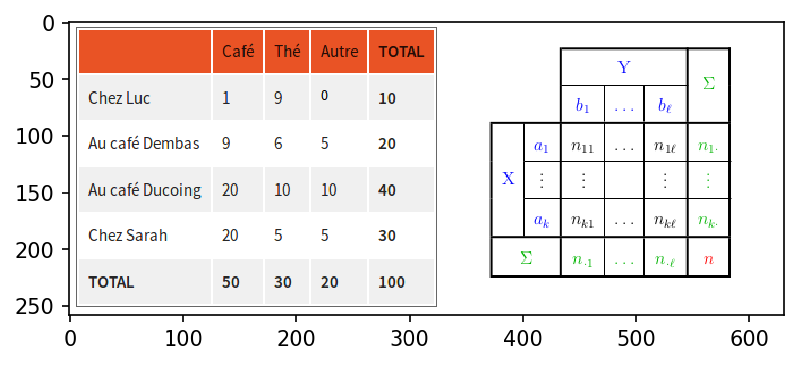

In [115]:
img15=mpimg.imread('cont.png')
height, width, _ = img15.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img15)
plt.show()

Chacune des valeurs du tableau de contingence (hors colonnes TOTAL) est appel√©e effectif conjoint nij
 .

L'ensemble effectifs conjoints est appel√© distribution conjointe empirique de (nom caf√©, boisson pr√©f√©r√©e).

La derni√®re ligne (TOTAL) est appel√©e distribution marginale empirique de boisson pr√©f√©r√©e, et la derni√®re colonne (TOTAL) est appel√©e distribution marginale empirique de nom caf√©.

L'ensemble des effectifs conjoints de la premi√®re ligne (Chez Luc) est appel√© distribution conditionnelle empirique de boisson pr√©f√©r√©e √©tant donn√© que nom caf√© = Chez Luc.


**Jusqu'√† maintenant, nous avons vu 2 mani√®res de pr√©senter des donn√©es en analyse bivari√©e : le diagramme de dispersion (scatterplot), et le tableau de contingence.**

**La premi√®re est adapt√©e quand les 2 variables sont quantitatives, et la seconde est adapt√©e quand les 2 variables sont qualitatives.**

### Repr√©sentez la relation entre deux variables quantitatives

#### Le diagramme de dispersion

Posons-nous la question suivante :

√ätes-vous moins d√©pensier lorsque vous avez peu d'argent sur votre compte ?

Vous l'aurez devin√©, les 2 variables √† √©tudier sont : montant et solde_avt_operation. Rechercher une corr√©lation entre ces variables revient √† dire : "Sachant que le solde de votre compte est petit, peut-on s'attendre √† ce que le montant de l'op√©ration soit lui aussi petit ?" (ou l'inverse).

Je vous invite donc √† tracer le diagramme de dispersion entre le solde avant op√©ration et le montant des d√©penses, et analyser ce qui en ressort.

Si vous avez correctement r√©ussi √† tracer le graphique (pas de panique si ce n'est pas le cas : vous trouverez un exemple de code dans le notebook joint ^^), les points sont assez dispers√©s et nombreux :  il est donc difficile d'y voir tr√®s clair. C'est souvent le cas, lorsque l'on travaille avec des jeux de donn√©es comportant de nombreux individus. Pour rem√©dier √† cela, il existe une repr√©sentation qui peut s'av√©rer plus ad√©quate.

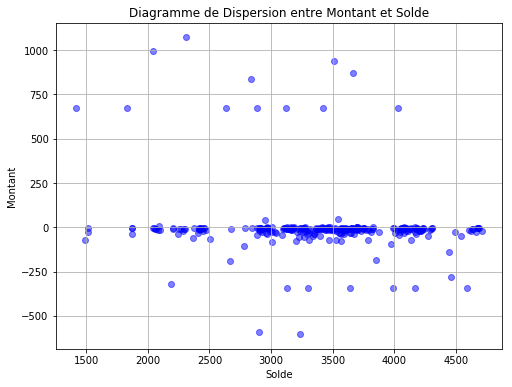

In [117]:
# Supposons que 'data' est votre DataFrame contenant les donn√©es
# Assurez-vous que 'montant' et 'solde' sont des colonnes dans votre DataFrame

plt.figure(figsize=(8, 6))  # D√©finit la taille de la figure (facultatif)

# Tracer le scatterplot
plt.scatter(data['solde_avt_ope'], data['montant'], alpha=0.3, color='blue')

# Ajouter des labels et un titre
plt.ylabel('Montant')
plt.xlabel('Solde')
plt.title('Diagramme de Dispersion entre Montant et Solde')

# Afficher la grille (facultatif)
plt.grid(True)

# Afficher le plot
plt.show()


Pour tracer un diagramme de dispersion (scatterplot) entre deux variables, telles que 'montant' et 'solde', vous pouvez utiliser Python avec la biblioth√®que matplotlib. Voici comment proc√©der :

Assurez-vous d'avoir import√© les biblioth√®ques n√©cessaires :

```python
import matplotlib.pyplot as plt
import pandas as pd
```

Supposons que vous avez un DataFrame appel√© `data` qui contient vos donn√©es, et vous voulez tracer un scatterplot entre les colonnes 'montant' et 'solde'. Voici le code pour cela :

```python
# Supposons que 'data' est votre DataFrame contenant les donn√©es
# Assurez-vous que 'montant' et 'solde' sont des colonnes dans votre DataFrame

plt.figure(figsize=(8, 6))  # D√©finit la taille de la figure (facultatif)

# Tracer le scatterplot
plt.scatter(data['montant'], data['solde'], alpha=0.5, color='blue')

# Ajouter des labels et un titre
plt.xlabel('Montant')
plt.ylabel('Solde')
plt.title('Diagramme de Dispersion entre Montant et Solde')

# Afficher la grille (facultatif)
plt.grid(True)

# Afficher le plot
plt.show()
```

#### Explication du code :

1. **Import des biblioth√®ques :**
   - `matplotlib.pyplot` est utilis√© pour tracer des graphiques.
   - `pandas` est utilis√© pour g√©rer les donn√©es sous forme de DataFrame.

2. **D√©finition de la figure :**
   ```python
   plt.figure(figsize=(8, 6))
   ```
   - D√©finit la taille de la figure du graphique. Cette ligne est facultative et peut √™tre ajust√©e selon vos besoins.

3. **Trac√© du scatterplot :**
   ```python
   plt.scatter(data['montant'], data['solde'], alpha=0.5, color='blue')
   ```
   - `plt.scatter()` trace le diagramme de dispersion. `data['montant']` et `data['solde']` sont les variables que vous voulez comparer.
   - `alpha=0.5` d√©finit la transparence des points (0 = transparent, 1 = opaque).
   - `color='blue'` d√©finit la couleur des points du scatterplot.

4. **Ajout de labels et de titre :**
   ```python
   plt.xlabel('Montant')
   plt.ylabel('Solde')
   plt.title('Diagramme de Dispersion entre Montant et Solde')
   ```
   - `plt.xlabel()` et `plt.ylabel()` ajoutent des labels aux axes x et y respectivement.
   - `plt.title()` ajoute un titre au graphique.

5. **Affichage de la grille :**
   ```python
   plt.grid(True)
   ```
   - `plt.grid(True)` ajoute une grille au graphique. Cette ligne est facultative.

6. **Affichage du plot :**
   ```python
   plt.show()
   ```
   - `plt.show()` affiche le graphique.

En utilisant ce code, vous pouvez visualiser le diagramme de dispersion entre les variables 'montant' et 'solde' de votre DataFrame `data`. Assurez-vous que vos donn√©es sont correctement charg√©es dans `data` et que les noms de colonnes ('montant' et 'solde') correspondent √† vos donn√©es r√©elles.

#### Une alternative au diagramme de dispersion

Pour d√©couper la variable quantitative 'solde' en 7 tranches et cr√©er un boxplot pour la variable 'montant' pour chaque tranche, vous pouvez suivre ces √©tapes en utilisant Python avec les biblioth√®ques matplotlib et pandas :

Assurez-vous d'avoir import√© les biblioth√®ques n√©cessaires :

```python
import matplotlib.pyplot as plt
import pandas as pd
```

Supposons que vous avez un DataFrame appel√© `data` qui contient vos donn√©es, avec les colonnes 'montant' et 'solde'. Voici comment proc√©der :

### D√©couper 'solde' en 7 tranches (quantiles) :

```python
# Supposons que 'data' est votre DataFrame contenant les donn√©es
# Assurez-vous que 'solde' est une colonne dans votre DataFrame

# Calcul des quantiles pour d√©couper 'solde' en 7 tranches
data['solde_quantiles'] = pd.qcut(data['solde'], q=7, labels=False)

# q=7 sp√©cifie le nombre de quantiles (tranches) √† cr√©er
# labels=False pour indiquer que nous voulons utiliser des indices num√©riques pour les tranches

# Afficher les quantiles (facultatif)
print(data['solde_quantiles'].unique())
```

### Cr√©er un boxplot pour chaque tranche de 'solde' :

```python
# Tracer un boxplot pour chaque tranche de 'solde'

plt.figure(figsize=(10, 6))  # D√©finit la taille de la figure (facultatif)

# Tracer le boxplot
data.boxplot(column='montant', by='solde_quantiles', figsize=(10, 6))

# Ajouter des labels et un titre
plt.xlabel('Tranches de Solde')
plt.ylabel('Montant')
plt.title('Boxplot de Montant pour chaque Tranche de Solde')

# Afficher le plot
plt.show()
```

### Explication du code :

1. **Calcul des quantiles :**
   ```python
   data['solde_quantiles'] = pd.qcut(data['solde'], q=7, labels=False)
   ```
   - `pd.qcut()` d√©coupe la colonne 'solde' en 7 tranches (quantiles) √©gales.
   - `q=7` sp√©cifie le nombre de tranches.
   - `labels=False` indique que les tranches seront num√©rot√©es de mani√®re s√©quentielle.

2. **Trac√© du boxplot :**
   ```python
   data.boxplot(column='montant', by='solde_quantiles', figsize=(10, 6))
   ```
   - `data.boxplot()` trace un boxplot de la colonne 'montant'.
   - `column='montant'` sp√©cifie la variable pour laquelle le boxplot est trac√©.
   - `by='solde_quantiles'` divise les donn√©es en groupes bas√©s sur les tranches de 'solde_quantiles'.
   - `figsize=(10, 6)` d√©finit la taille du graphique.

3. **Ajout de labels et de titre :**
   ```python
   plt.xlabel('Tranches de Solde')
   plt.ylabel('Montant')
   plt.title('Boxplot de Montant pour chaque Tranche de Solde')
   ```
   - `plt.xlabel()` et `plt.ylabel()` ajoutent des labels aux axes x et y respectivement.
   - `plt.title()` ajoute un titre au graphique.

4. **Affichage du plot :**
   ```python
   plt.show()
   ```
   - `plt.show()` affiche le graphique.

En utilisant ce code, vous pouvez visualiser la distribution du 'montant' pour chaque tranche de 'solde' d√©coup√©e en 7 quantiles. Assurez-vous que vos donn√©es sont correctement charg√©es dans `data` et que les noms de colonnes ('montant' et 'solde') correspondent √† vos donn√©es r√©elles.

In [121]:
# Calcul des quantiles pour d√©couper 'solde' en 7 tranches
data['solde_quantiles'] = pd.qcut(data['solde_avt_ope'], q=7, labels=False)

# Afficher la description statistique de chaque tranche
quantiles_description = data.groupby('solde_quantiles')['solde_avt_ope'].describe()
print(quantiles_description)


                 count         mean         std      min        25%       50%  \
solde_quantiles                                                                 
0                 44.0  2196.643864  304.404241  1416.81  2054.2650  2277.845   
1                 44.0  2960.463636   97.986687  2676.69  2907.0425  2963.705   
2                 44.0  3222.465909   63.947274  3128.23  3170.5900  3222.325   
3                 44.0  3455.564773   62.649358  3351.80  3409.1300  3452.465   
4                 44.0  3637.905455   45.565101  3564.74  3595.9475  3645.170   
5                 44.0  3941.578636  141.929504  3709.28  3793.9775  4000.170   
6                 44.0  4352.485227  209.273342  4121.67  4181.1000  4239.230   

                       75%      max  
solde_quantiles                      
0                2424.0600  2664.21  
1                3010.6925  3127.43  
2                3273.3400  3349.57  
3                3507.9650  3563.87  
4                3676.4075  3708.06  
5   

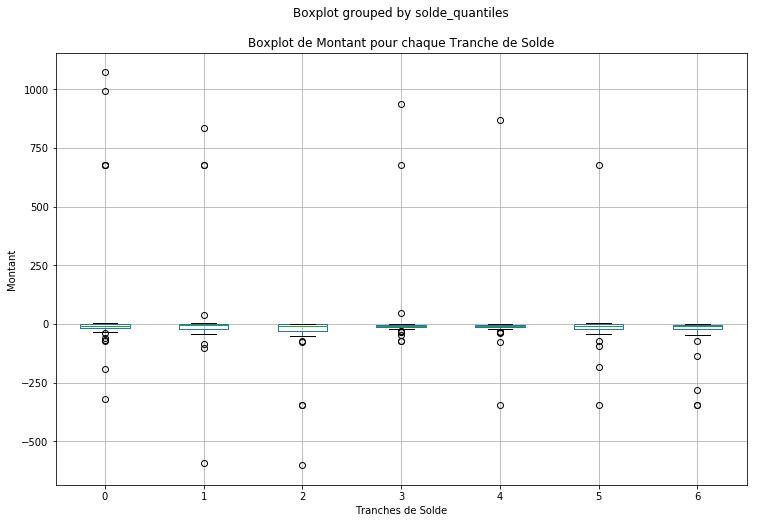

In [131]:
# Charger les donn√©es et calculer les quantiles si n√©cessaire
# Assurez-vous d'avoir 'montant' et 'solde_quantiles' dans votre DataFrame

# Tracer un boxplot pour chaque tranche de 'solde'

# Tracer le boxplot avec figsize sp√©cifi√©
data.boxplot(column='montant', by='solde_quantiles', figsize=(12, 8))

# Ajouter des labels et un titre
plt.xlabel('Tranches de Solde')
plt.ylabel('Montant')
plt.title('Boxplot de Montant pour chaque Tranche de Solde')

# Afficher le plot
plt.show()


In [134]:


# Calculer les quantiles pour d√©couper 'solde' en tranches de 500
data['solde_tranches'] = pd.cut(data['solde_avt_ope'], bins=range(1500, 4501, 500), labels=False)

# Afficher la description statistique de chaque tranche
tranches_description = data.groupby('solde_tranches')['solde_avt_ope'].describe()
print(tranches_description)


                count         mean         std      min        25%      50%  \
solde_tranches                                                                
0.0               6.0  1745.376667  179.407267  1513.81  1594.5925  1850.62   
1.0              33.0  2286.858182  149.776556  2040.36  2191.5800  2305.15   
2.0              34.0  2884.820882  112.509029  2508.62  2886.1000  2916.37   
3.0              89.0  3273.873371  135.494935  3009.16  3163.9300  3268.79   
4.0              78.0  3673.191026  114.809031  3507.94  3589.9975  3657.58   
5.0              53.0  4161.146792  109.846528  4005.47  4078.9200  4143.24   

                      75%      max  
solde_tranches                      
0.0             1869.9400  1871.58  
1.0             2423.5800  2473.41  
2.0             2964.1125  2991.24  
3.0             3397.5700  3494.88  
4.0             3726.3575  3994.87  
5.0             4218.2400  4490.46  


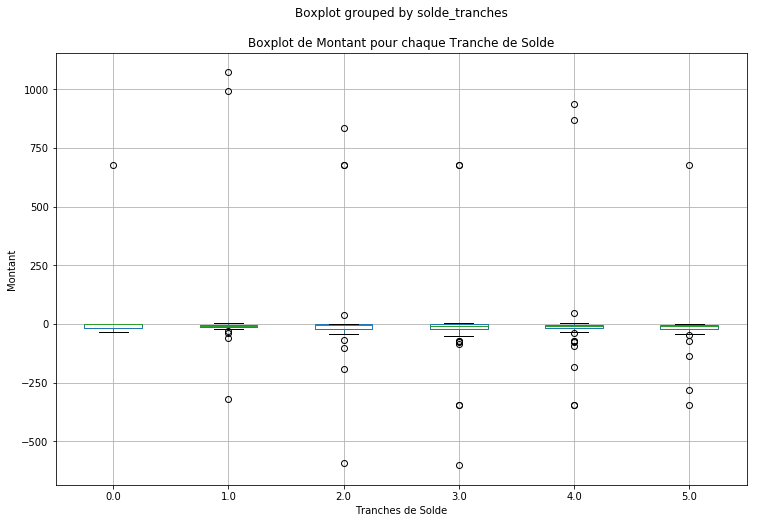

In [135]:
# Charger les donn√©es et calculer les quantiles si n√©cessaire
# Assurez-vous d'avoir 'montant' et 'solde_quantiles' dans votre DataFrame

# Tracer un boxplot pour chaque tranche de 'solde'

# Tracer le boxplot avec figsize sp√©cifi√©
data.boxplot(column='montant', by='solde_tranches', figsize=(12, 8))

# Ajouter des labels et un titre
plt.xlabel('Tranches de Solde')
plt.ylabel('Montant')
plt.title('Boxplot de Montant pour chaque Tranche de Solde')

# Afficher le plot
plt.show()


#### REDO

Text(0,0.5,'montant de d√©pense')

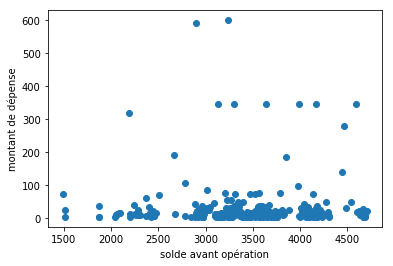

In [140]:
depenses=data[data.montant<0]#on stocke dans d√©pense les individus dans data n√©gatifs 
plt.plot(depenses['solde_avt_ope'],-depenses['montant'],'o')#on construit le graphe
plt.xlabel("solde avant op√©ration")
plt.ylabel("montant de d√©pense")

In [149]:
taille_classe = 500 # taille des classes pour la discr√©tisation

groupes = [] # va recevoir les donn√©es agr√©g√©es √† afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on d√©cale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde √† son num√©ro de classe

numpy.arange([start, ]stop, [step, ]dtype=None, *, device=None, like=None)
Return evenly spaced values within a given interval.

arange can be called with a varying number of positional arguments:

arange(stop): Values are generated within the half-open interval [0, stop) (in other words, the interval including start but excluding stop).

arange(start, stop): Values are generated within the half-open interval [start, stop).

arange(start, stop, step) Values are generated within the half-open interval [start, stop), with spacing between values given by step.

For integer arguments the function is roughly equivalent to the Python built-in range, but returns an ndarray rather than a range instance.

When using a non-integer step, such as 0.1, it is often better to use numpy.linspace.

See the Warning sections below for more information.

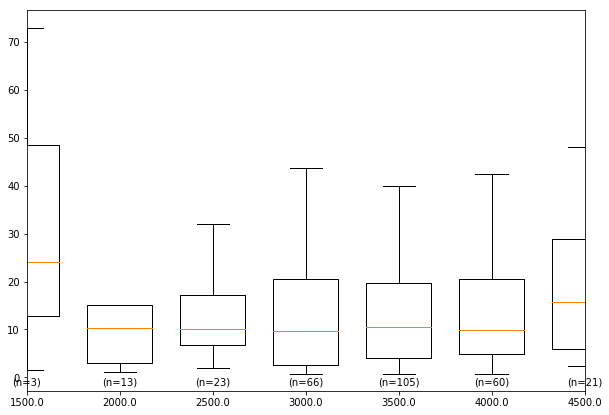

In [150]:
for ind, tr in enumerate(tranches): # pour chaque tranche, ind re√ßoit le num√©ro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # s√©lection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

Pour calculer le coefficient de Pearson et la covariance, 2 lignes suffisent !

In [156]:
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])
data['montant'].corr(data['solde_avt_ope'], method='pearson')

484.959541545


-0.16728549695360867



C'est bien beau les graphiques, mais je sens que vous √™tes en manque de calcul ! Il nous faut un indicateur num√©rique qui puisse nous dire si les variables sont corr√©l√©es ou pas.

Ici, on veut savoir si quand on a un solde $X$ petit, on a aussi un montant $Y$ petit. Mais petit par rapport √† quoi ? Ici, quand on dit "petit", c'est par rapport aux autres valeurs, donc on veut dire "plus petit que la moyenne". Prenons une op√©ration bancaire (= un individu) au hasard, et notons $x$ la valeur du solde avant op√©ration, et $y$ le montant de l'op√©ration. Pour mesurer si $x$ est plus petit que la moyenne $\overline{x}$, on peut calculer :

$[ x - \overline{x} ]$

Cette quantit√© sera n√©gative si $x$ est inf√©rieur √† $\overline{x}$, et positive dans le cas contraire. De m√™me, on peut calculer $(y - \overline{y})$ pour comparer $y$ √† la moyenne $\overline{y}$. Maintenant, multiplions-les !

$a = (x - \overline{x})(y - \overline{y}) $

Si $x$ est plus petit que la moyenne et que $y$ est plus petit que la moyenne, alors les deux termes seront n√©gatifs. Quand on multiplie deux nombres n√©gatifs, on obtient un nombre positif. C'est aussi valable dans l'autre sens : si $x$ est sup√©rieur √† la moyenne et $y$ aussi, alors $a$ sera aussi un nombre positif.

OK, avec cette multiplication, on obtient la quantit√© $a$ pour une seule op√©ration bancaire (un seul individu). Mais si les montants sont vraiment petits quand le solde est petit (et inversement), alors les $a$ de toutes les op√©rations seront positifs ! Et si on fait la moyenne de tous ces $a$, alors on obtiendra encore un nombre positif. La moyenne de tous ces $a$ s'√©crit comme ceci :

$s_{X,Y} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y}) $

Au contraire, s'il n'y a pas de corr√©lation entre le solde et le montant, alors quand $x$ sera petit, $y$ ne sera pas forc√©ment petit. $y$ sera parfois petit, parfois grand, donc $(y - \overline{y})$ sera tant√¥t positif, tant√¥t n√©gatif. Ainsi, $a$ sera elle aussi tant√¥t positive, tant√¥t n√©gative. Au final, la moyenne de tous les $a$ sera proche de 0.

R√©sumons : Si $x$ est petit quand $y$ est petit (et inversement), alors $s_{X,Y}$ sera positif. Si $X$ et $Y$ ne sont au contraire pas corr√©l√©s, $s_{X,Y}$ sera plut√¥t proche de 0. Pour les motiv√©s, vous pouvez aussi d√©duire que si $x$ est grand quand $y$ est petit (et inversement), alors $s_{X,Y}$ sera n√©gatif. Dans ce dernier cas, il y a corr√©lation certes, mais on dit que c'est une corr√©lation n√©gative.



#### La covariance empirique et le coefficient de corr√©lation

Voici le texte modifi√© avec les notations en dollar pour Jupyter Notebook :

---

Devinez quoi ! L'indicateur que nous venons de construire est tr√®s utilis√© en statistiques ; il s'appelle la **covariance empirique de $X$ et $Y$**. Ce terme vous rappelle la variance empirique ? C'est normal : elles sont similaires. Effectivement, si vous calculez la covariance empirique de $X$ et $X$, vous retombez sur la formule de la variance empirique de $X$, qui s'√©crit :

$s^2_X = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline{x})^2 $

Magique !

Tr√®s rapidement, voici deux propri√©t√©s de la covariance empirique :

1. $ s_{X,Y} = s_{Y,X} $. C'est la propri√©t√© de sym√©trie.
2. Si on cr√©e une nouvelle variable $Z$ √† partir de 2 variables $U$ et $V$ dont on conna√Æt la covariance empirique, et que $Z = aU + bV$, alors $ s_{X,Z} = a s_{X,U} + b s_{X,V} $. C'est la propri√©t√© de bilin√©arit√©.

Pour ramener la covariance empirique √† une valeur qui soit comprise entre -1 et 1, alors on peut la diviser par le produit des √©carts-types. Cette normalisation nous permet de faire des comparaisons. Ce qui nous donne :

$ r_{X,Y} = \frac{s_{X,Y}}{s_X s_Y} $

Ce coefficient $r$ est appel√© **coefficient de corr√©lation**, ou **coefficient de corr√©lation lin√©aire**, ou encore **coefficient de corr√©lation de Pearson**.

Pourquoi "lin√©aire" ?

Parce que malheureusement, il ne d√©tecte les relations que lorsqu'elles sont lin√©aires, c'est-√†-dire lorsque les points sont plut√¥t bien align√©s sur une ligne droite. Sur le graphique ci-dessous, les deux sch√©mas du haut montrent des points bien align√©s : leur $r$ est donc proche de 1 ou de -1. Sur le 4e graphique en revanche, il n'y a pas vraiment de corr√©lation (conna√Ætre la valeur du $x$ d'un point ne nous donne aucune indication sur la valeur de $y$) : $r$ est donc proche de 0. Cependant sur le 3e graphique, il y a une forte corr√©lation, mais sa forme n'est pas lin√©aire, et $r$ est donc malheureusement proche de 0.

---
---

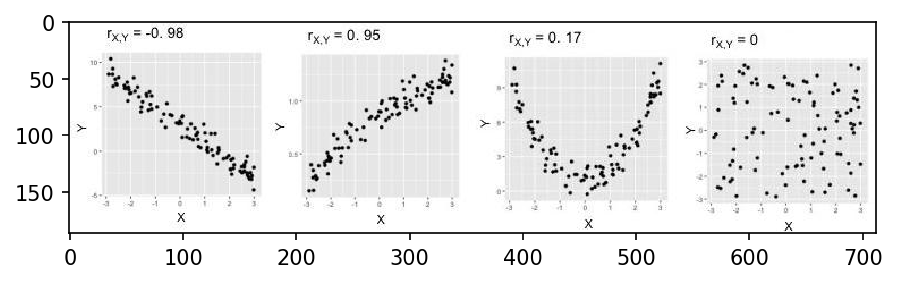

In [157]:
img16=mpimg.imread('corr2.jpeg')
height, width, _ = img16.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img16)
plt.show()

In [158]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])

0.0100688191338
484.959541545


Le coefficient de corr√©lation lin√©aire se calcule gr√¢ce √† la m√©thode  st.pearsonr. On lui donne ensuite les 2 variables √† √©tudier.

Remarquez que dans ce chapitre, on pr√©f√®re ramener les d√©penses en montants positifs, d'o√π le signe  -  devant  depenses["montant"].

Un couple de valeurs est renvoy√©, le coefficient de corr√©lation est la premier √©l√©ment de ce couple, d'o√π le  [0]  √† la fin de la ligne 4.

La m√©thode  np.cov  renvoie la matrice de covariance, que vous n'avez pas √† conna√Ætre √† ce niveau. Cette matrice est en fait un tableau, et dans ce dernier, c'est la valeur situ√©e sur la 2e ligne √† la 1e colonne, d'o√π le  [1,0].

Il est int√©ressant de faire une repr√©sentation graphique pour avoir un aper√ßu visuel d'une corr√©lation.

Le graphique le plus adapt√© dans le cas de deux variables quantitatives est un diagramme de dispersion, qui n'est autre qu'un nuage de points (ou scatter plot, en anglais).

Le coefficient de corr√©lation de Pearson ou coefficient de corr√©lation lin√©aire permet de compl√©ter num√©riquement l'analyse de la corr√©lation.

Ce dernier n'est pertinent que pour √©valuer une relation lin√©aire. Il prend des valeurs entre -1 et 1, et le signe du coefficient indique le sens de la relation.

### Analysez deux variables quantitatives par r√©gression lin√©aire

Nous avons √©tudi√© au chapitre pr√©c√©dent la corr√©lation entre 2 variables quantitatives. Allons un peu plus loin √† pr√©sent avec 2 autres variables √©galement quantitatives : attente et montant.

La variable attente (que nous allons cr√©er tr√®s prochainement) d‚Äôune op√©ration donne le nombre de jours √©coul√©s entre celle-ci et la pr√©c√©dente op√©ration de cat√©gorie COURSES. Si vous faites vos courses tous les 7 jours en moyenne, alors la moyenne de attente sera de 7.

Que s‚Äôattend-on √† trouver ?

En th√©orie, plus vous attendez pour aller faire les courses, plus vous aurez besoin d‚Äôacheter de provisions. On s‚Äôattend donc √† ce que plus la valeur de attente est grande, plus la valeur du montant soit grande.

$ Y = \overline{x} + \epsilon $

In [159]:
import datetime as dt

# Selection du sous-√©chantillon
courses = data[data.categ == "COURSES"]

# On trie les op√©rations par date
courses = courses.sort_values("date_operation")

# On ram√®ne les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les op√©rations qui ont √©t√© effectu√©s √† la m√™me date
# (courses r√©alis√©es le m√™me jour mais dans 2 magasins diff√©rents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant":a, "attente":b})

Ce code permet de cr√©er une nouvelle variable, appel√©e "attente", pour mesurer le nombre de jours √©coul√©s entre deux op√©rations de la cat√©gorie "COURSES". Ensuite, il regroupe les op√©rations effectu√©es le m√™me jour. Voici une explication d√©taill√©e du processus :

1. **S√©lection du sous-√©chantillon :**
   ```python
   courses = data[data.categ == "COURSES"]
   ```
   S√©lectionne uniquement les lignes de donn√©es o√π la cat√©gorie de la transaction est "COURSES".

2. **Tri des op√©rations par date :**
   ```python
   courses = courses.sort_values("date_operation")
   ```
   Trie les transactions par date croissante.

3. **Ram√®ne les montants en positif :**
   ```python
   courses["montant"] = -courses["montant"]
   ```
   Convertit les montants n√©gatifs en positifs, ce qui est courant pour les op√©rations de d√©pense.

4. **Calcul de la variable "attente" :**
   ```python
   r = []
   last_date = dt.datetime.now()
   for i,row in courses.iterrows():
       days = (row["date_operation"]-last_date).days
       if days == 0:
           r.append(r[-1])
       else:
           r.append(days)
       last_date = row["date_operation"]
   courses["attente"] = r
   courses = courses.iloc[1:,]
   ```
   - Initialise une liste `r` pour stocker les valeurs d'attente.
   - `last_date` est initialis√© √† la date et l'heure actuelles.
   - Pour chaque ligne de la DataFrame tri√©e :
     - Calcule la diff√©rence en jours entre la date de l'op√©ration actuelle (`row["date_operation"]`) et `last_date`.
     - Si la diff√©rence est de 0 jours (c'est-√†-dire que c'est le m√™me jour), utilise la derni√®re valeur d'attente calcul√©e.
     - Sinon, ajoute le nombre de jours calcul√© √† `r`.
     - Met √† jour `last_date` √† la date de l'op√©ration actuelle.
   - Associe la liste `r` √† une nouvelle colonne `attente`.
   - Supprime la premi√®re ligne avec `courses = courses.iloc[1:,]` pour √©liminer la premi√®re ligne, qui pourrait avoir une attente incorrecte.

5. **Regroupement des op√©rations par date :**
   ```python
   a = courses.groupby("date_operation")["montant"].sum()
   b = courses.groupby("date_operation")["attente"].first()
   courses = pd.DataFrame({"montant":a, "attente":b})
   ```
   - Regroupe les transactions par date :
     - `a` contient la somme des montants des transactions pour chaque date.
     - `b` contient la premi√®re valeur d'attente pour chaque date.
   - Cr√©e une nouvelle DataFrame `courses` √† partir des s√©ries `a` et `b`, avec les colonnes "montant" et "attente".

Ce code permet de g√©n√©rer une DataFrame o√π chaque ligne repr√©sente une date d'op√©ration avec le montant total d√©pens√© ce jour-l√† et le nombre de jours √©coul√©s depuis la derni√®re op√©ration "COURSES".

### Mod√©lisons !

Mais nous allons faire mieux que cela : calculer le prix moyen des produits que vous consommez en 1 jour, ainsi que la vitesse √† laquelle vous accumulez du stock dans vos placards ! Pour cela, nous allons utiliser un mod√®le. Vous allez voir, c‚Äôest tr√®s puissant.

Pour le mod√®le que nous allons cr√©er, nous allons faire plusieurs suppositions. Tout d‚Äôabord, nous supposons qu‚Äô√† chaque fois que vous faites les courses, vous achetez 3 types de produits :

Les produits que vous consommerez avant la prochaine fois que vous irez faire les courses (produits alimentaires, d‚Äôhygi√®ne, etc.).

Les produits qui ne seront pas consomm√©s durant la dur√©e de l‚Äô√©tude (la dur√©e de l‚Äô√©tude √©tant la p√©riode entre votre 1er ticket de caisse enregistr√© dans l‚Äô√©chantillon et le dernier) : ce sont vos stocks de long terme (bo√Ætes de conserves, produits surgel√©s, etc.).

Les produits qui ne sont pas des consommables (ex. : une fourchette, une serpilli√®re, etc.), que vous n‚Äôachetez que tr√®s rarement.

Ensuite, nous supposons que vous consommez chaque jour des produits, et que le prix des produits que vous consommez en 1 jour est √† peu pr√®s constant.

Appelons $a$
 le prix moyen des produits consomm√©s en un jour (ceux de type 1), et $b$
 le prix moyen des produits de types 2 et 3 rassembl√©s, que vous achetez √† chaque course. Enfin, appelons $x$
 le nombre de jours que vous avez attendu depuis vos derni√®res courses, et y
 le montant du ticket de caisse.

Quel sera le prix de votre prochain ticket de caisse ?

Il sera √©gal au nombre de jours d‚Äôattente multipli√© par le prix moyen ce que vous consommez en 1 jour. Mais en plus, il faut ajouter le prix moyen des produits de types 2 et 3. Ceci donne cette formule :

$y=a.x+b$

C'est un peu simpliste ton truc, mon prochain ticket ne vaudra pas exactement ce montant. Je ne consomme pas tous les jours exactement la m√™me somme d'argent, et je n'ach√®te pas √† chaque fois la m√™me quantit√© de stock ! Et imagine que j'aie envie de me faire plaisir en m'achetant des produits plus chers !

C'est vrai, c'est simpliste ! Cette √©quation n'est pas exacte. D'ailleurs, vous aurez peut-√™tre remarqu√© qu'il s'agit d'une √©quation d'une droite (rem√©morez-vous les fonctions affines). √âquation de droite signifie que si je prends tous les $x$
 possibles compris entre (par exemple) 0 et 5, puis que je calcule tous leurs $y$
 associ√©s, avant de les placer sur un graphique avec les $x$
 sur l'axe horizontal et les $y$
 sur l'axe vertical, alors tous les points seront parfaitement align√©s ! Essayons donc d'afficher le diagramme de dispersion avec $X = attente$ et $Y = montant$, et regardons si tous les points sont align√©s :

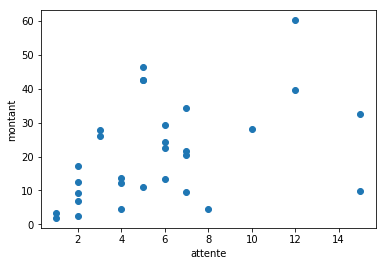

In [160]:
plt.plot(courses['attente'],courses['montant'], "o")
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

Ils sont loin d'√™tre align√©s ! Cela signifie que l'√©quation $y=aÀôx+b$
 n'est pas tout √† fait exacte : elle est simpliste. En √©crivant cette √©quation, j‚Äôadmets que je commettrai une certaine erreur entre la valeur que j'aurai pr√©dite et la vraie valeur du prochain ticket. Mais je peux int√©grer cette erreur √† l'√©quation, en l'appelant $œµ$
 (epsilon) :

$Y=a.X+b+œµ$

Ce mod√®le est l'un des plus utilis√©s en statistiques. C'est la r√©gression lin√©aire.

In [161]:
import statsmodels.api as sm

Y = courses['montant']
X = courses[['attente']]
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carr√©s Ordinaire)
a,b = result.params['attente'],result.params['intercept']

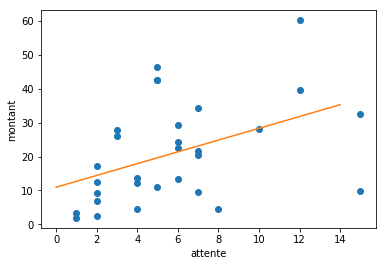

In [162]:
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

R√©gression lin√©aire sans les outliers :

attente      3.030823
intercept    5.411480
dtype: float64


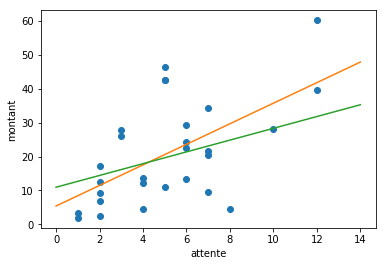

In [163]:
courses = courses.loc[courses['attente'] < 15, :]

Y = courses['montant']
X = courses[['attente']]
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carr√©s Ordinaire)
a_new,b_new = result.params['attente'],result.params['intercept']

print(result.params)

plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a_new*x+b_new for x in np.arange(15)])
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

Ce code effectue une r√©gression lin√©aire entre la variable "attente" et "montant" √† partir des donn√©es contenues dans le DataFrame `courses`. Voici une explication d√©taill√©e ligne par ligne :

1. **Filtrage des donn√©es** :
   ```python
   courses = courses.loc[courses['attente'] < 15, :]
   ```
   Cette ligne filtre le DataFrame `courses` pour inclure uniquement les lignes o√π la variable "attente" est inf√©rieure √† 15 jours.

2. **D√©finition des variables d√©pendante et ind√©pendante** :
   ```python
   Y = courses['montant']
   X = courses[['attente']]
   X['intercept'] = 1.
   ```
   - `Y` : Variable d√©pendante, qui est la colonne "montant" des courses.
   - `X` : Variables ind√©pendantes, qui est la colonne "attente" des courses. Elle est ensuite √©tendue pour inclure une colonne "intercept" qui contient toutes des 1. Cette colonne est n√©cessaire pour estimer l'ordonn√©e √† l'origine dans le mod√®le de r√©gression lin√©aire.

3. **R√©gression lin√©aire avec statsmodels** :
   ```python
   result = sm.OLS(Y, X).fit()
   ```
   - `sm.OLS(Y, X)` : Cr√©e un mod√®le de r√©gression lin√©aire ordinaire (OLS) o√π `Y` est la variable d√©pendante et `X` est la matrice de variables ind√©pendantes.
   - `.fit()` : Estime les coefficients du mod√®le en utilisant la m√©thode des moindres carr√©s ordinaires (OLS).

4. **Extraction des coefficients du mod√®le** :
   ```python
   a_new, b_new = result.params['attente'], result.params['intercept']
   ```
   - `result.params` : Contient les coefficients estim√©s du mod√®le. `'attente'` et `'intercept'` sont les noms des colonnes dans `X` pour lesquelles les coefficients sont estim√©s.

5. **Affichage du r√©sultat de la r√©gression** :
   ```python
   plt.plot(courses.attente, courses.montant, "o")
   ```
   - Trace un nuage de points (diagramme de dispersion) o√π chaque point repr√©sente une observation de "attente" (axe des x) et "montant" (axe des y) dans le DataFrame `courses`.

6. **Trac√© des mod√®les de r√©gression** :
   ```python
   plt.plot(np.arange(15), [a_new * x + b_new for x in np.arange(15)])
   plt.plot(np.arange(15), [a * x + b for x in np.arange(15)])
   ```
   - Trace deux lignes correspondant aux mod√®les de r√©gression :
     - `a_new * x + b_new` : Mod√®le de r√©gression lin√©aire bas√© sur les coefficients estim√©s √† partir des donn√©es filtr√©es.
     - `a * x + b` : Mod√®le de r√©gression lin√©aire bas√© sur les coefficients initiaux, non mis √† jour par le filtrage.

7. **Personnalisation de l'affichage** :
   ```python
   plt.xlabel("attente")
   plt.ylabel("montant")
   plt.show()
   ```
   - Ajoute des √©tiquettes aux axes x et y du graphique, puis affiche le graphique.

En r√©sum√©, ce code utilise la r√©gression lin√©aire pour mod√©liser la relation entre la variable "attente" et "montant" des courses. Il filtre les donn√©es pour exclure les observations o√π "attente" est sup√©rieur ou √©gal √† 15 jours, puis trace un diagramme de dispersion des donn√©es observ√©es avec deux mod√®les de r√©gression lin√©aire superpos√©s pour illustrer la relation entre ces variables.

En d√©but de chapitre, nous avons fait des suppositions. En gros, on a suppos√© qu'il existait un lien lin√©aire entre attente et montant, c'est-√†-dire un lien de type $y=ax+b$
 . Mais cette supposition est-elle r√©aliste ? Apr√®s avoir appliqu√© un mod√®le, il faut toujours analyser sa qualit√©.

Imaginons que j'aie effac√© par erreur le montant d'une op√©ration bancaire de cat√©gorie COURSES.

Je pourrais combler cette valeur manquante par la moyenne des montants des op√©rations. C'est la solution la plus basique qui soit, et vous vous imaginez qu'elle n'est pas tr√®s bonne ! Elle n'est pas tr√®s bonne car autour de la moyenne, les valeurs des montants varient, parfois de beaucoup.

Je peux alors faire mieux : je peux regarder la valeur de la variable attente de cette op√©ration. Avec le mod√®le de r√©gression lin√©aire que j'ai construit, je peux estimer la valeur du montant (gr√¢ce √† l'√©quation y = ax+b). Vous vous en doutez, cette estimation sera meilleure que la pr√©c√©dente. En effet, quand nous avons cherch√© √† minimiser l'erreur de mod√®le, nous avons en fait cherch√© √† minimiser les variations des valeurs de montant autour de la droite de r√©gression.

Les variations autour de la moyenne sont donc plus grandes que les variations autour de la droite de r√©gression.

Si on avait trouv√© un mod√®le parfait, alors il n'y aurait plus d'erreur, et donc plus de variations entre les valeurs pr√©dites et les valeurs r√©elles. Dans ce cas, on dirait que le mod√®le a r√©ussi √† expliquer la totalit√© des variations. Les variations autour de la moyenne sont mesur√©es par la variance. Un mod√®le parfait aurait expliqu√© 100 % de la variation.

Ce pourcentage est calcul√© gr√¢ce √† la formule de d√©composition de la variance (analysis of variance, en anglais : ANOVA).

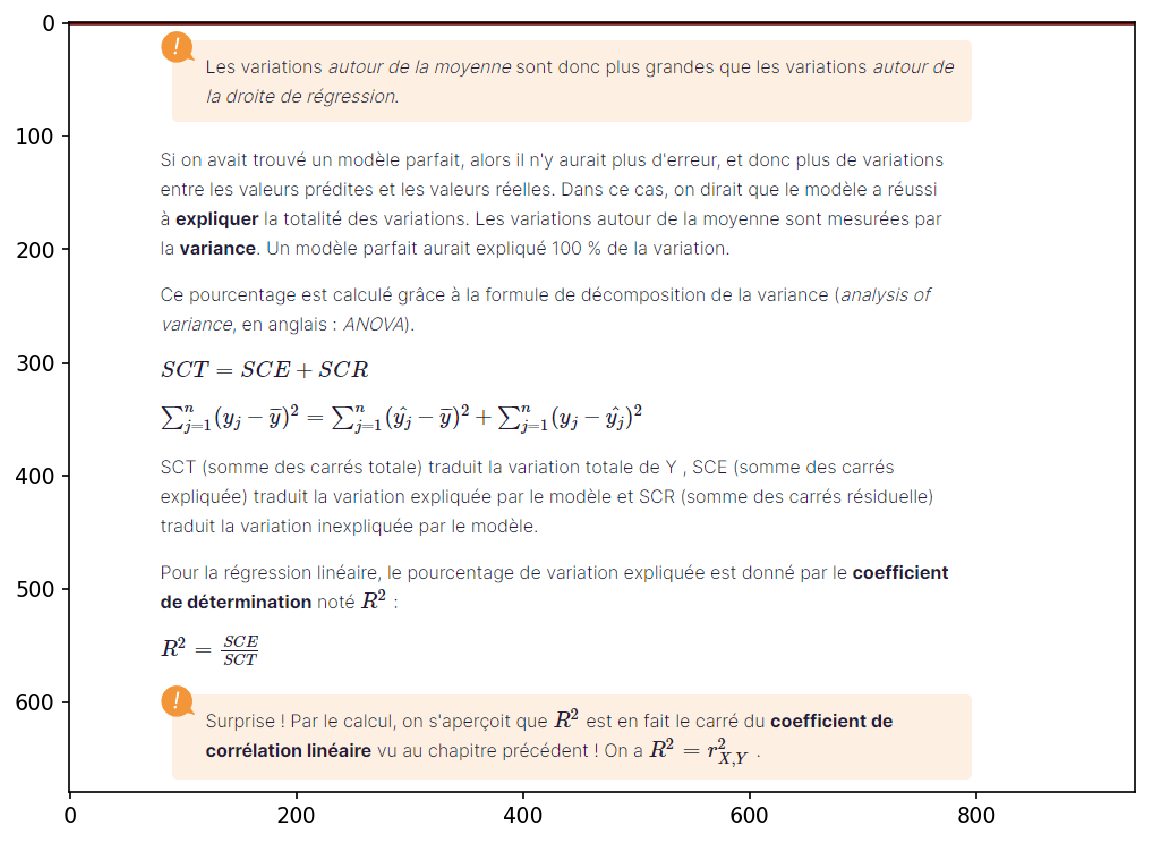

In [164]:
img17=mpimg.imread('corr.png')
height, width, _ = img17.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img17)
plt.show()

Ces r√©sultats signifient que je ne consomme que 1.74 ‚Ç¨ par jour, cela me para√Æt peu ! De plus, 10.94 ‚Ç¨ de stock √† chaque course, c'est √©norme !

C'est vrai... √† y regarder de plus pr√®s, on voit qu'il a 2 points qui "sortent du lot", on les appelle des outliers. En connaissant mes propres habitudes de consommation, je sais que je ne fais jamais les courses √† plus de 15 jours d'intervalle. Ces deux points, pour lesquels attente = 15 jours, correspondent en fait √† des retours de vacances (durant lesquelles je n'ai pas fait de courses). Comme je ne souhaite pas que ceux-ci interf√®rent dans mon calcul, je les √©carte.

Une fois √©cart√©s, j'obtiens ces nouvelles estimations :

  a^=3.03

 b^=5.41

Les 2 droites de r√©gression (une pour chaque estimation) d'√©quation y=ax+b
Les 2 droites de r√©gression (une pour chaque estimation) d'√©quation y=ax+b
Ce r√©sultat est bien diff√©rent du pr√©c√©dent. Avec seulement 2 individus √©cart√©s, les r√©sultats changent beaucoup. On dit donc que le traitement statistique que nous venons d'appliquer (la r√©gression lin√©aire avec estimation par la m√©thode des moindres carr√©s) est peu robuste aux outliers.

 C'est d'ailleurs le cas √©galement du coefficient de corr√©lation lin√©aire rX,Y
 du chapitre pr√©c√©dent : il est peu robuste. En fait, ce n'est pas un hasard s'il l'est lui aussi. En effet, le coefficient de corr√©lation lin√©aire et la r√©gression lin√©aire sont tr√®s li√©s ! Pour d√©couvrir pourquoi, continuez votre lecture par la section ci-dessous ! ;)

### ANOVA

#### BD√©finissez quelles questions se poser

En fonction des couples de variables que nous utiliserons, la m√©thode d'analyse sera la m√™me, mais nous pourrons r√©pondre √† diff√©rentes questions int√©ressantes :

Les d√©penses que vous faites le week-end sont-elles plus grosses qu'en semaine ? (Variables montant et weekend).

Les d√©penses que vous faites en d√©but de mois sont-elles plus grosses qu'en fin de mois ? (montant et quart_mois).

Le montant d'une op√©ration est-il diff√©rent d'une cat√©gorie de d√©pense √† l'autre ? (montant et categ).

Vos paiements en carte bancaire sont-ils toujours petits, et vos virements importants ? (type et montant).

Le solde de votre compte est-il plus petit en fin de mois qu'en d√©but de mois ? (solde_avt_operation et quart_mois).

Voici le code qui permet de repr√©senter une variable quantitative et une variable qualitative. Tout d'abord, cr√©ez le sous-√©chantillon sur lequel vous souhaitez travailler en adaptant ce code, notamment les variables X et Y selon la question que vous aurez choisie parmi celles ci-dessus.

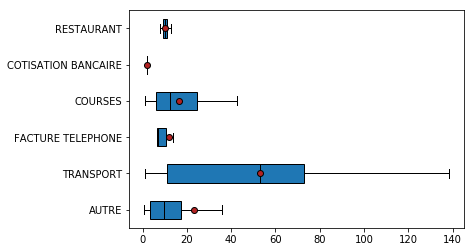

In [166]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les d√©penses
sous_echantillon = data.loc[data["montant"] < 0, :].copy()
# On remet les d√©penses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'√©tudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon.loc[sous_echantillon["categ"] != "LOYER", :] 
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propri√©t√©s graphiques (pas tr√®s importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Les points rouges au milieu de chaque bo√Æte √† moustaches repr√©sentent la moyenne des valeurs.

On voit ici que les montants sont tr√®s diff√©rents d'une cat√©gorie √† l'autre. Par exemple, les montants des d√©penses de transport sont plus √©lev√©s et plus dispers√©s que ceux des factures t√©l√©phoniques. Mais v√©rifions maintenant cette affirmation par les chiffres, gr√¢ce √† une mod√©lisation.

Voici √† pr√©sent le code permettant de calculer $\eta^2$ (eta carr√© ou eta squared, en anglais). Je vous propose ici de faire le calcul √† la main ;) :

In [167]:
X = "categ" # qualitative
Y = "montant" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.0275228003018415

On va aller plus loin en analysant la corr√©lation entre la variable quart_mois cr√©√©e pr√©c√©demment et le montant des achats. En effet, il serait int√©ressant de d√©terminer si certains jours sont plus "propices" √† la d√©pense que d'autres et pourquoi pas, essayer de d√©gager les raisons !

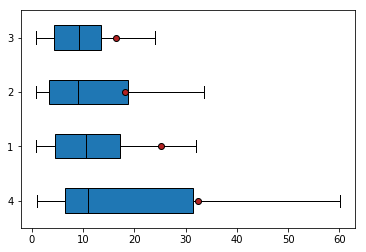

0.011398038009310869

In [168]:
X = "quart_mois" # qualitative
Y = "montant" # quantitative

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propri√©t√©s graphiques (pas tr√®s importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

eta_squared(sous_echantillon[X],sous_echantillon[Y])

Revenons sur la d√©marche que nous avons eue au chapitre pr√©c√©dent. Pour voir s'il existait une corr√©lation (lin√©aire) entre 2 variables, nous avons suppos√© que cette corr√©lation existait, puis nous avons appliqu√© un mod√®le sur cette supposition. Nous avons ensuite estim√© les param√®tres a
 et b
 . Enfin, nous avons v√©rifi√© la supposition de d√©part en √©valuant la qualit√© du mod√®le. Si ce mod√®le est de bonne qualit√©, alors c'est qu'il y a une forte corr√©lation entre X et Y. En bonus, nous avons profit√© de la formule de la r√©gression lin√©aire Y=aX+b+œµ
 pour interpr√©ter a
 comme la somme d'argent consomm√©e en 1 jour, et b
 comme la somme d'argent de vos stocks et produits non consommables.

Ici, nous utiliserons la m√™me d√©marche.

On pourrait reprendre la formule de la r√©gression lin√©aire ci-dessus, sauf qu'elle implique de multiplier X
 par a
 . Or cette fois-ci, X est qualitative, comme notre variable categ. Multiplier une variable qualitative par un nombre n'a aucun sens (ex. : "TRANSPORT" * 3 n'a aucun sens !).

Nous allons faire autrement. Nous allons donc faire la supposition que vos op√©rations bancaires ont un montant de r√©f√©rence en commun appel√© Œº
 . Ensuite, on consid√®re que le montant de l'op√©ration s'ajuste en fonction de la cat√©gorie i
 de d√©pense (loyer, transport, courses, etc.). Si une cat√©gorie a des montants qui sont en g√©n√©ral inf√©rieurs √† Œº
 , alors cet ajustement Œ±i
 sera n√©gatif. Dans le cas contraire, il sera positif. On ajoute la contrainte que la somme de tous les Œ±i
 soit √©gale √† 0.

Par exemple, un loyer est en g√©n√©ral assez on√©reux : son Œ±loyer
 sera donc positif.

Comme au chapitre pr√©c√©dent, tu commettras toujours une erreur de pr√©diction, car au sein d'une m√™me cat√©gorie, les montants ne sont pas tous les m√™mes !

C'est bien vrai. Comme pour le mod√®le de la r√©gression lin√©aire, on aura ici aussi un terme d'erreur œµ
 :

Y=Œ±i+Œº+œµ

Comme dans le chapitre pr√©c√©dent, on peut laisser l'ordinateur estimer tous les Œ±i
 et Œº
 , sauf qu'ici, les calculs math√©matiques qui nous disent quels sont les Œ±i
 et Œº
 qui minimisent l'erreur œµ
 donnent des r√©sultats tr√®s intuitifs :

Le montant de r√©f√©rence Œº
 est estim√© par la moyenne de tous les montants. On appelle cette estimation Œº^

Pour une cat√©gorie i
 , Œ±i
 est estim√© en calculant l'√©cart entre Œº^
 et la moyenne yi¬Ø¬Ø¬Ø¬Ø
 des montants de la cat√©gorie i
 , c'est-√†-dire : Œ±i^=yi¬Ø¬Ø¬Ø¬Ø‚àíŒº^

Ce mod√®le est tr√®s utilis√© en statistiques inf√©rentielles, et est appel√© analyse de la variance, en anglais ANalysis Of VAriance (ANOVA).

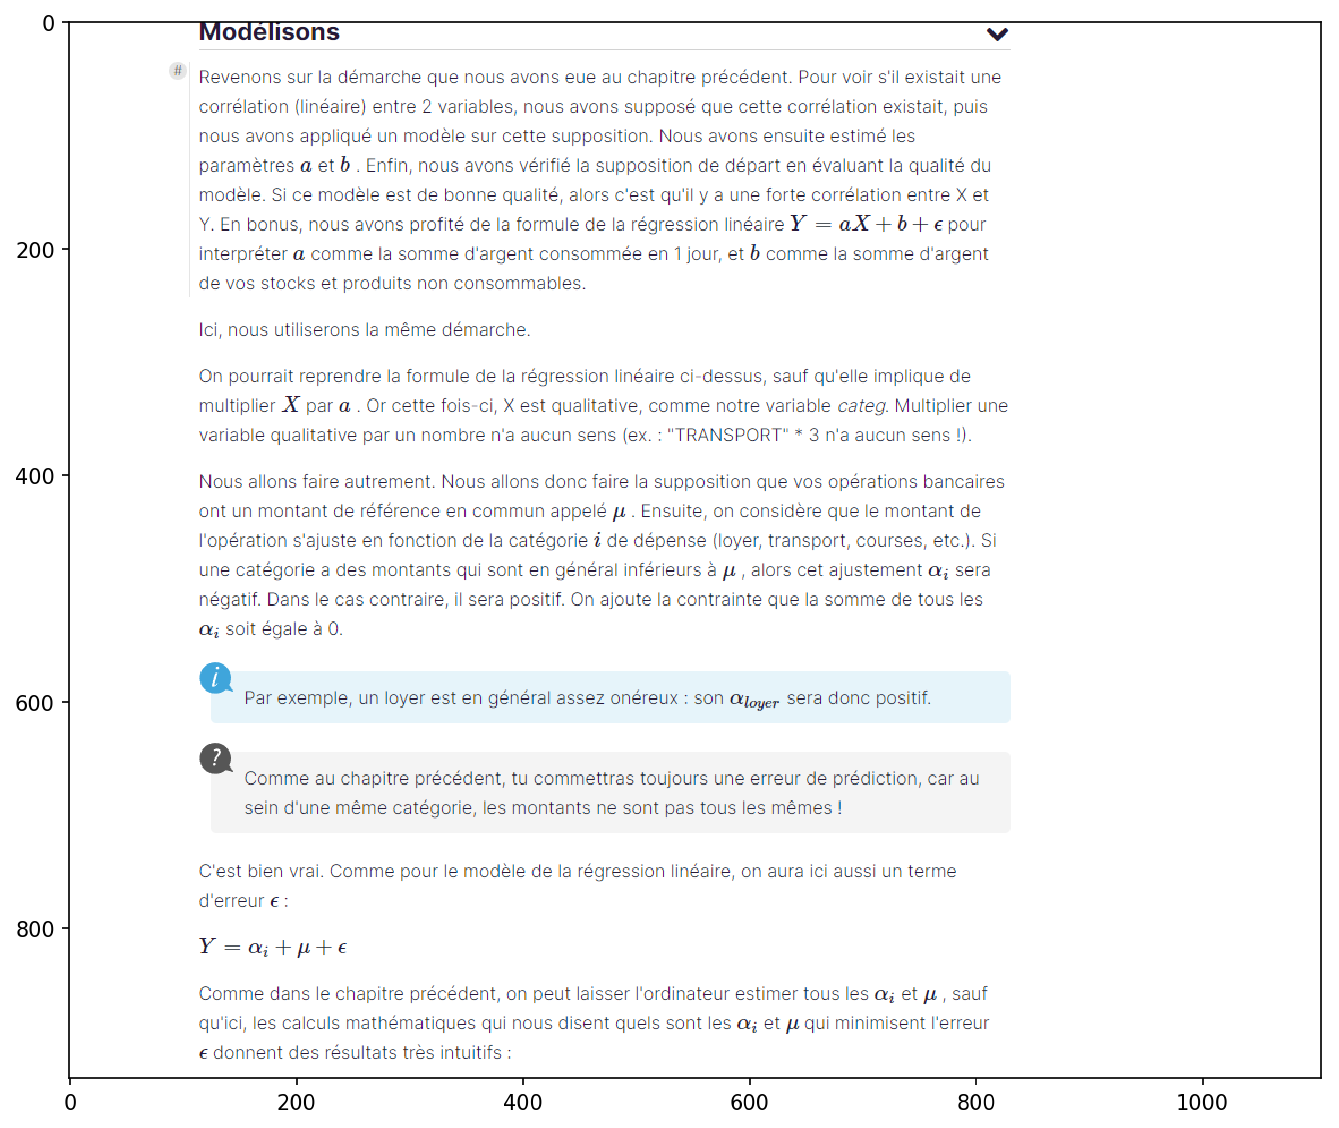

In [169]:
img18=mpimg.imread('ano1.png')
height, width, _ = img18.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img18)
plt.show()

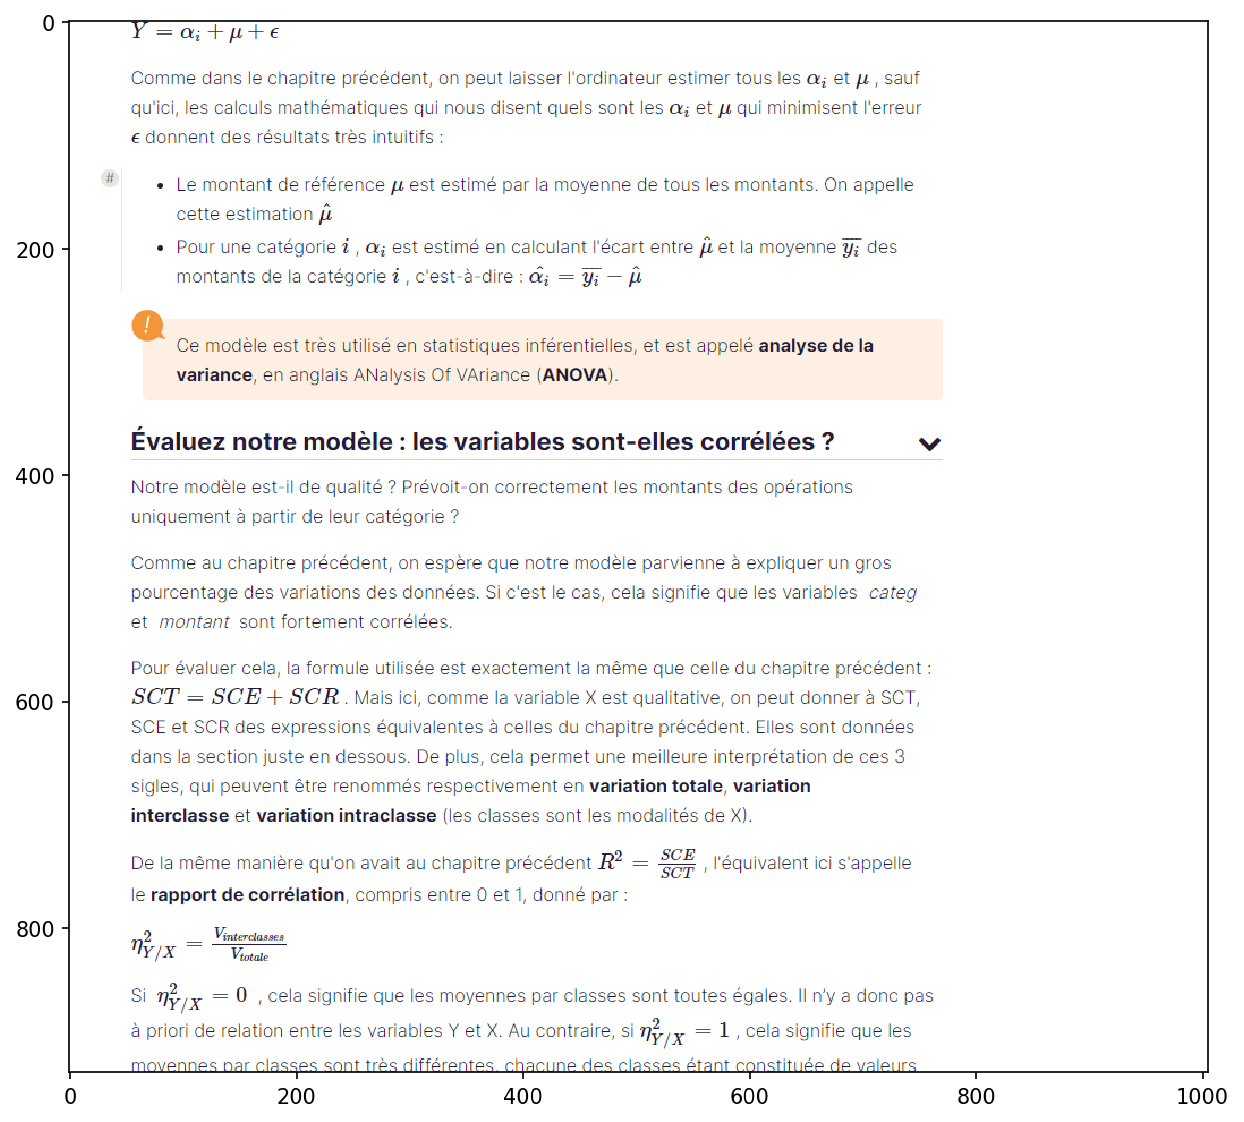

In [170]:
img19=mpimg.imread('ano2.png')
height, width, _ = img19.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img19)
plt.show()

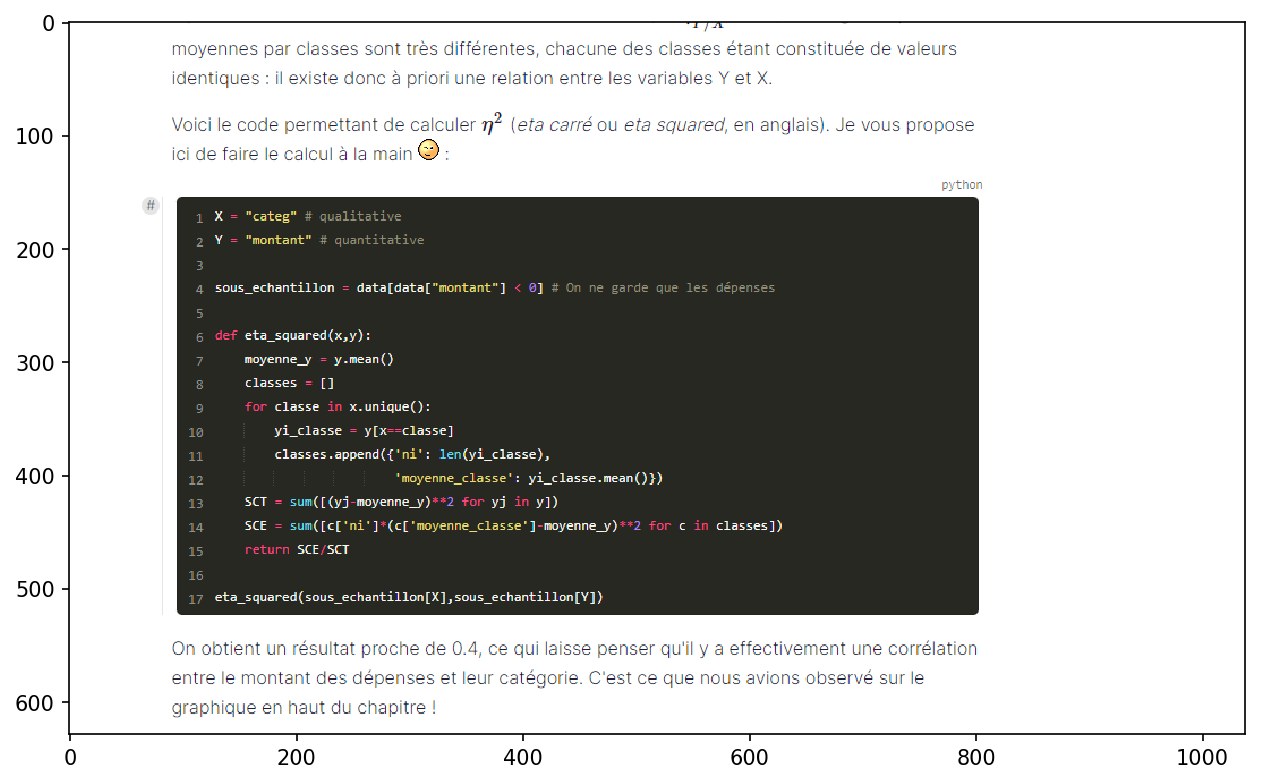

In [171]:
img20=mpimg.imread('ano3.png')
height, width, _ = img20.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img20)
plt.show()

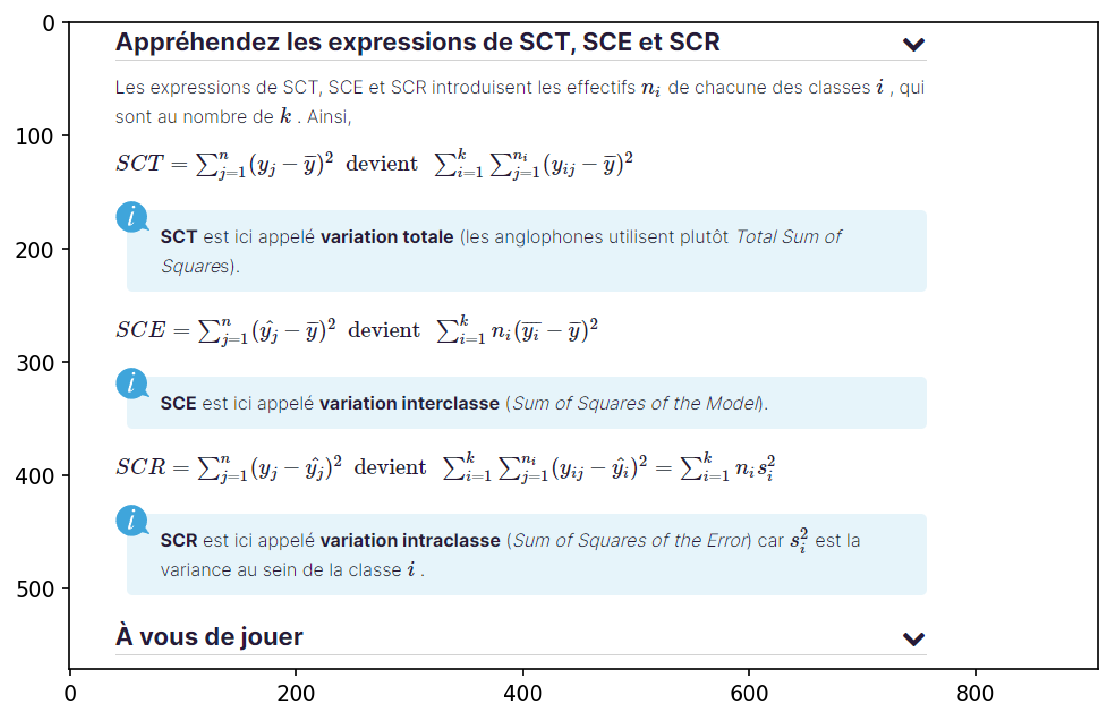

In [172]:
img21=mpimg.imread('ano4.png')
height, width, _ = img21.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img21)
plt.show()

### Deux var quali avec chi2

La m√©thode d'analyse sera la m√™me pour r√©pondre √† toutes les questions suivantes. La seule chose qui change, ce sont les 2 variables √©tudi√©es :

Avez-vous les m√™mes cat√©gories de d√©penses le week-end et en semaine ? (Variables categ et weekend).

Avez-vous plus d'entr√©es d'argent en d√©but de mois ou en fin de mois ? (sens et quart_mois).

Vos d√©penses sont-elles plus grandes en d√©but de mois qu'en fin de mois ? (tranche_depense et quart_mois).

Le montant d'une op√©ration est-il diff√©rent d'une cat√©gorie de d√©pense √† l'autre ? (tranche_depense et categ).

Vos paiements en carte bancaire sont-ils toujours petits, et vos virements importants ? (type et tranche_depense).

Y a-t-il des cat√©gories d'op√©rations qui arrivent toujours au m√™me moment du mois, comme votre loyer, par exemple ? (categ et quart_mois).

Y a-t-il certaines cat√©gories d'op√©rations qui s'effectuent toujours selon le m√™me mode de paiement, par exemple par virement bancaire ? (type et categ).

Certaines questions sont identiques √† celles du chapitre pr√©c√©dent. Dans ce dernier, on utilisait la variable quantitative montant, mais ici, on utilise la variable agr√©g√©e  tranche_depense, qui repr√©sente la m√™me grandeur, mais qui est qualitative.

In [173]:
X = "quart_mois"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ       AUTRE  COTISATION BANCAIRE  COURSES  FACTURE TELEPHONE  LOYER  \
quart_mois                                                                  
1            55.0                  7.0      6.0                6.0    NaN   
2            45.0                  NaN     11.0                1.0    6.0   
3            60.0                  NaN      7.0                NaN    NaN   
4            52.0                  NaN     15.0                NaN    NaN   
Total       212.0                  7.0     39.0                7.0    6.0   

categ       RESTAURANT  TRANSPORT  Total  
quart_mois                                
1                  3.0        9.0     86  
2                  7.0        6.0     76  
3                  4.0        4.0     75  
4                  2.0        2.0     71  
Total             16.0       21.0    308

Adaptez les 2 variables qualitatives que vous souhaitez √©tudier en  lignes 1 et 2. Le tableau de contingence se calcule gr√¢ce √† la m√©thode  pivot_table. Chaque case du tableau de contingence compte un nombre d'individus. Ce comptage se fait gr√¢ce √† la fonction  len.

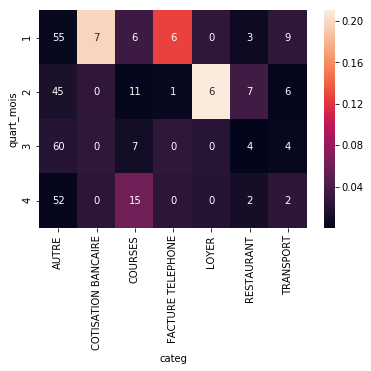

In [174]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()